Importing all the necessary Libraries

In [1]:
#Packages / libraries
#import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
#make the plot outputs appear and be stored within the notebook

# To install sklearn type "pip install numpy scipy scikit-learn" to the Anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})


# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree # used to visualize the decision tree model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# conda install python-graphviz


In [2]:
#1. Reading the dataset. 

raw_data = pd.read_csv('Cardiovascular_Synthetic_Tabular_Data.csv', delimiter=';')

print(raw_data.shape)

raw_data


(20000, 12)


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18666       1     164      77    125    102            1     1      0   
1      17680       2     153      70    123     96            1     1      0   
2      17900       2     155      70    118     97            2     1      1   
3      19381       2     170      79    139    102            1     1      0   
4      18101       1     159      72    126     91            2     1      1   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
19995  16572       1     142      66    112     86            1     1      0   
19996  19073       1     165      75    126    101            1     1      1   
19997  17915       1     156      70    122     96            2     1      0   
19998  15961       1     137      63    109     81            1     1      0   
19999  17658       1     156      72    113     97            2     1      0   

       alco  active  cardio  
0         0       1       0  
1         0       1       0  
2         0       1       1  
3         0       1       1  
4         0       1       1  
...     ...     ...     ...  
19995     0       1       0  
19996     0       1       0  
19997     0       1       0  
19998     0       1       1  
19999     0       1       1  

[20000 rows x 12 columns]

In [3]:
print(raw_data['cardio'])

0        0
1        0
2        1
3        1
4        1
        ..
19995    0
19996    0
19997    0
19998    1
19999    1
Name: cardio, Length: 20000, dtype: int64


In [4]:
#2. Finding any duplicates, if any null value exit droping them. 

print(raw_data.isnull().sum())



age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [5]:
#3. Data pre-processing 

#Changing the age from days to years. 
raw_data['age'] = raw_data['age'] / 365

raw_data

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      51.139726       1     164      77    125    102            1     1   
1      48.438356       2     153      70    123     96            1     1   
2      49.041096       2     155      70    118     97            2     1   
3      53.098630       2     170      79    139    102            1     1   
4      49.591781       1     159      72    126     91            2     1   
...          ...     ...     ...     ...    ...    ...          ...   ...   
19995  45.402740       1     142      66    112     86            1     1   
19996  52.254795       1     165      75    126    101            1     1   
19997  49.082192       1     156      70    122     96            2     1   
19998  43.728767       1     137      63    109     81            1     1   
19999  48.378082       1     156      72    113     97            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       0  
2          1     0       1       1  
3          0     0       1       1  
4          1     0       1       1  
...      ...   ...     ...     ...  
19995      0     0       1       0  
19996      1     0       1       0  
19997      0     0       1       0  
19998      0     0       1       1  
19999      0     0       1       1  

[20000 rows x 12 columns]

In [6]:
# Check the data type of the cardio column
print(raw_data['cardio'].dtype)
raw_data['cardio'] = raw_data['cardio'].astype(int)

# Map 1 to "Yes" and 0 to "No" in the 'cardio' column
raw_data['cardio'] = raw_data['cardio'].replace({1: 'Yes', 0: 'No'})

# raw_data['gender'] = raw_data['gender'].replace({1: 'Male', 2: 'Female'})

# Verify the changes
print(raw_data[['cardio']].head())
print('\n')
print(raw_data['gender'].head())


int64
  cardio
0     No
1     No
2    Yes
3    Yes
4    Yes


0    1
1    2
2    2
3    2
4    1
Name: gender, dtype: int64


Investigating Categorical Plot

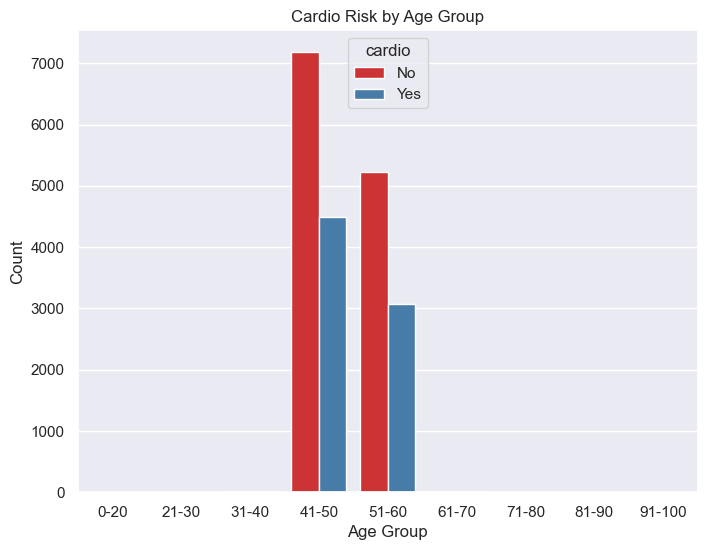

In [7]:
# Countplot

raw_data['Age_Bins'] = pd.cut(raw_data['age'], 
                               bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                               labels=['0-20', '21-30', '31-40', '41-50', '51-60', 
                                       '61-70', '71-80', '81-90', '91-100'], 
                               right=False)

sns.countplot(x='Age_Bins', data=raw_data, hue= "cardio", palette= "Set1")
plt.title("Cardio Risk by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

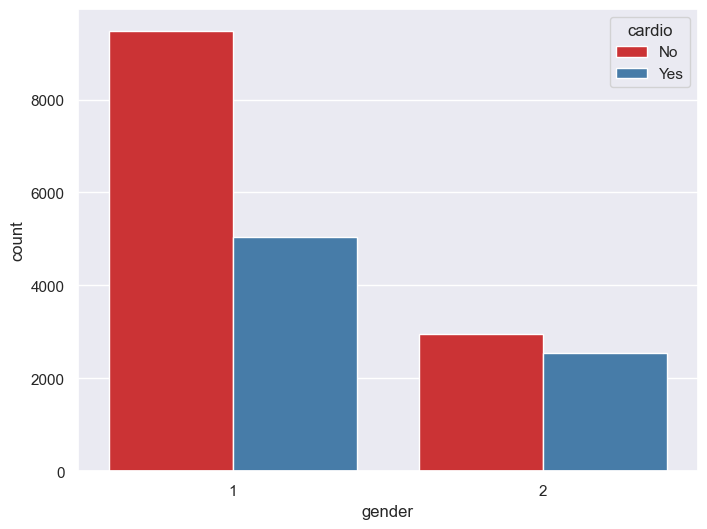

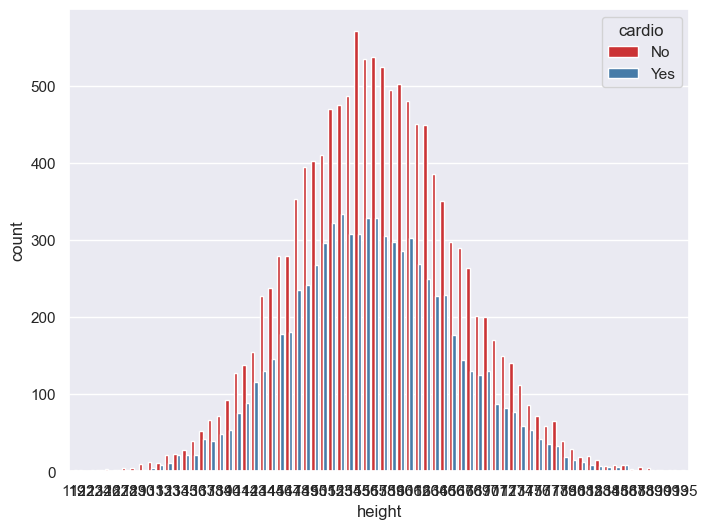

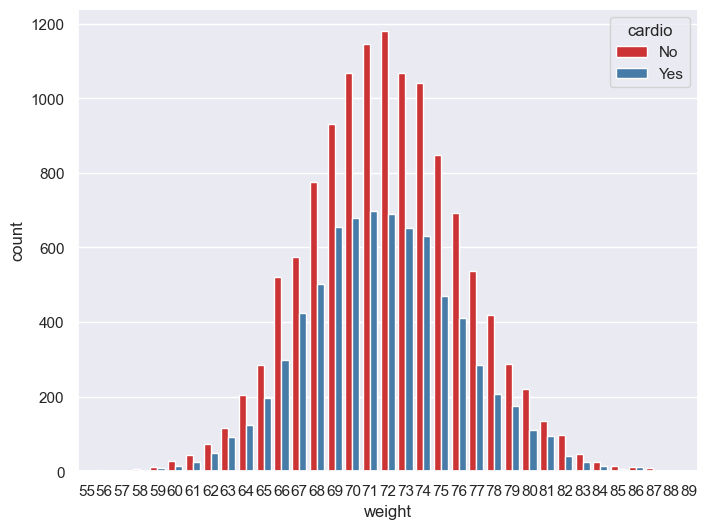

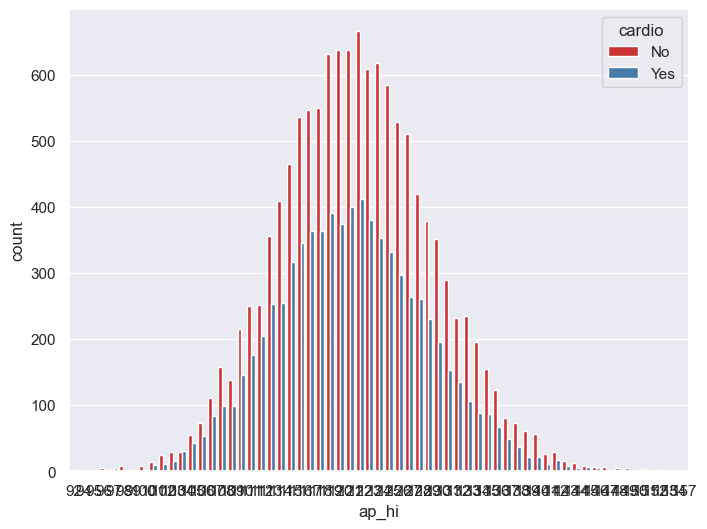

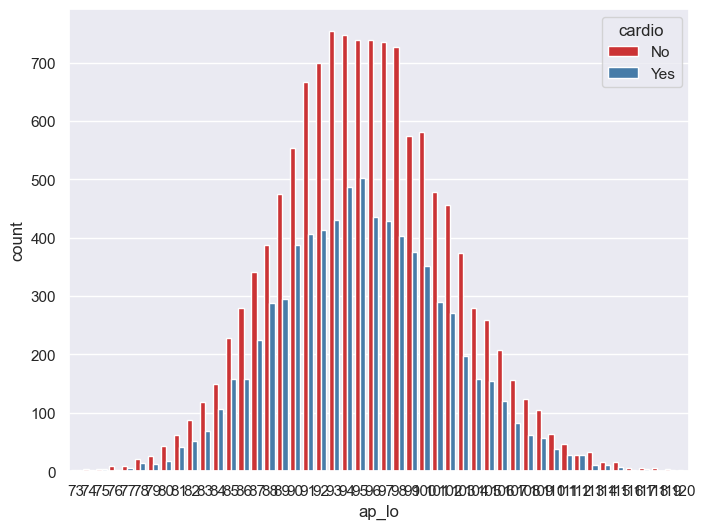

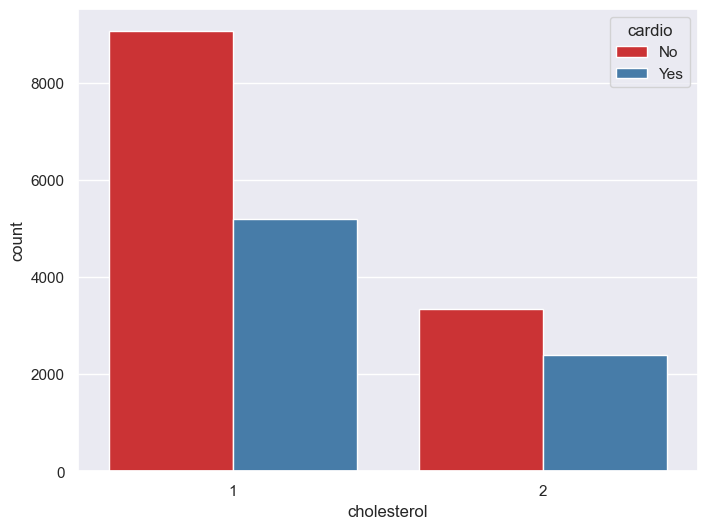

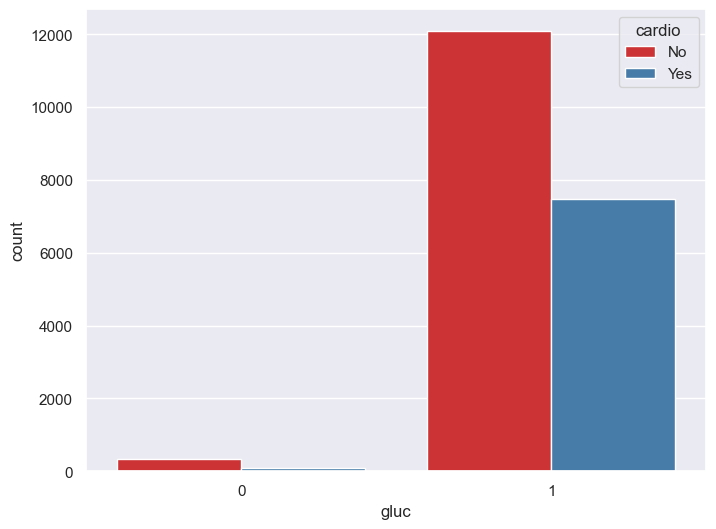

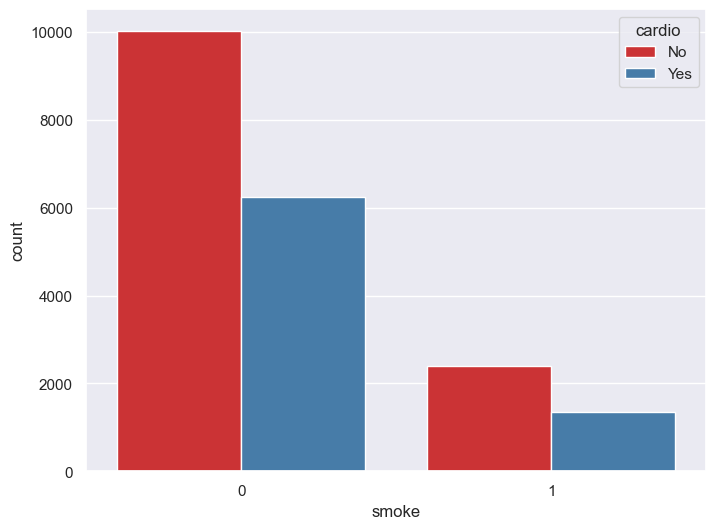

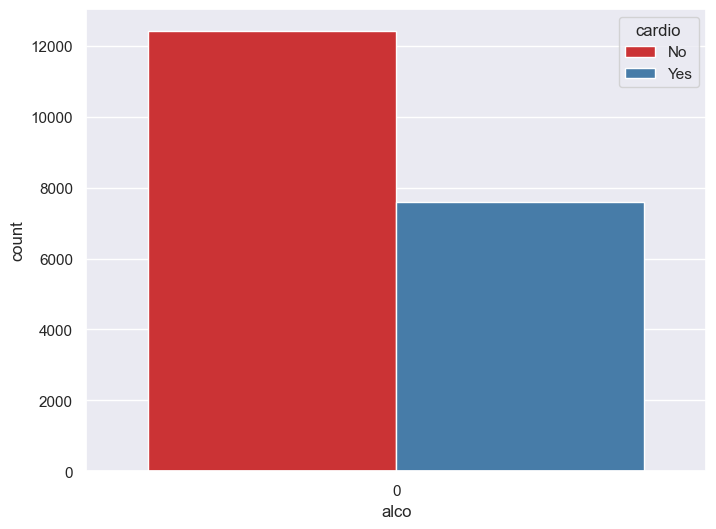

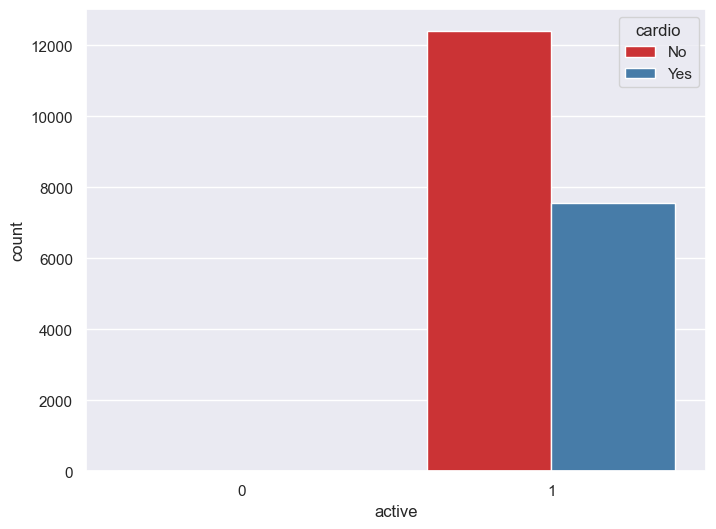

In [8]:
#Countplot for all features. 

all_features = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

for feature in all_features: 
    sns.countplot(x=feature, data=raw_data, hue='cardio', palette='Set1')
    plt.show()

In [9]:
print(raw_data.columns.tolist()) # convert a given array to an ordinary list

['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'Age_Bins']


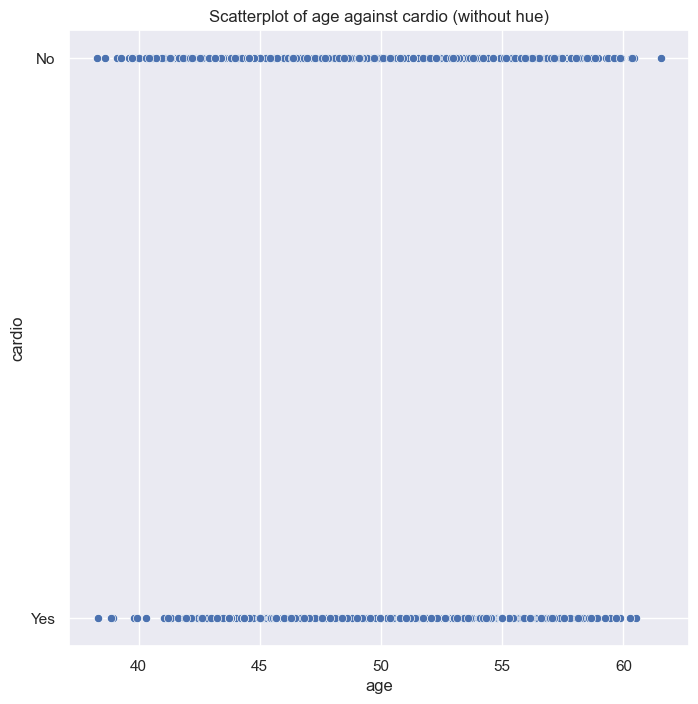

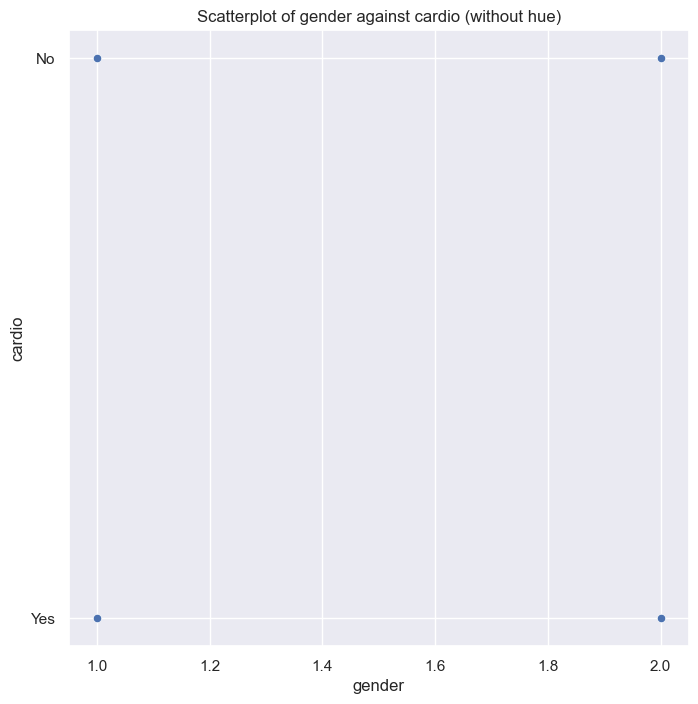

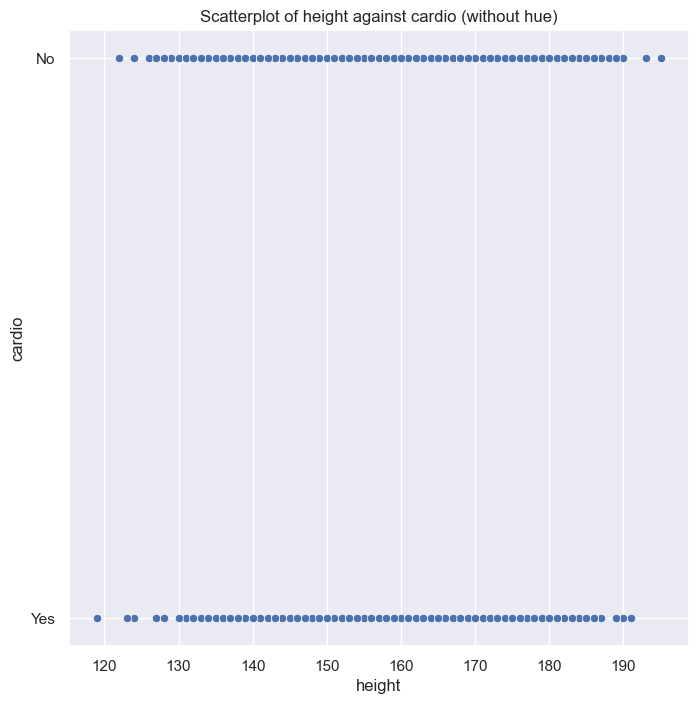

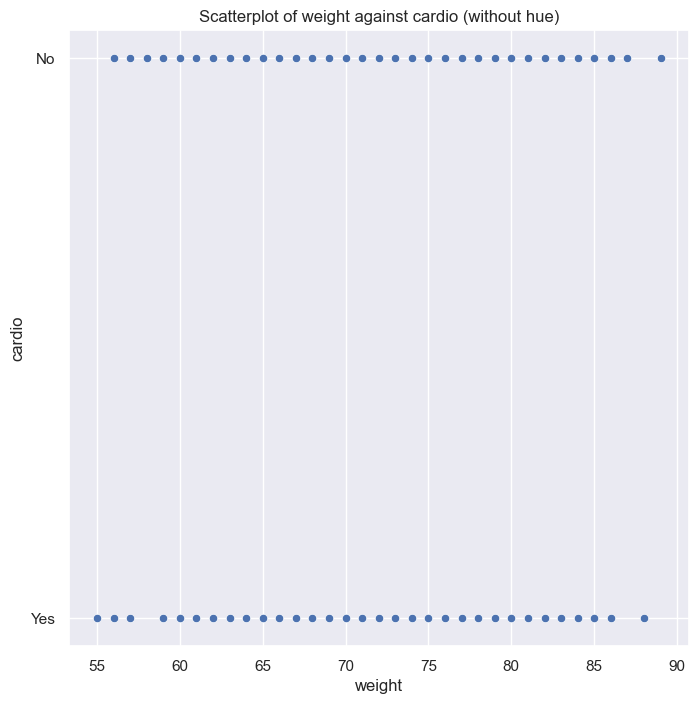

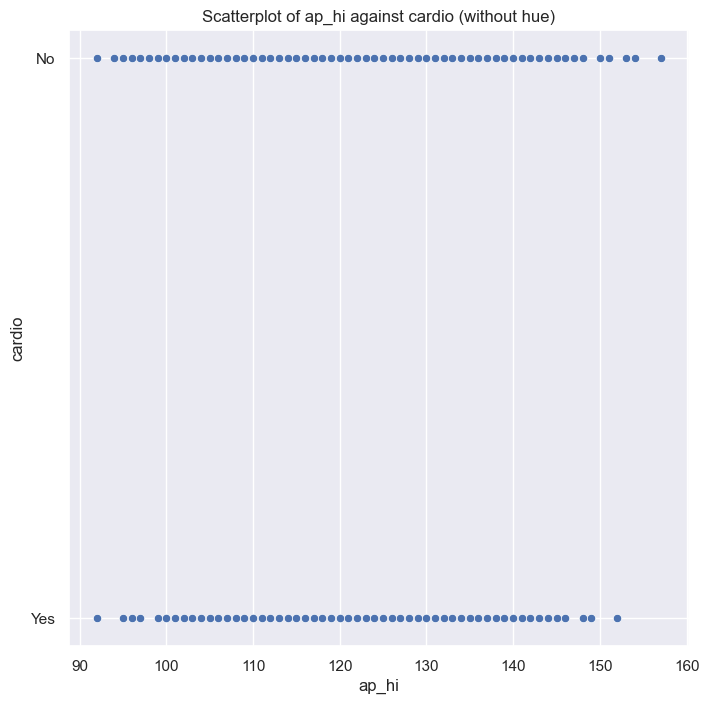

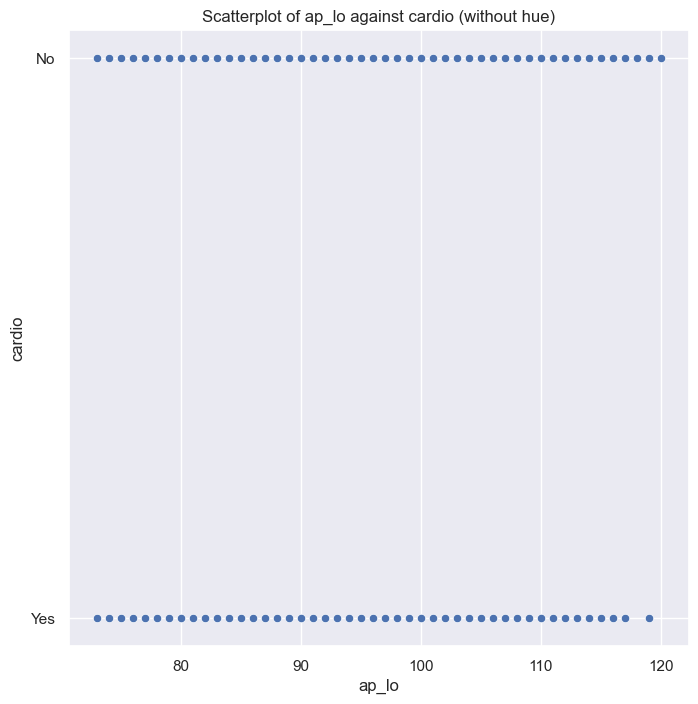

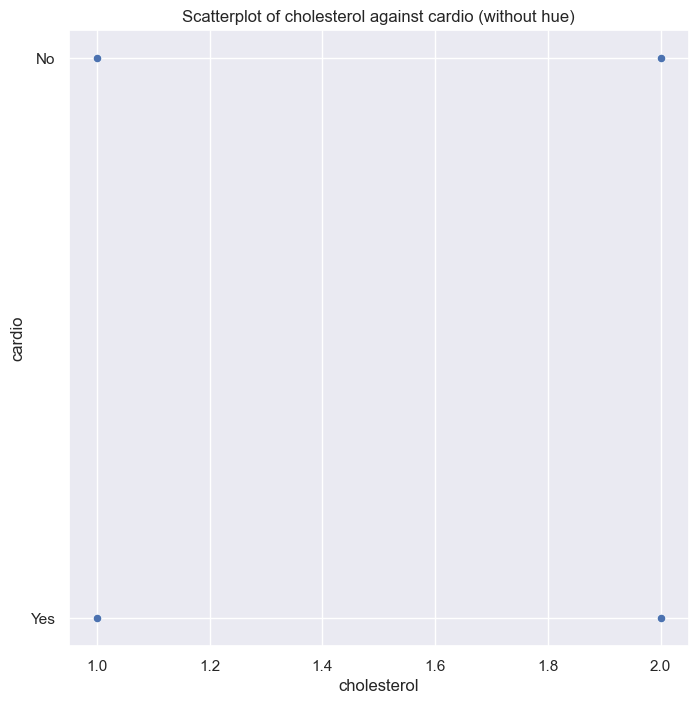

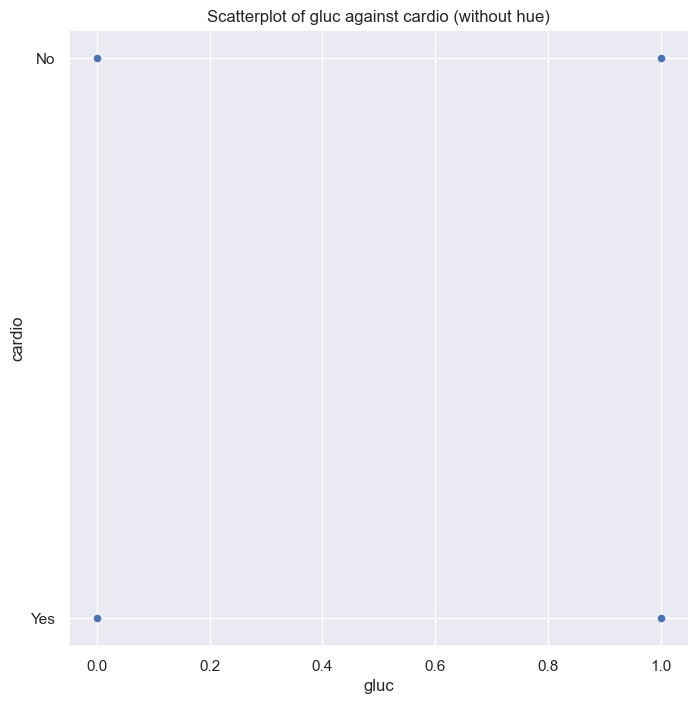

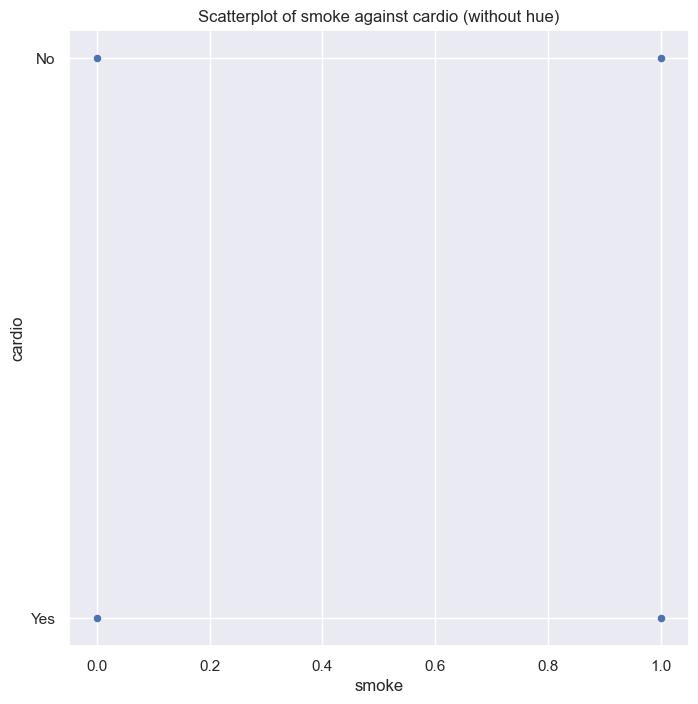

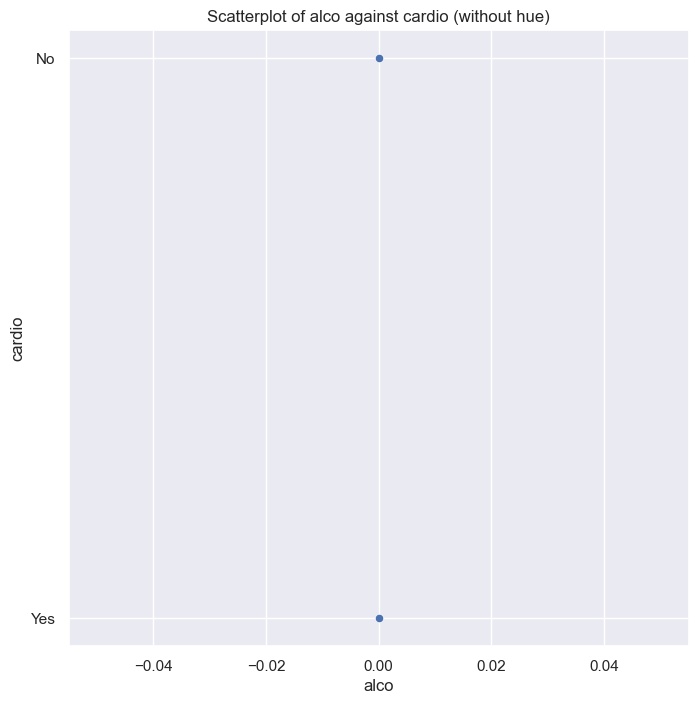

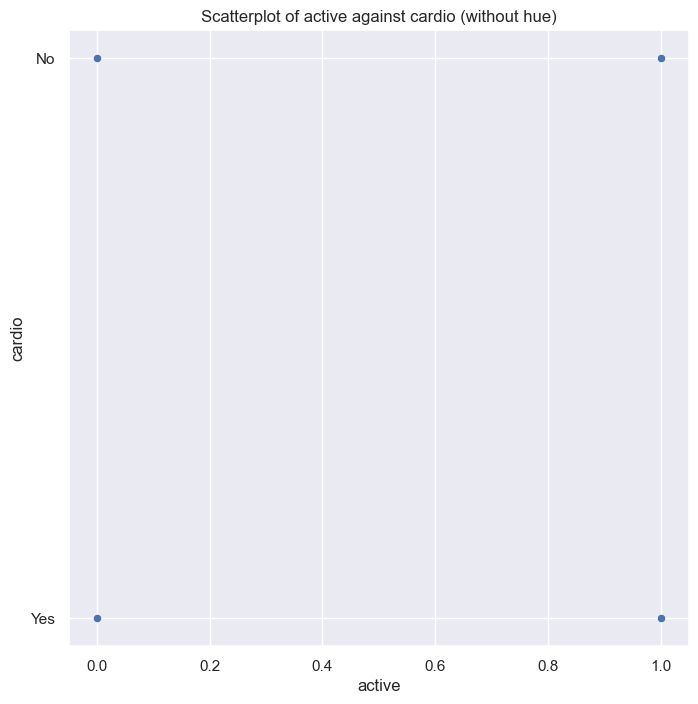

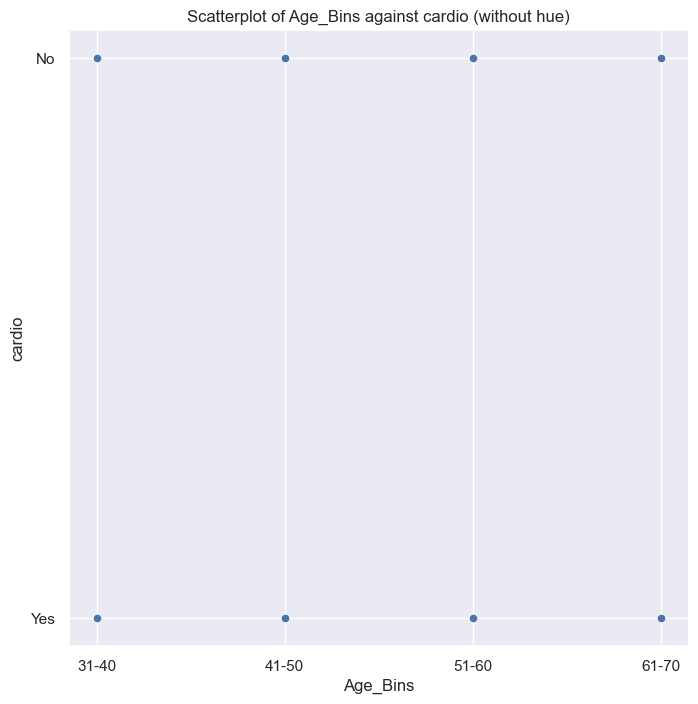

In [10]:
#how the cardio varies with all other features. 


# Loop for scatter plots without hue
for feature in raw_data.columns:
    if feature != 'cardio':
        plt.figure(figsize=(8, 8))
        sns.scatterplot(x=feature, y='cardio', data=raw_data)
        plt.xlabel(feature)
        plt.ylabel('cardio')
        plt.title(f'Scatterplot of {feature} against cardio (without hue)')
        plt.show()



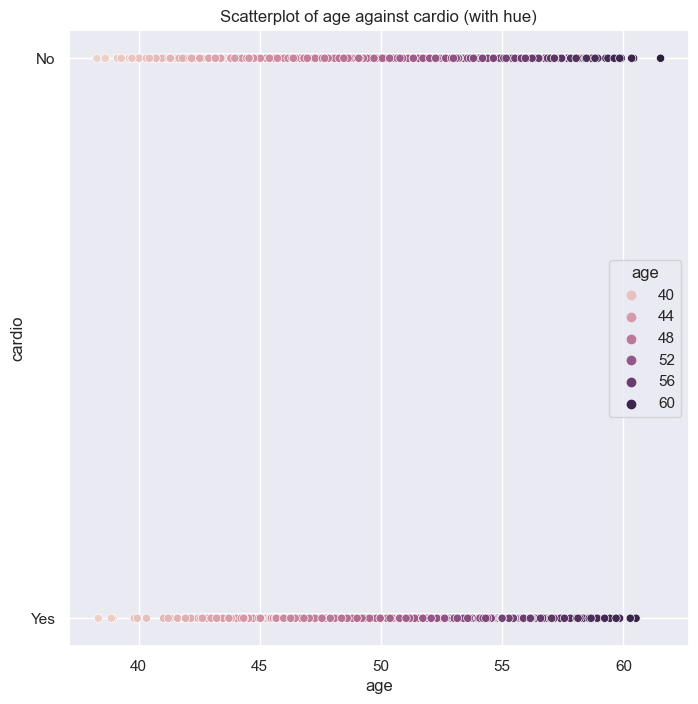

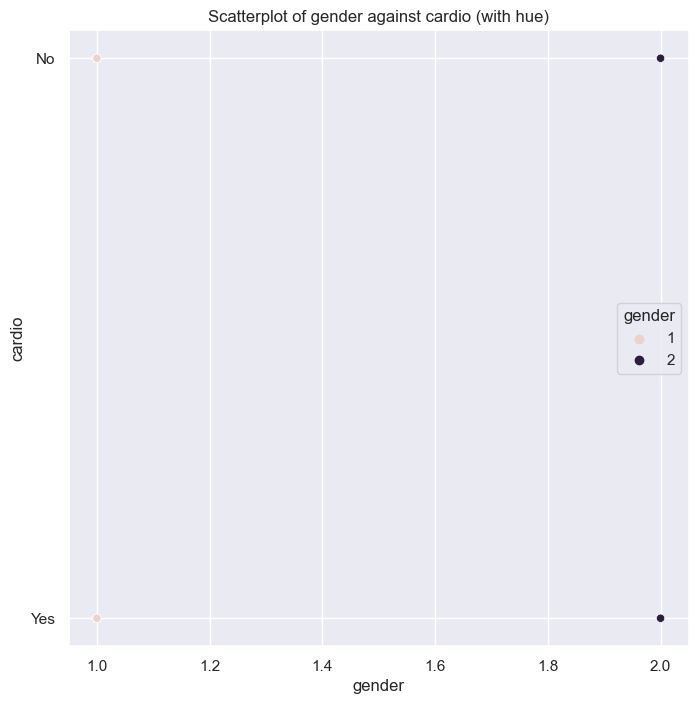

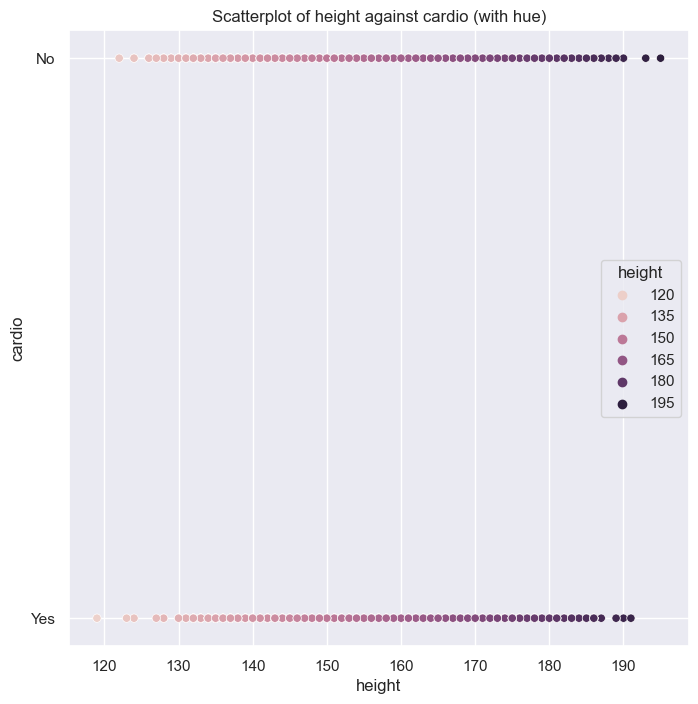

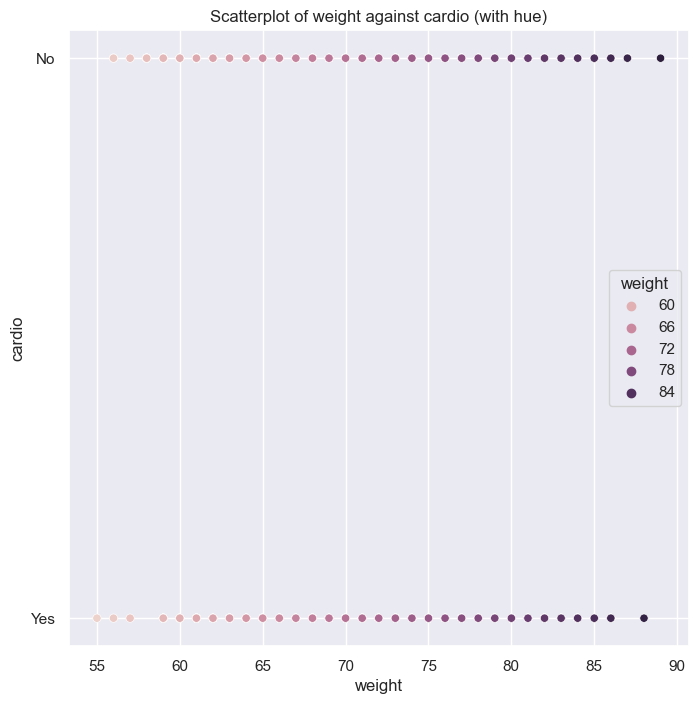

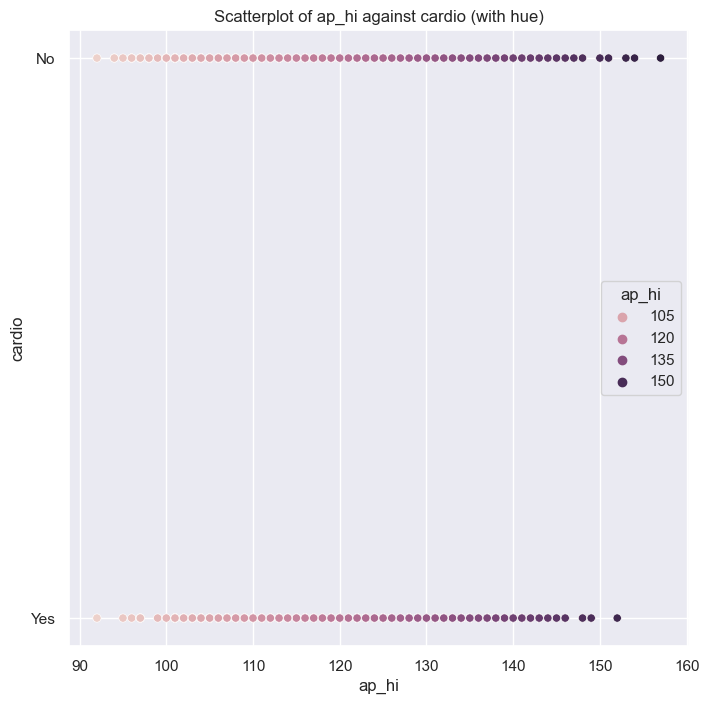

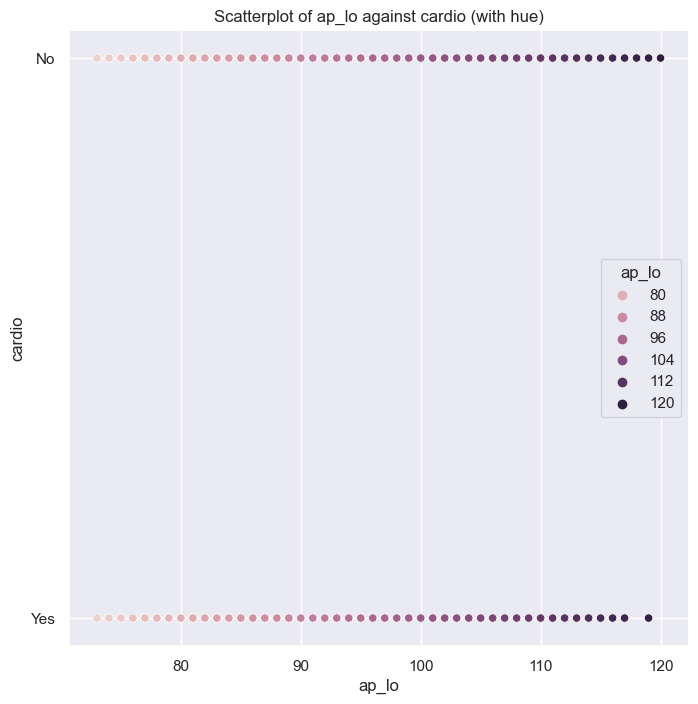

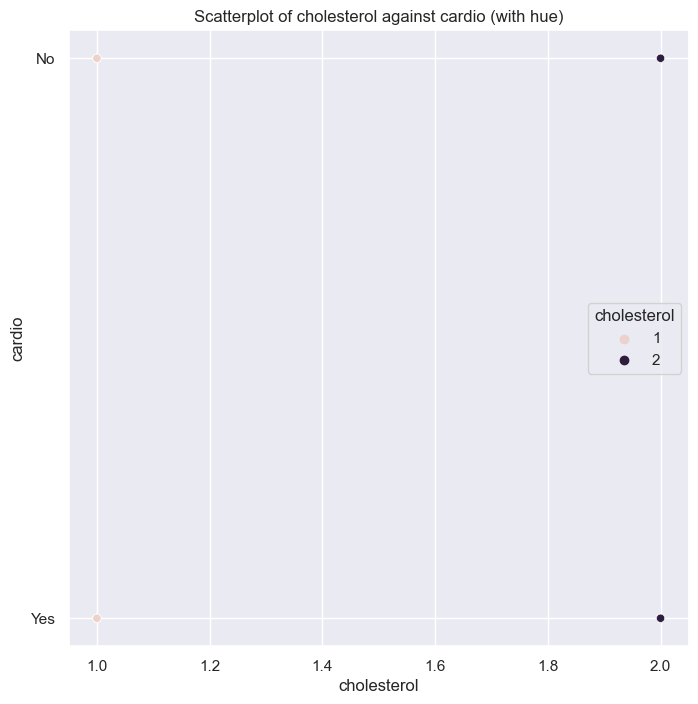

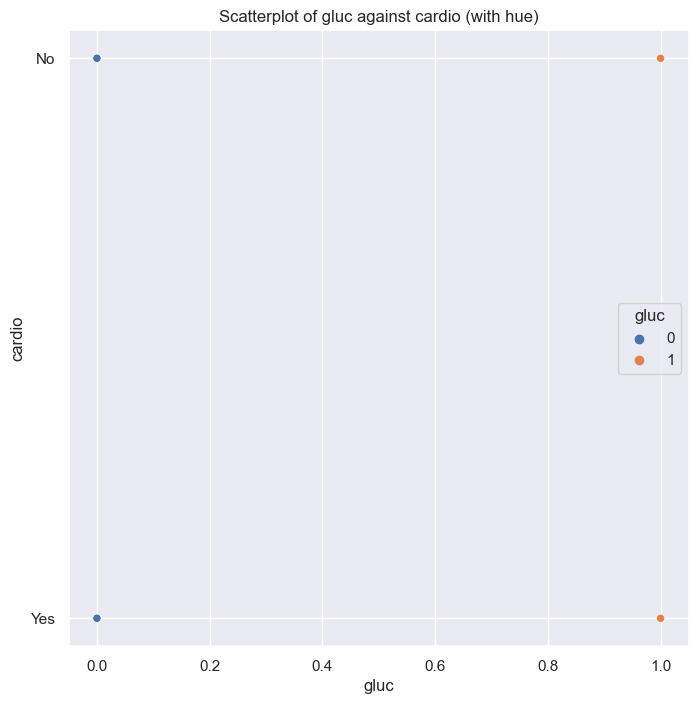

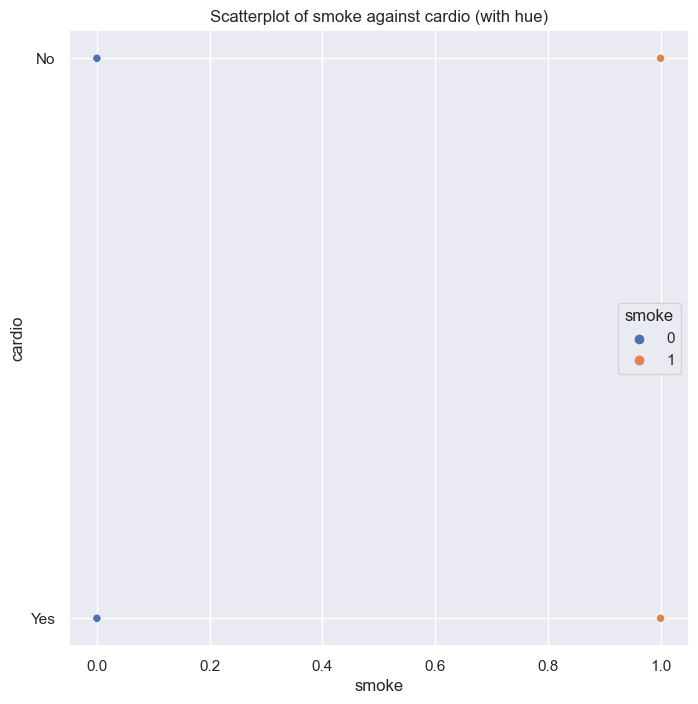

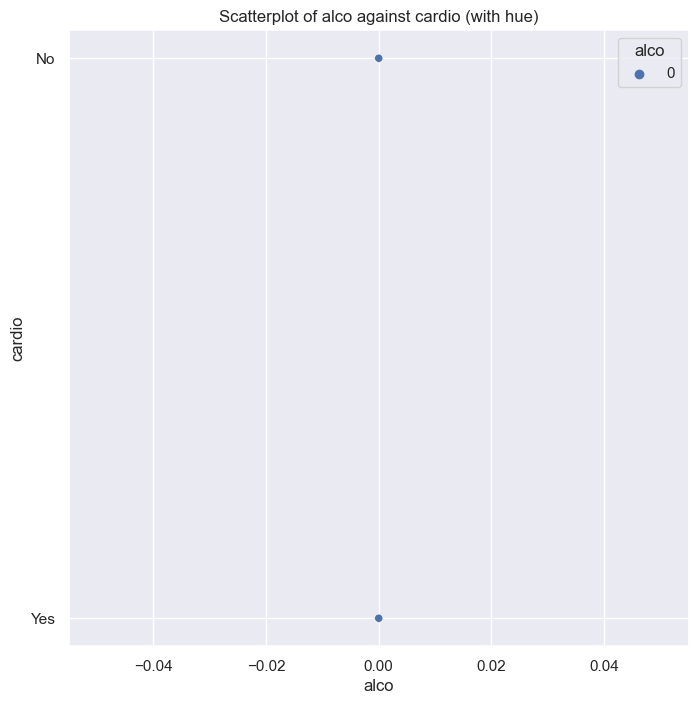

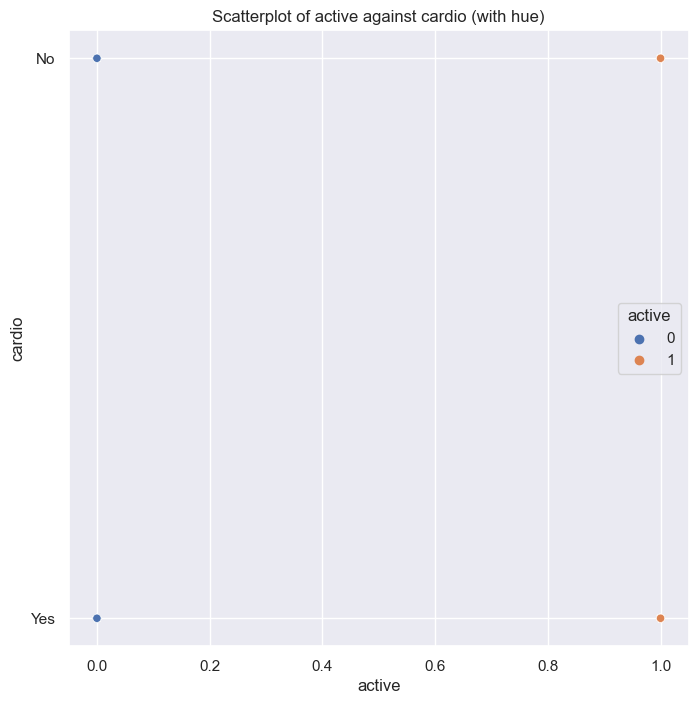

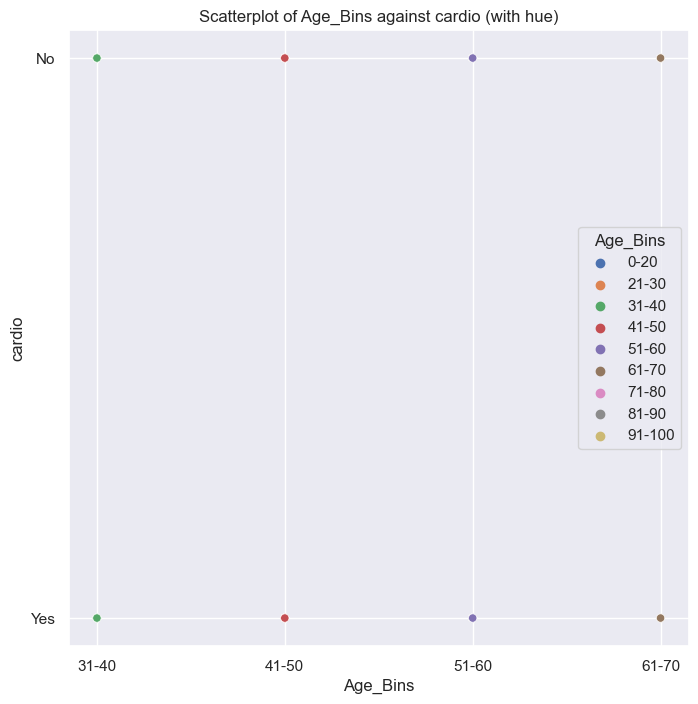

In [11]:
# Loop for scatter plots with hue 
for feature in raw_data.columns:
    if feature != 'cardio':
        plt.figure(figsize=(8, 8))
        sns.scatterplot(x=feature, y='cardio', hue=feature, data=raw_data)
        plt.xlabel(feature)
        plt.ylabel('cardio')
        plt.title(f'Scatterplot of {feature} against cardio (with hue)')
        plt.show()


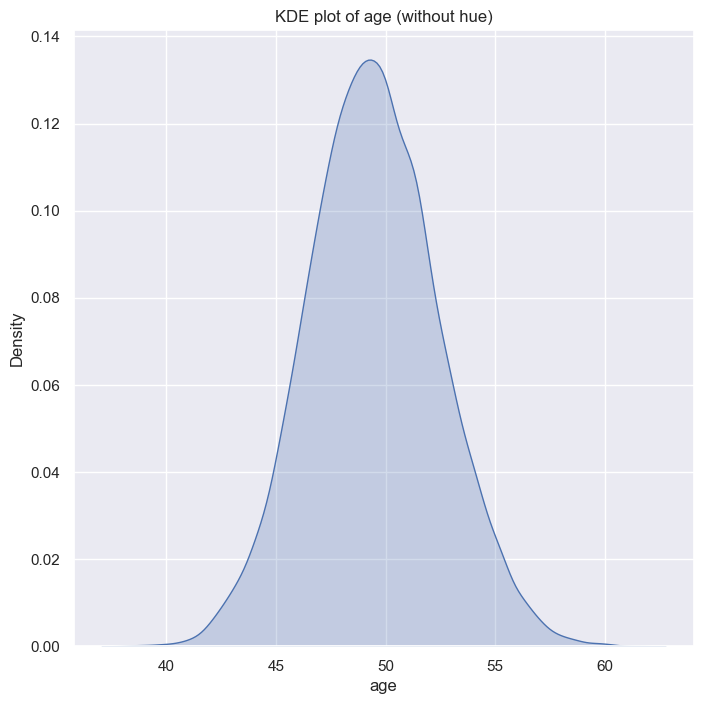

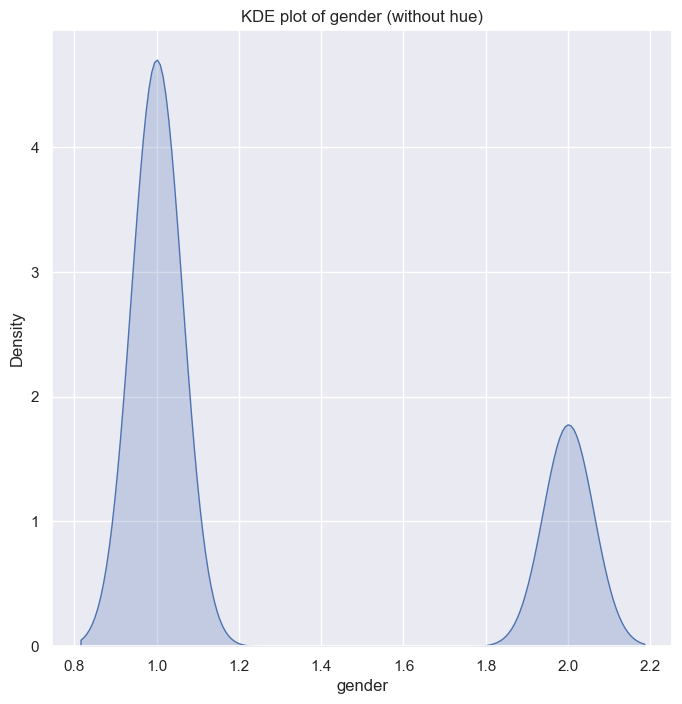

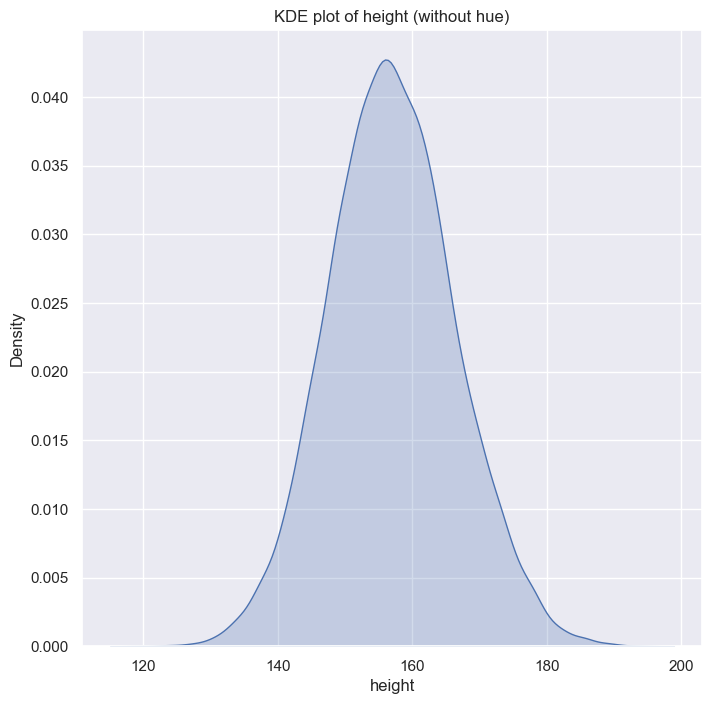

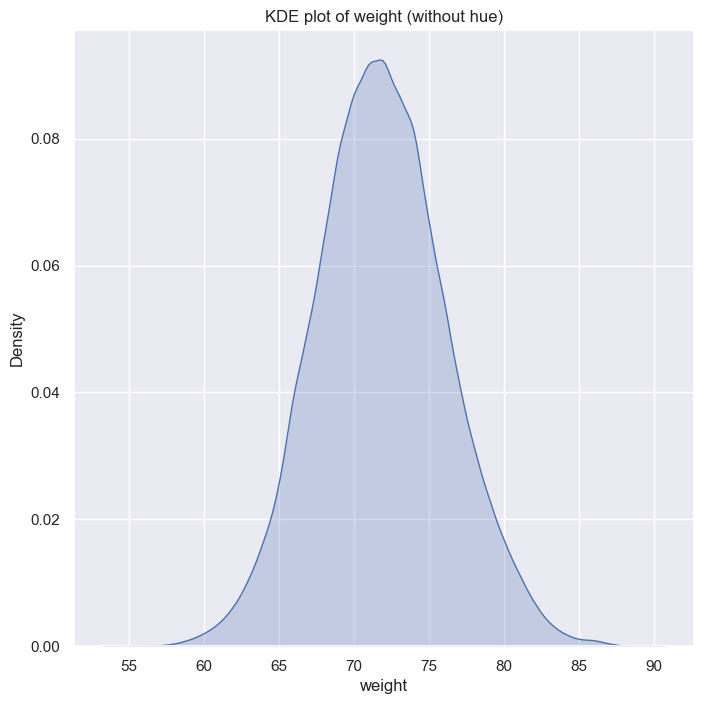

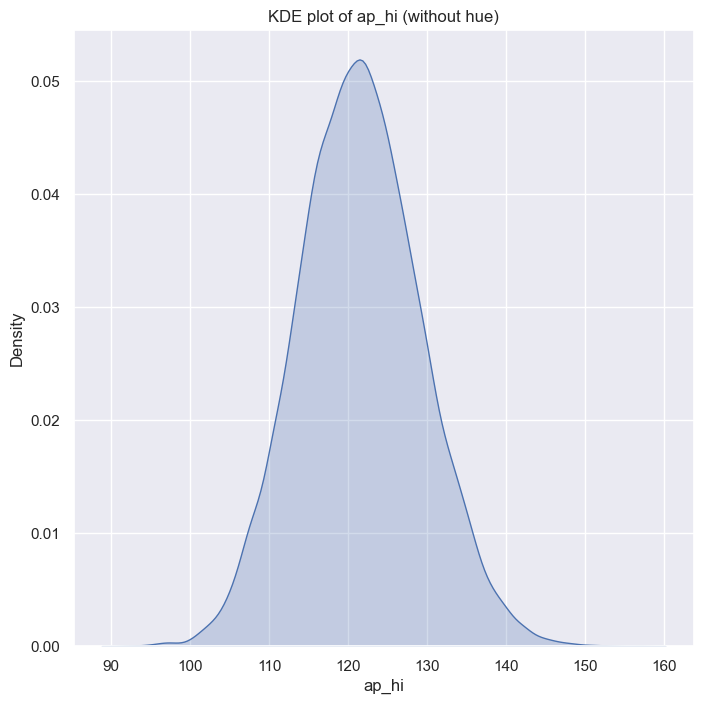

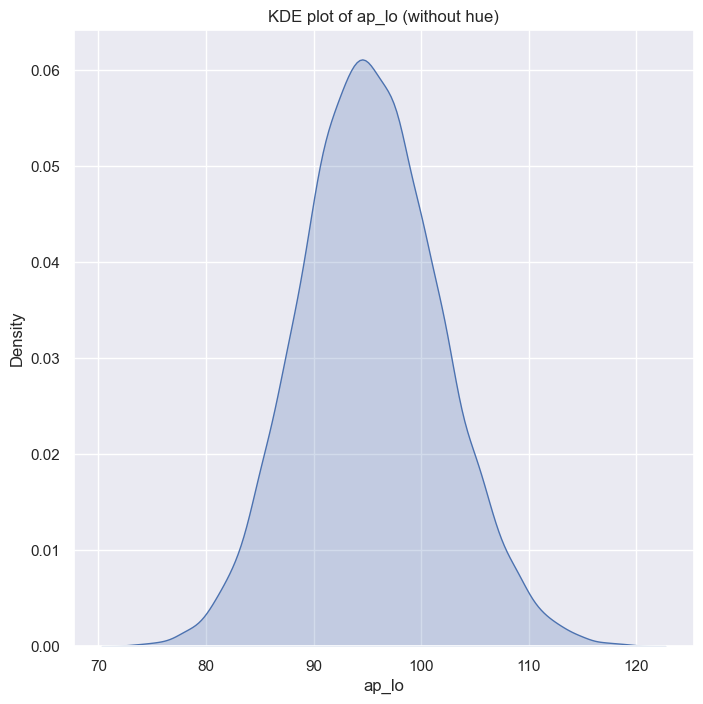

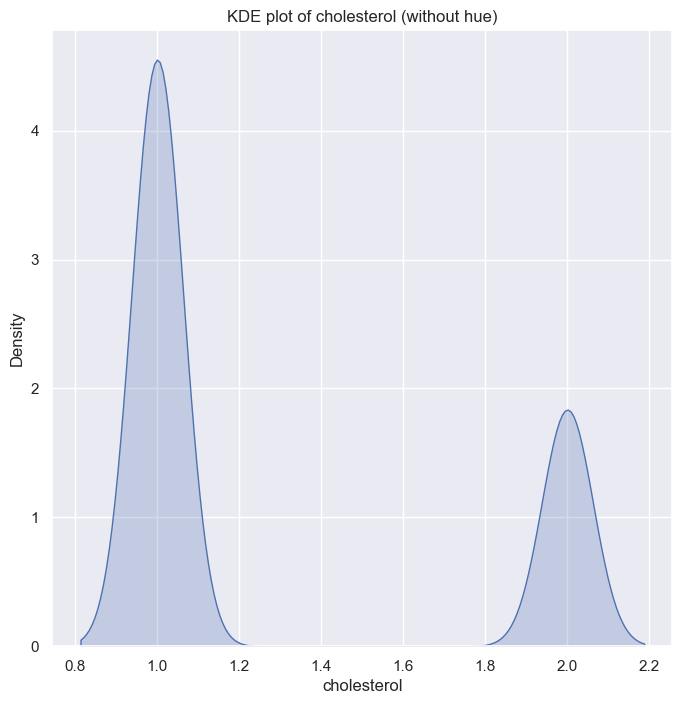

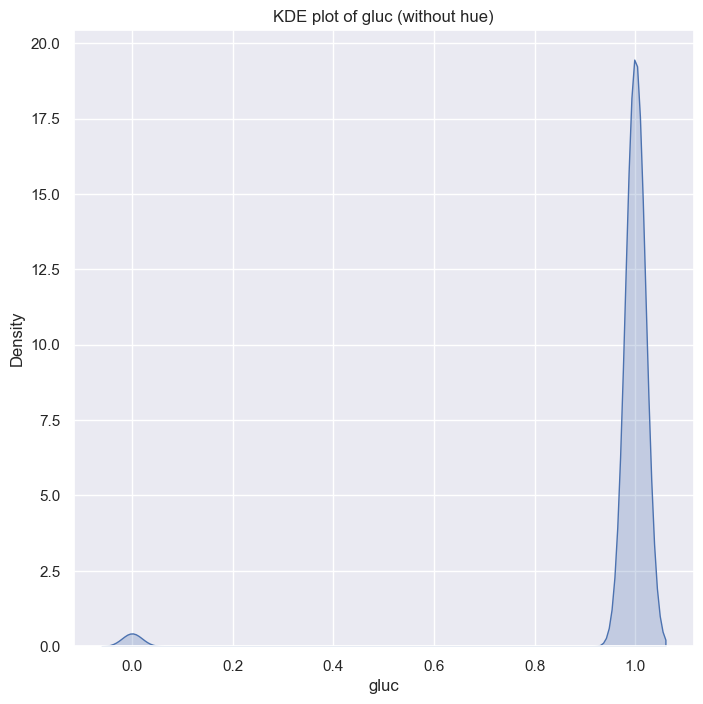

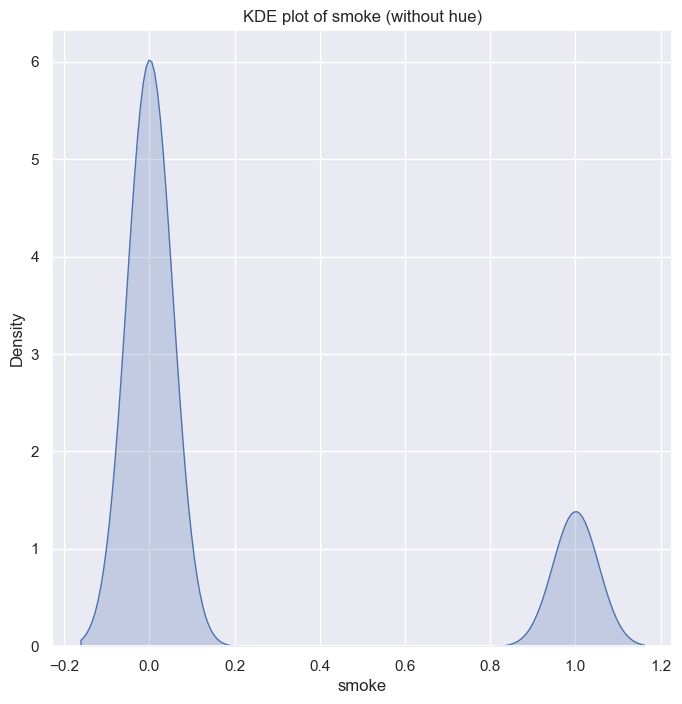

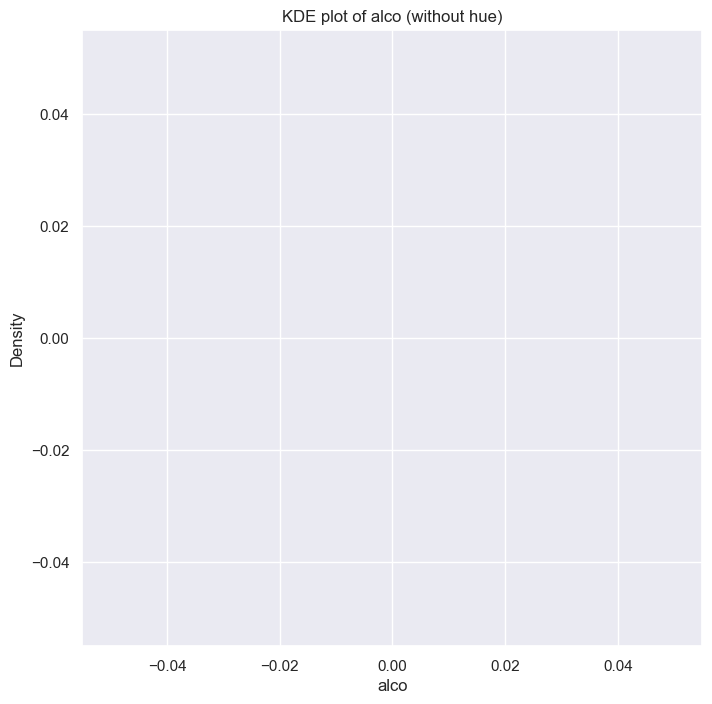

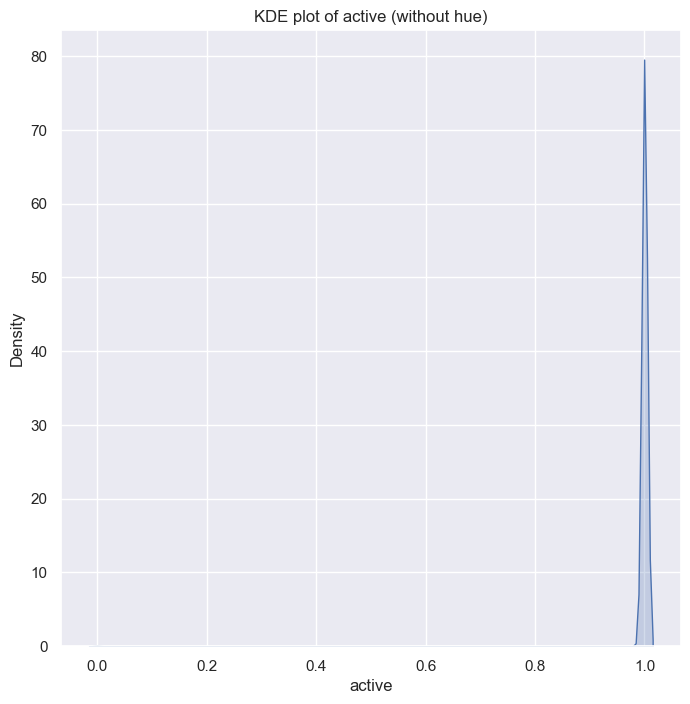

In [12]:
# Loop for KDE plots without hue
for feature in raw_data.columns:
    if feature != 'cardio' and feature != 'Age_Bins':
        plt.figure(figsize=(8, 8))
        sns.kdeplot(x=raw_data[feature], shade=True)
        plt.xlabel(feature)
        plt.title(f'KDE plot of {feature} (without hue)')
        plt.show()


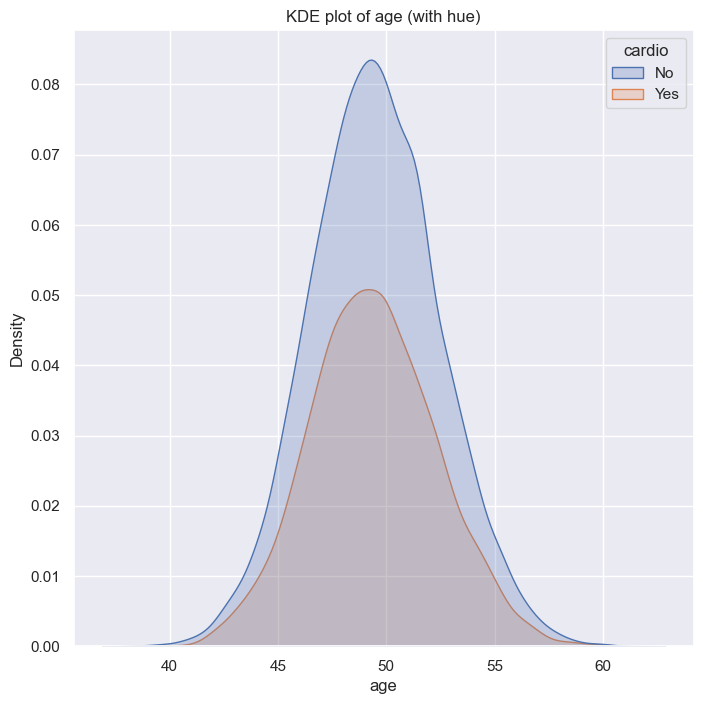

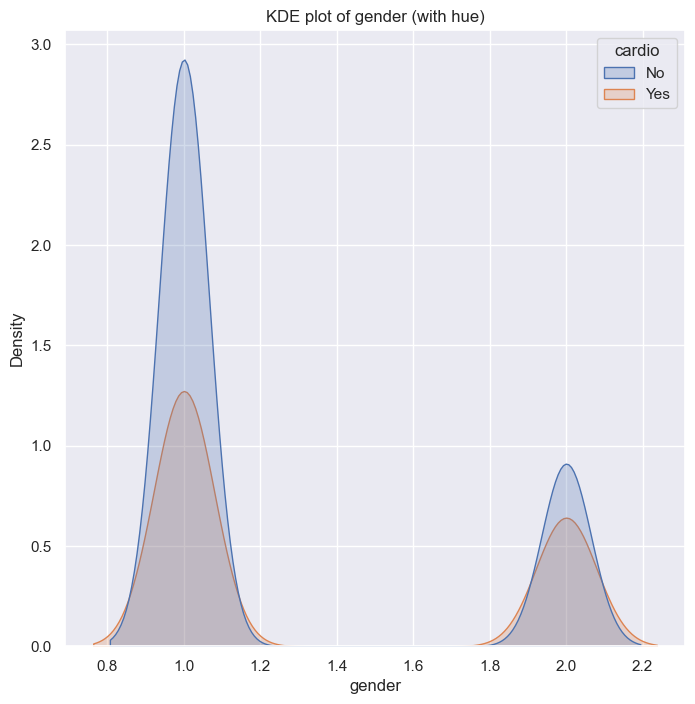

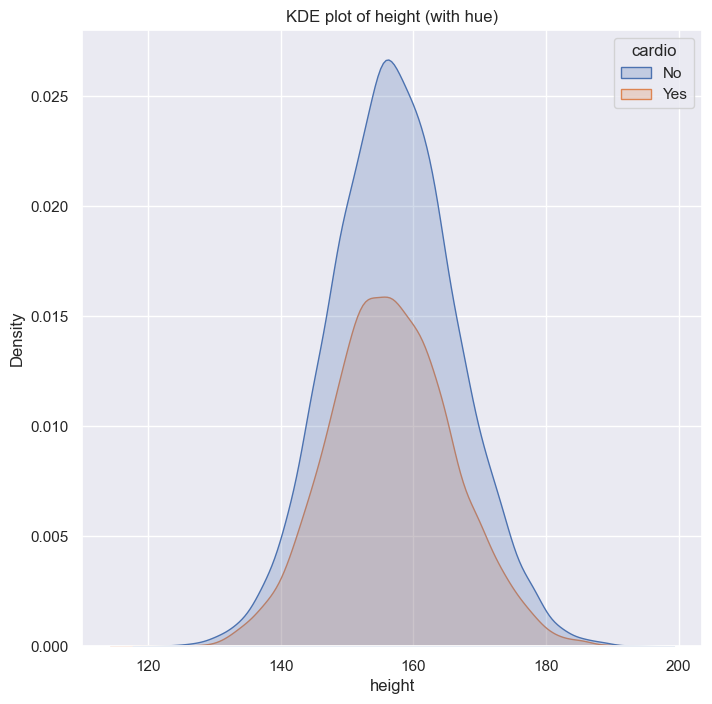

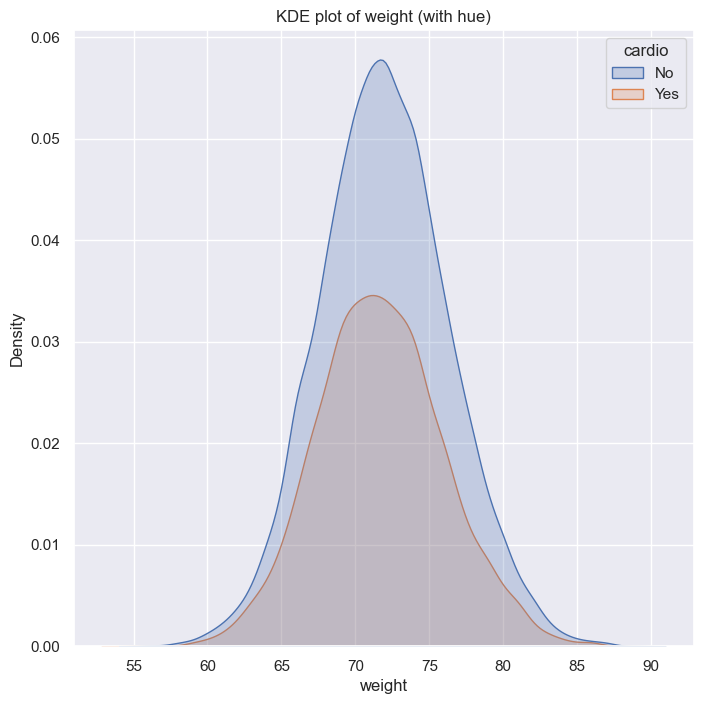

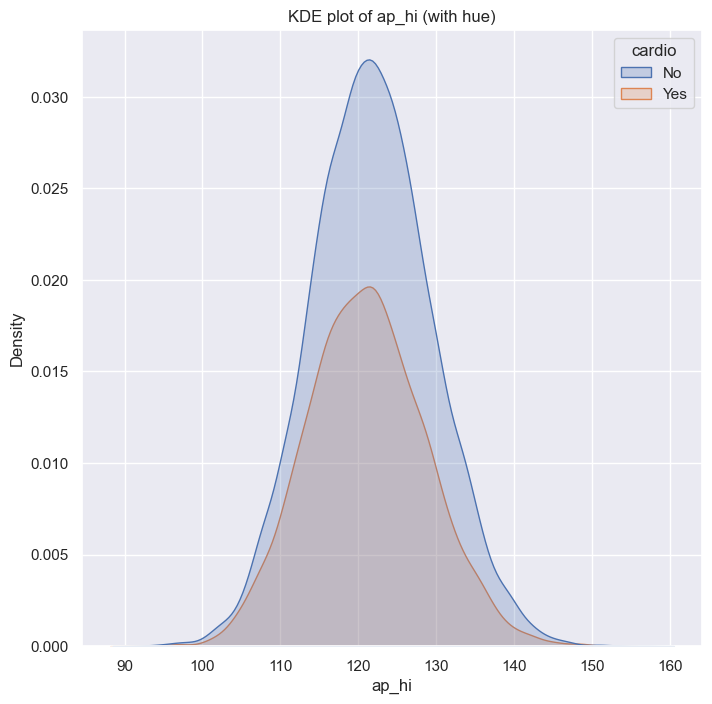

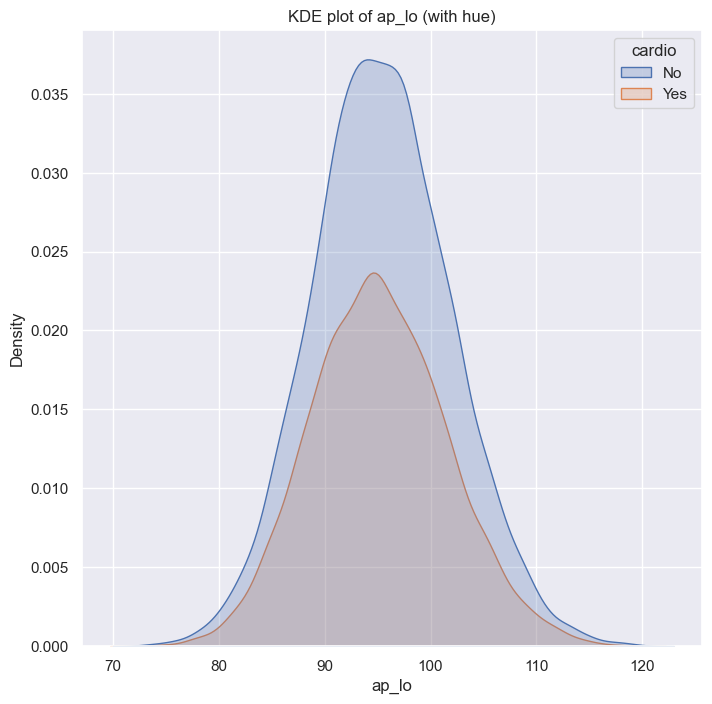

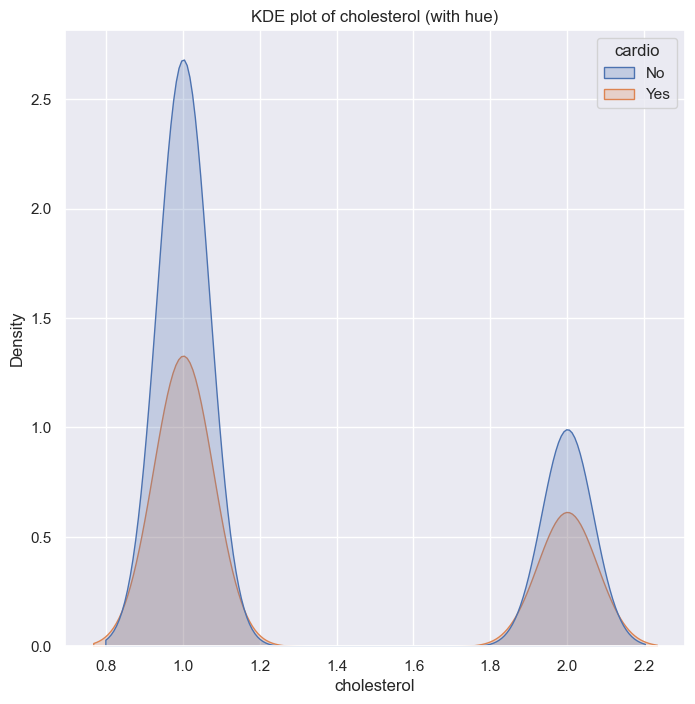

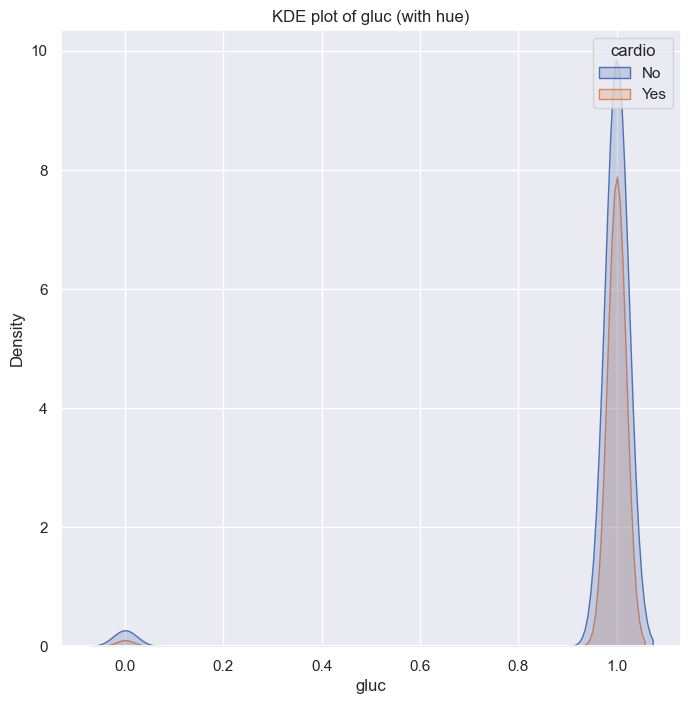

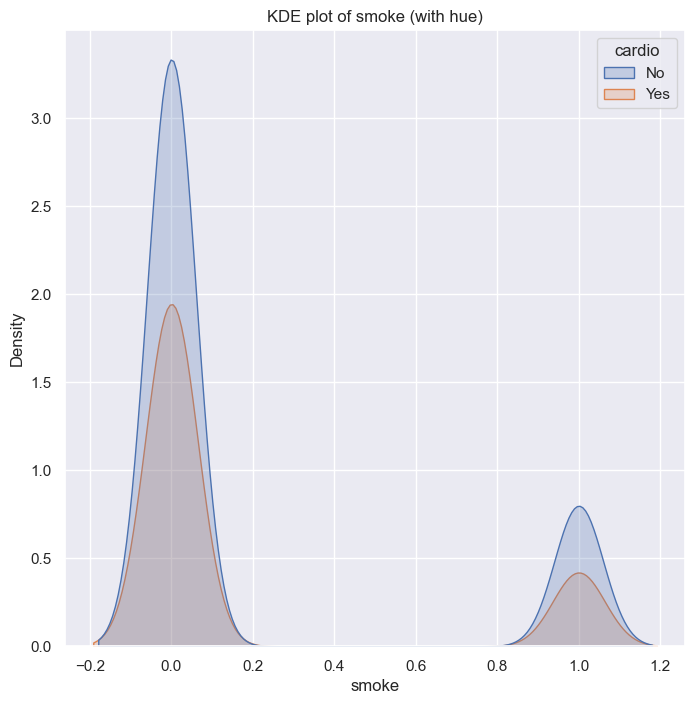

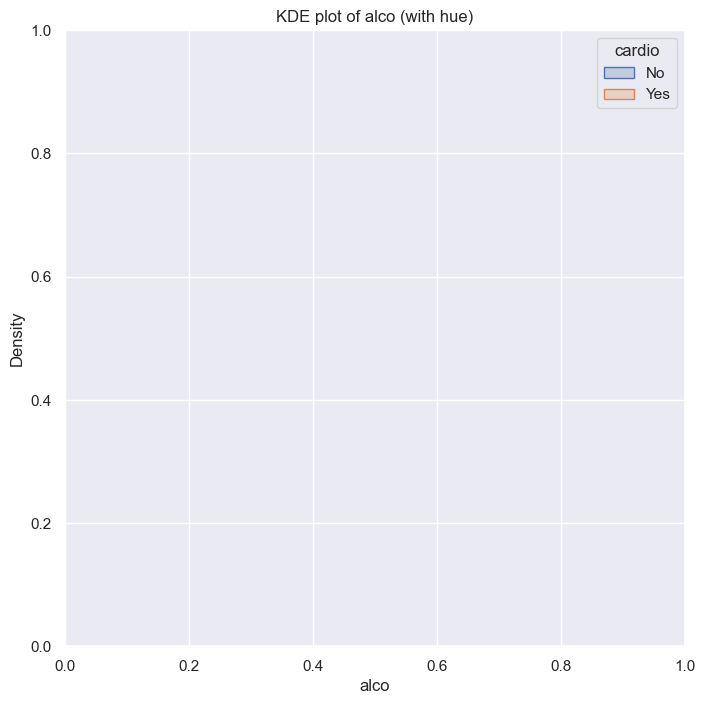

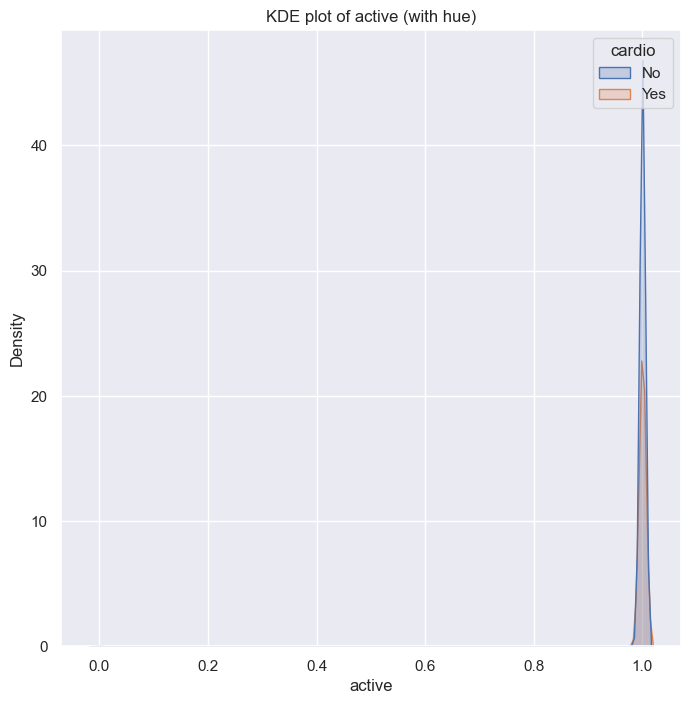

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

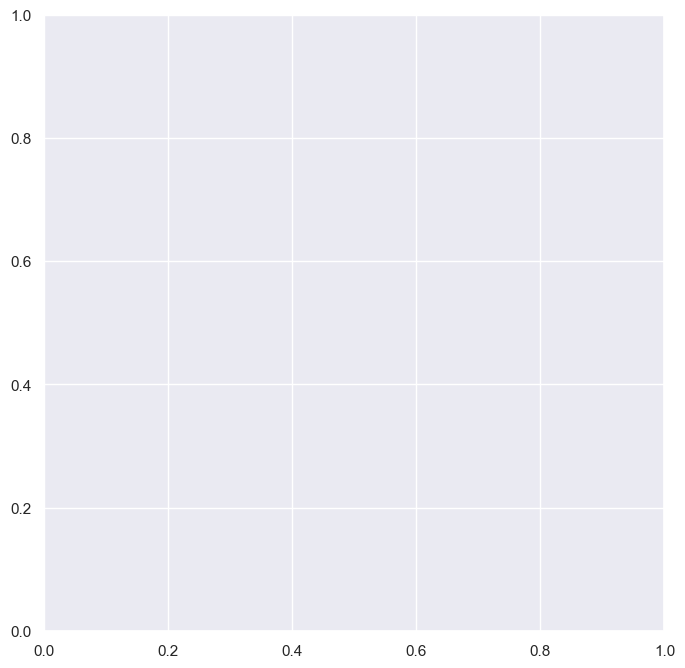

In [13]:
# Loop for KDE plots with hue (e.g., using 'gender' as the hue column)
for feature in raw_data.columns:
    if feature != 'cardio':
        plt.figure(figsize=(8, 8))
        sns.kdeplot(x=raw_data[feature], hue=raw_data['cardio'], shade=True)
        plt.xlabel(feature)
        plt.title(f'KDE plot of {feature} (with hue)')
        plt.show()

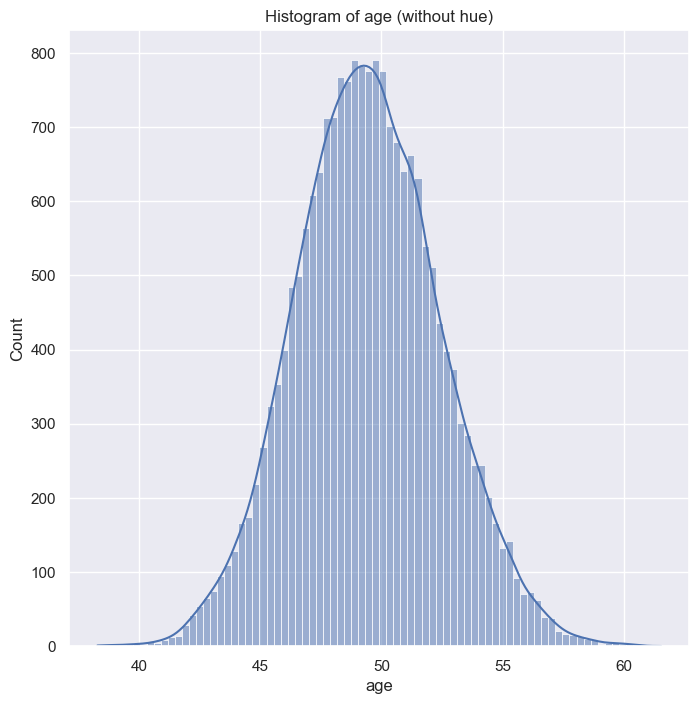

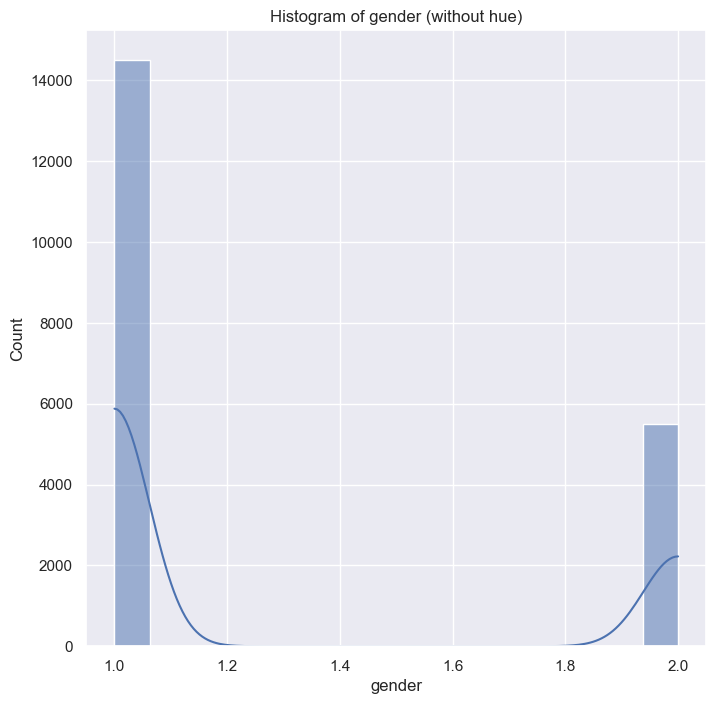

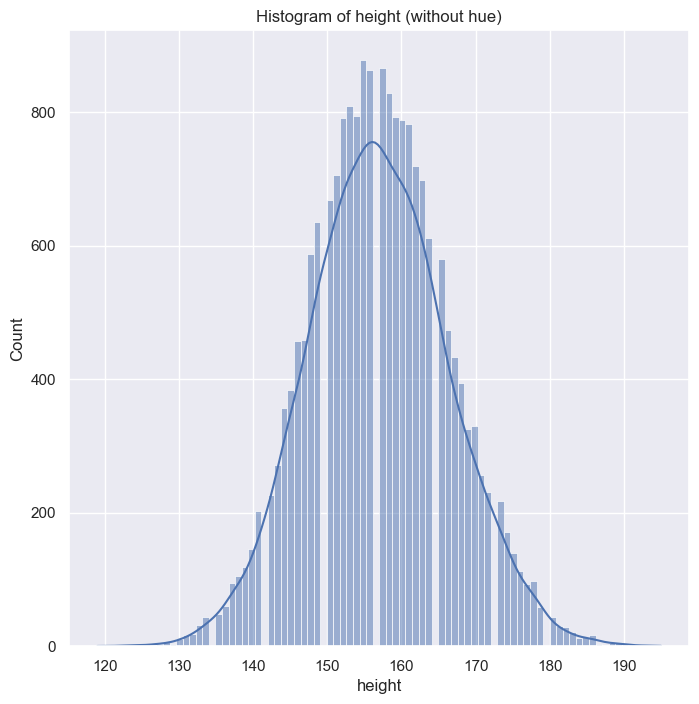

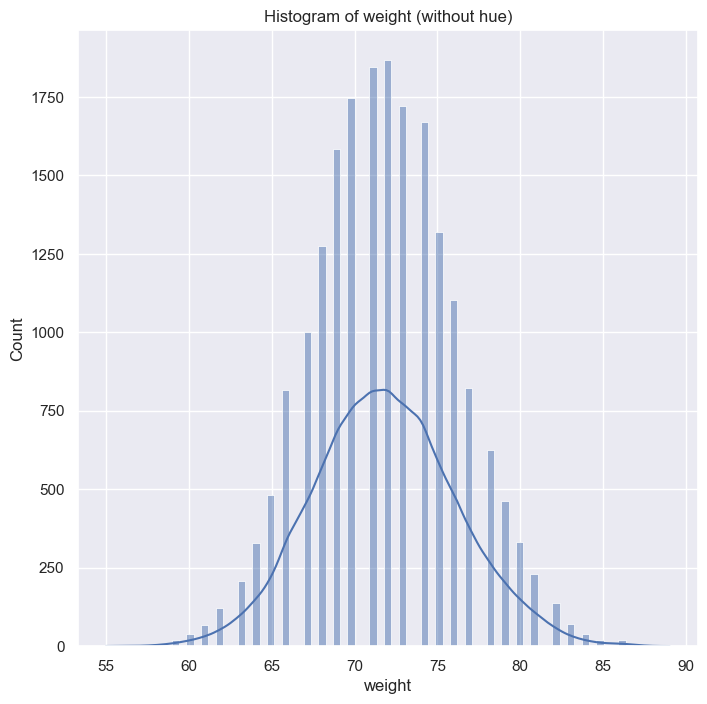

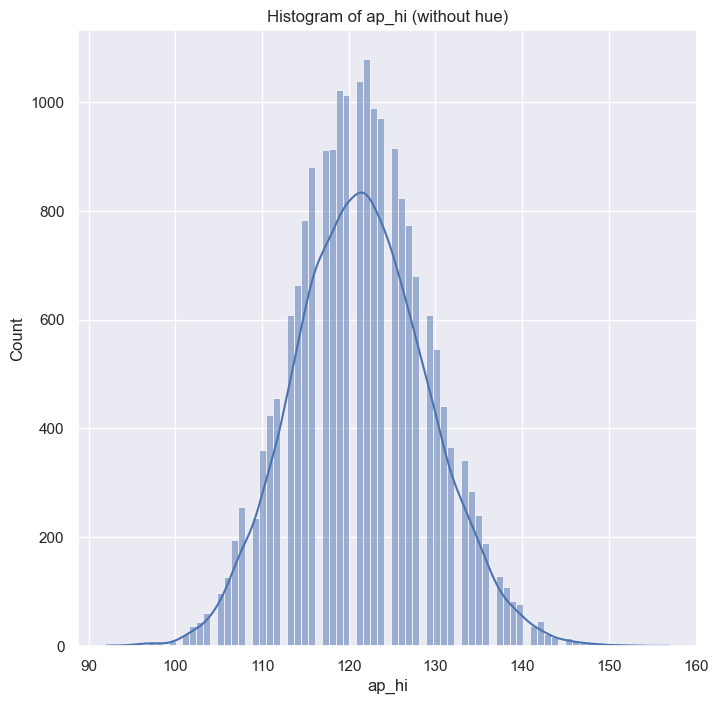

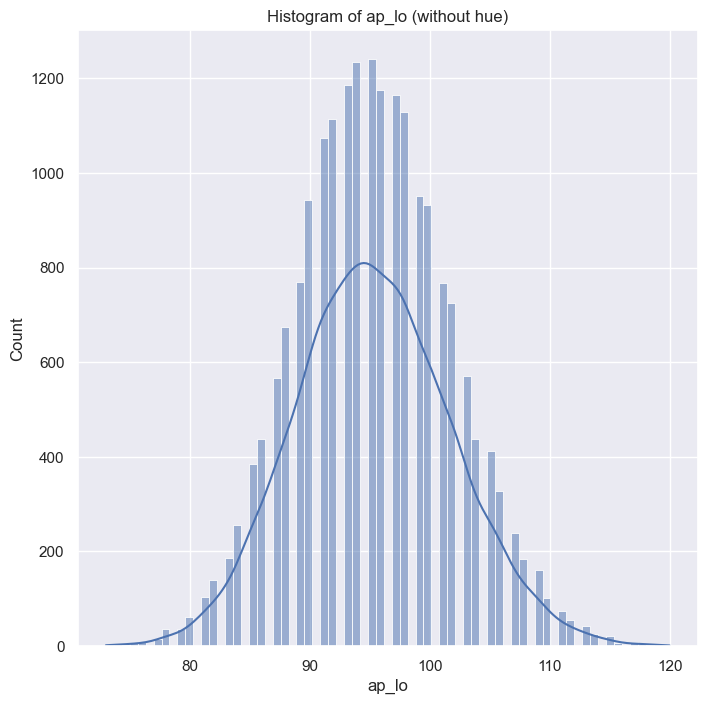

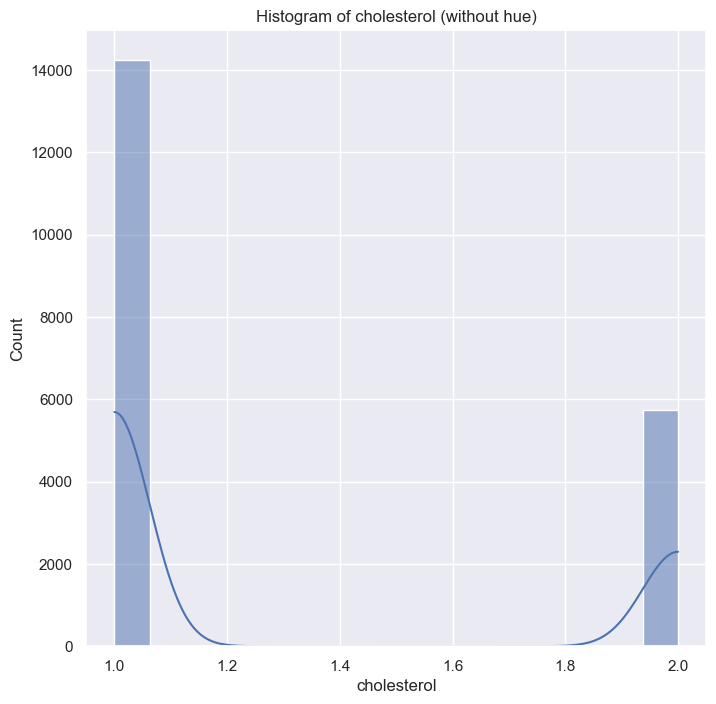

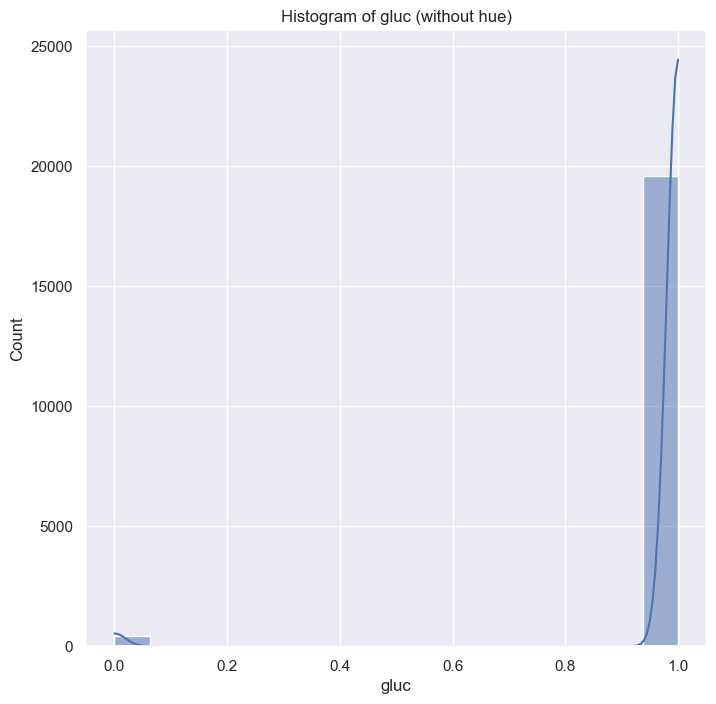

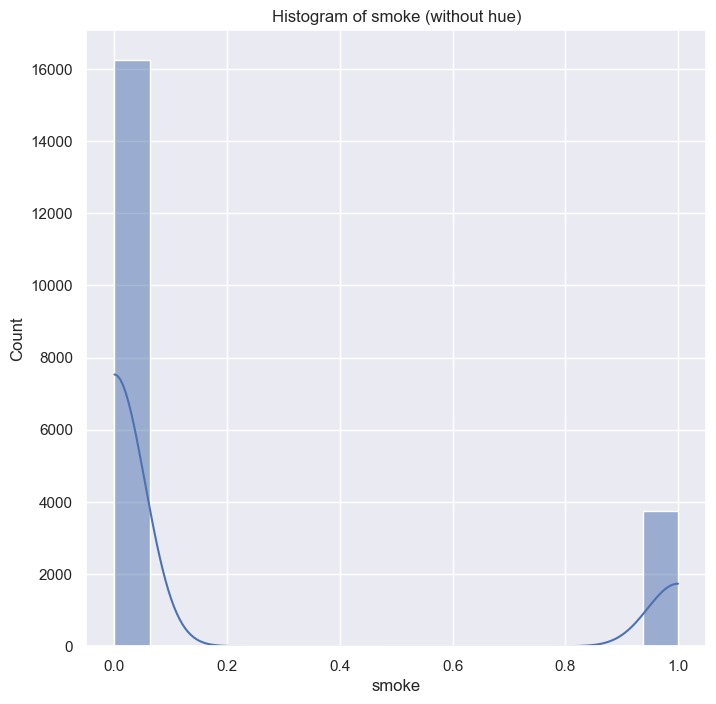

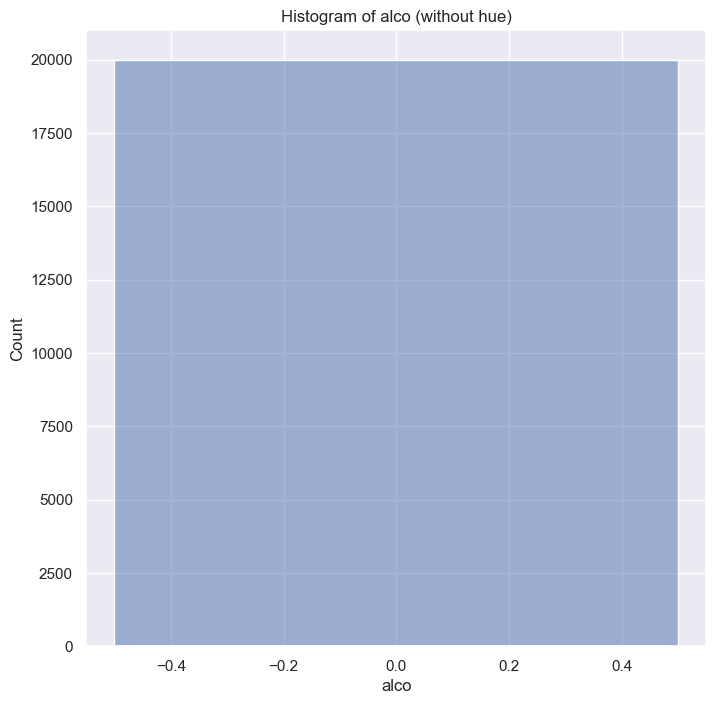

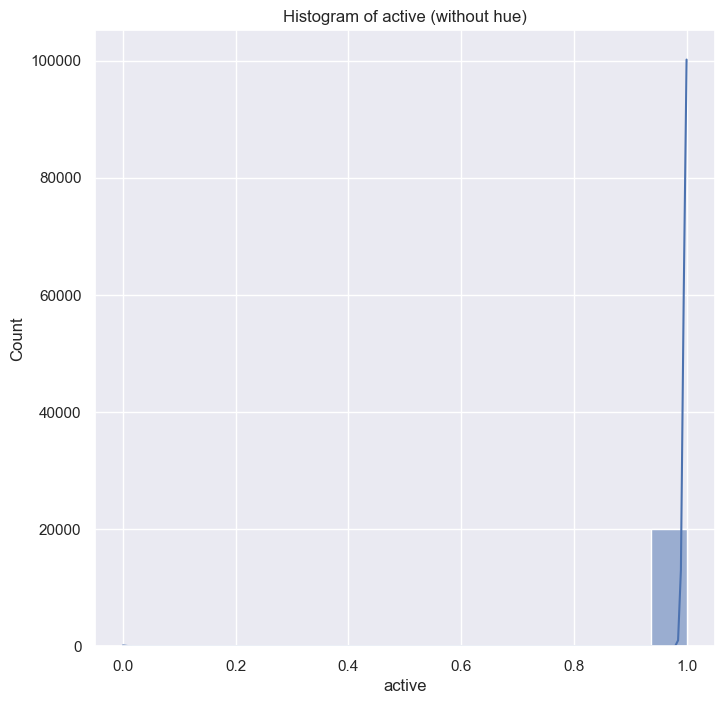

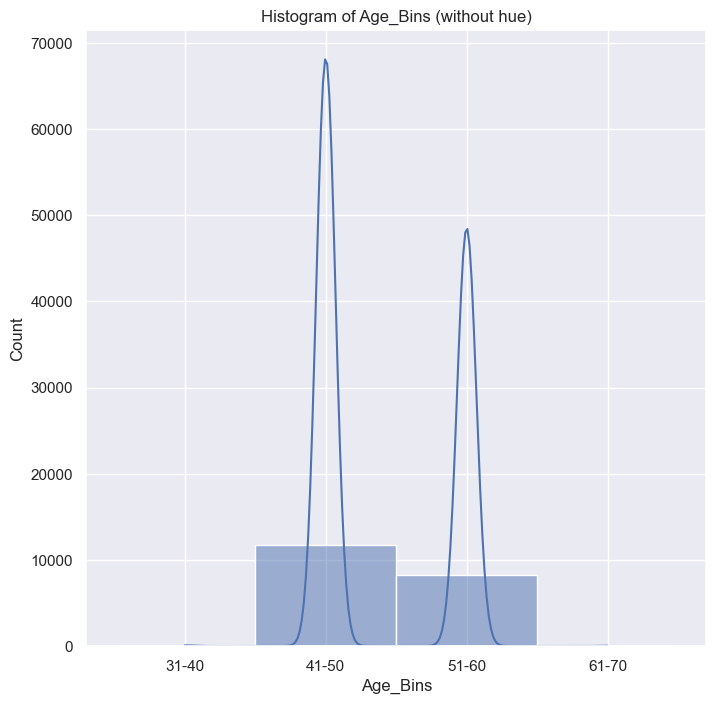

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop for histograms without hue
for feature in raw_data.columns:
    if feature != 'cardio':
        plt.figure(figsize=(8, 8))
        sns.histplot(x=raw_data[feature], kde=True)
        plt.xlabel(feature)
        plt.title(f'Histogram of {feature} (without hue)')
        plt.show()


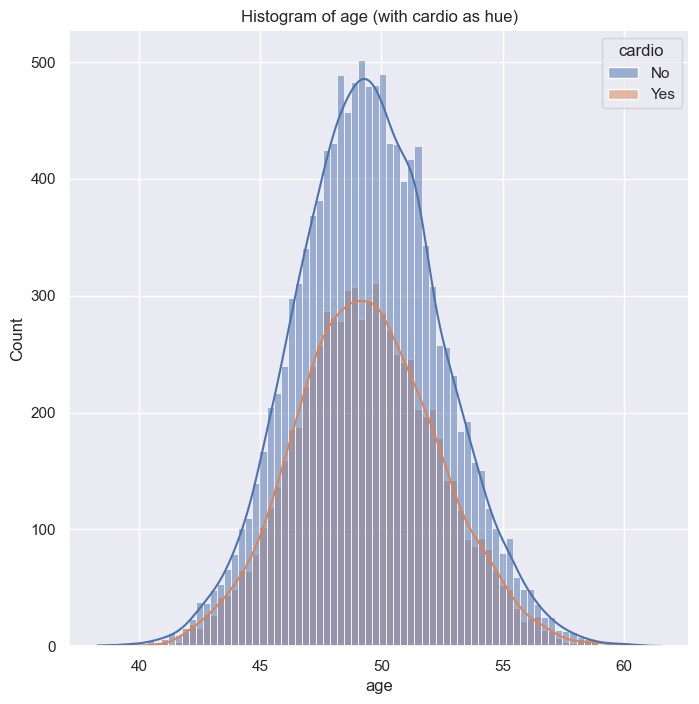

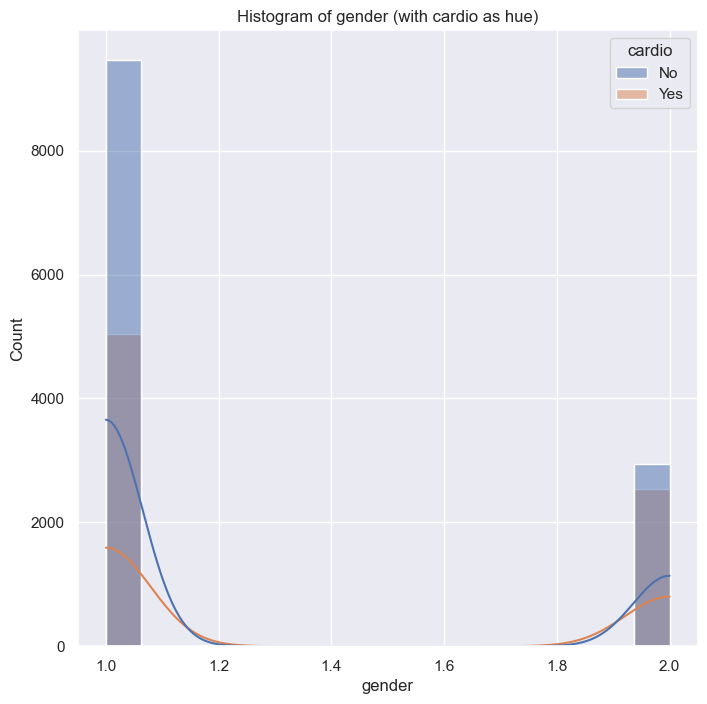

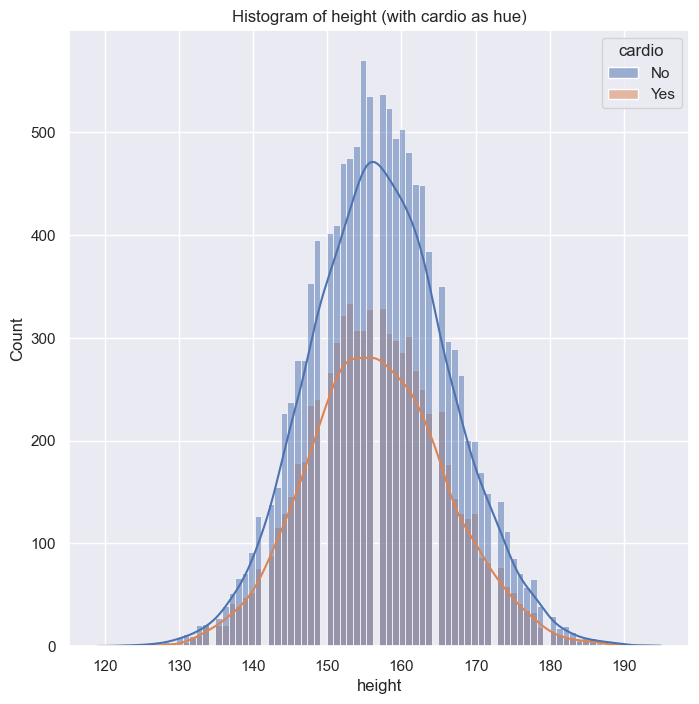

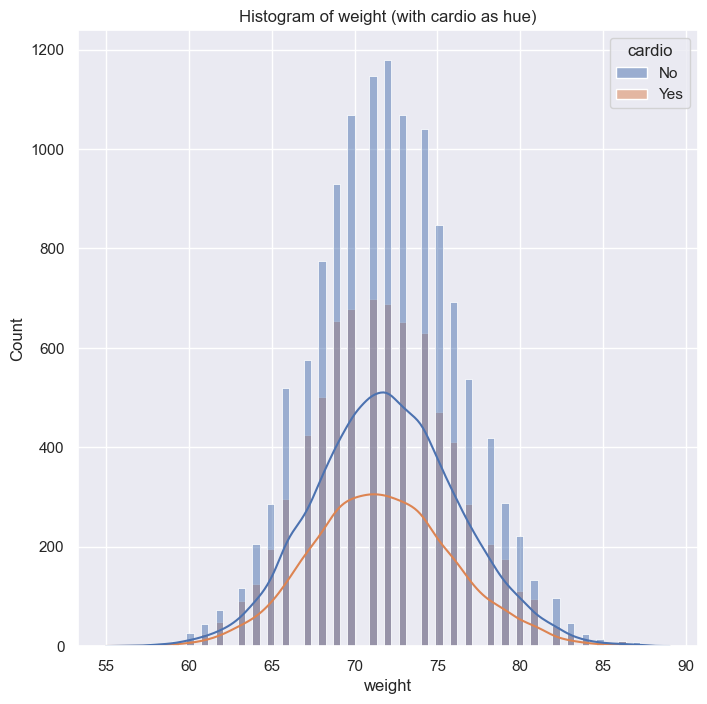

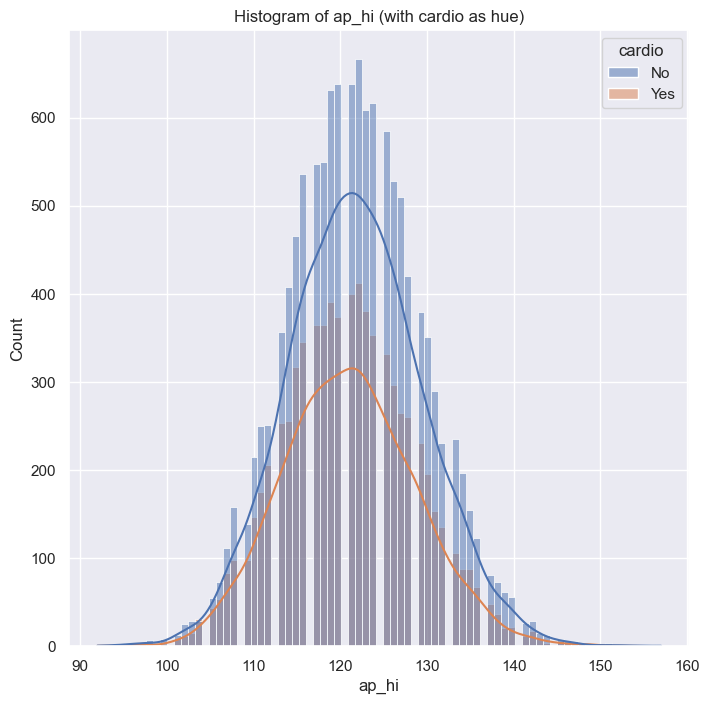

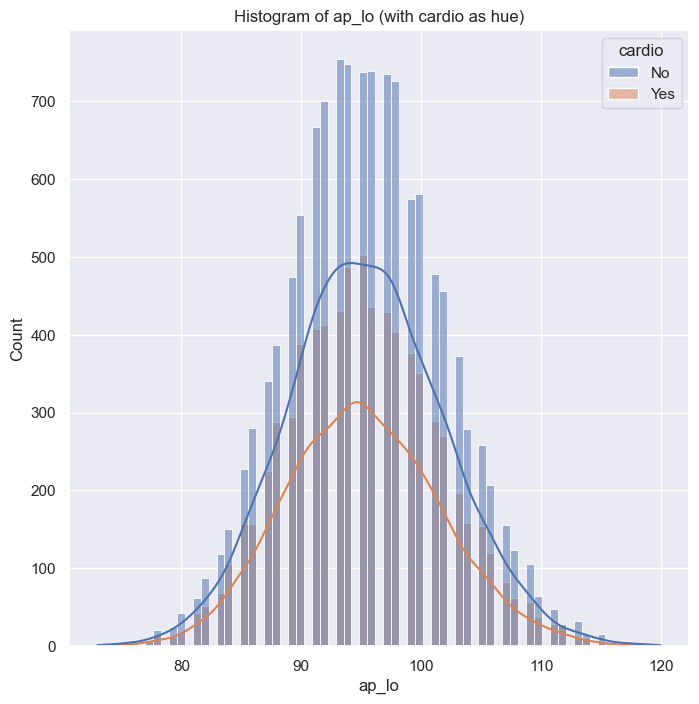

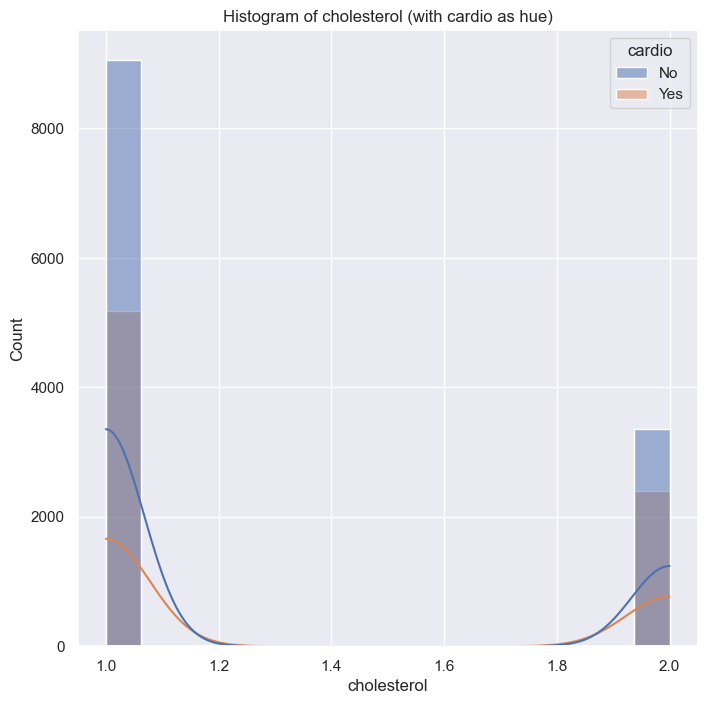

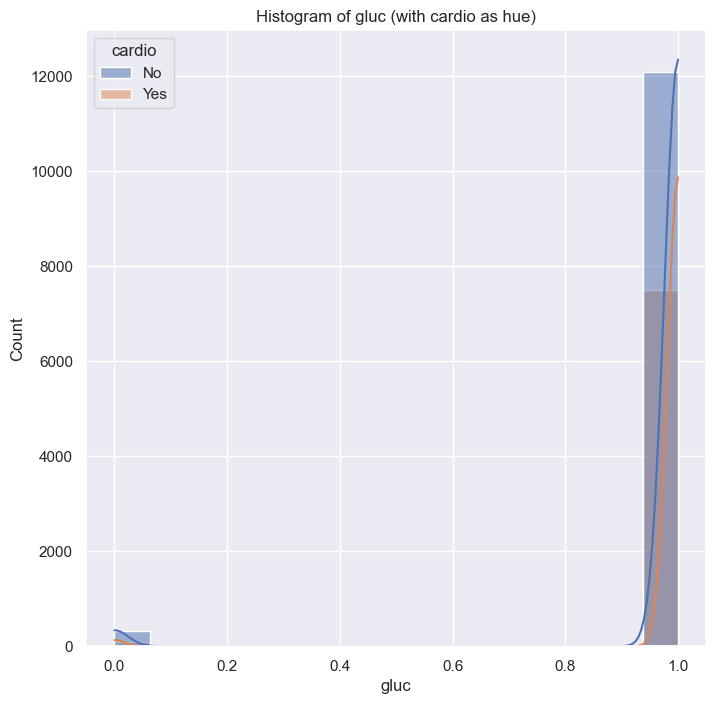

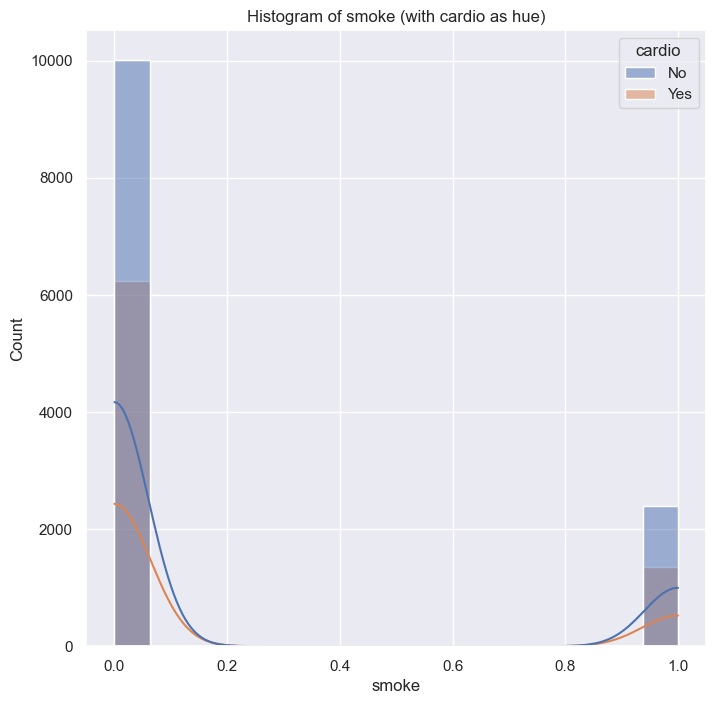

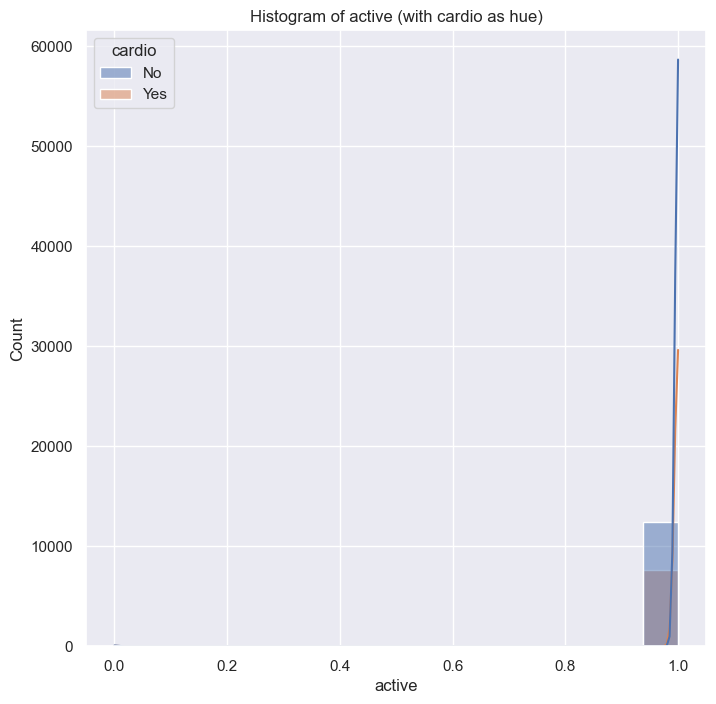

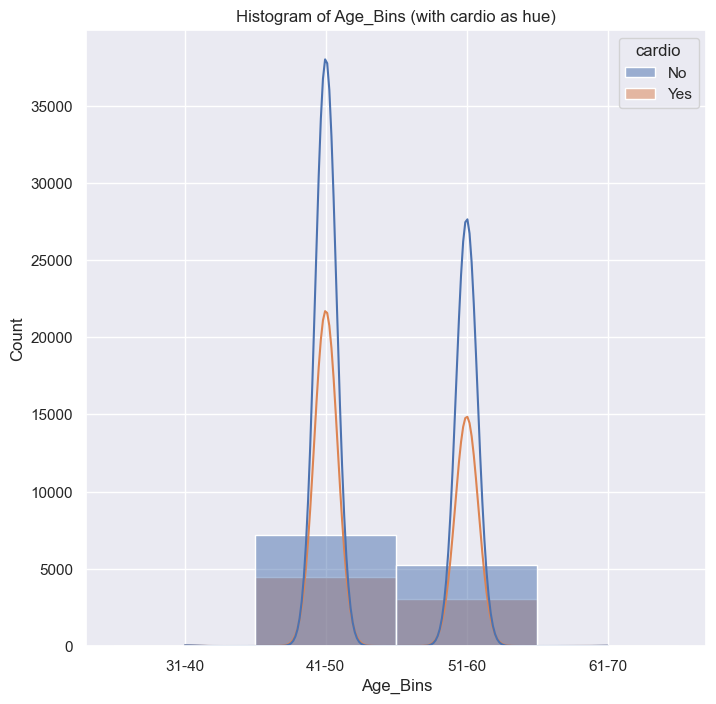

In [15]:
# Loop for histograms with hue (using 'cardio' as the hue column)
for feature in raw_data.columns:
    if feature != 'cardio' and feature != 'alco':
        plt.figure(figsize=(8, 8))
        sns.histplot(x=raw_data[feature], hue=raw_data['cardio'], kde=True)
        plt.xlabel(feature)
        plt.title(f'Histogram of {feature} (with cardio as hue)')
        plt.show()


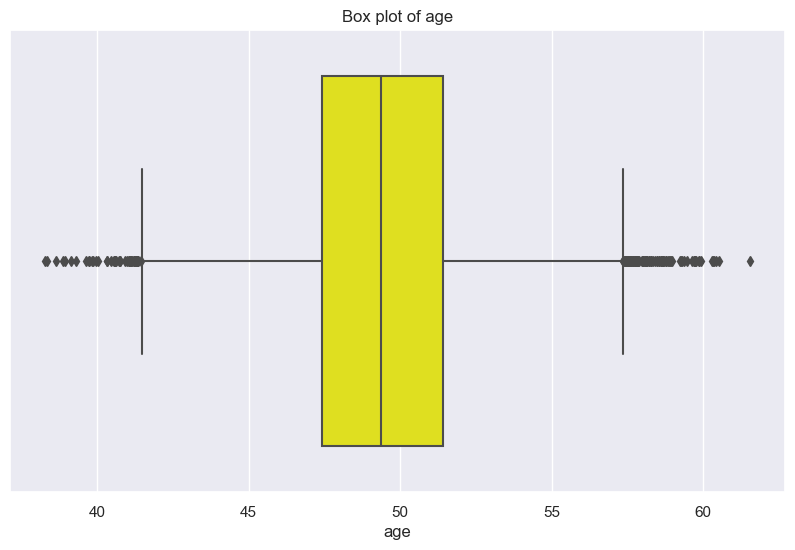

Feature: age
Number of outliers detected: 140
Outliers:
184      57.528767
375      57.775342
647      39.821918
753      58.136986
859      58.008219
           ...    
19611    40.446575
19676    58.126027
19823    58.049315
19853    41.224658
19858    59.695890
Name: age, Length: 140, dtype: float64



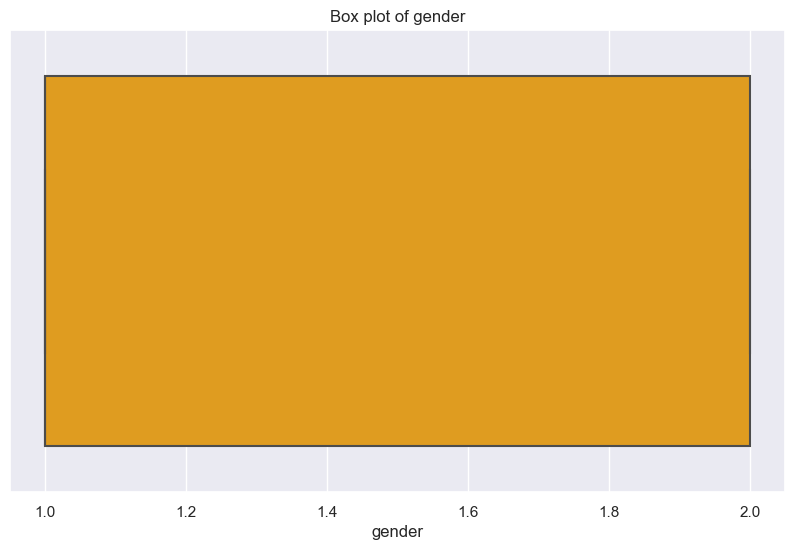

Feature: gender
Number of outliers detected: 0
Outliers:
Series([], Name: gender, dtype: int64)



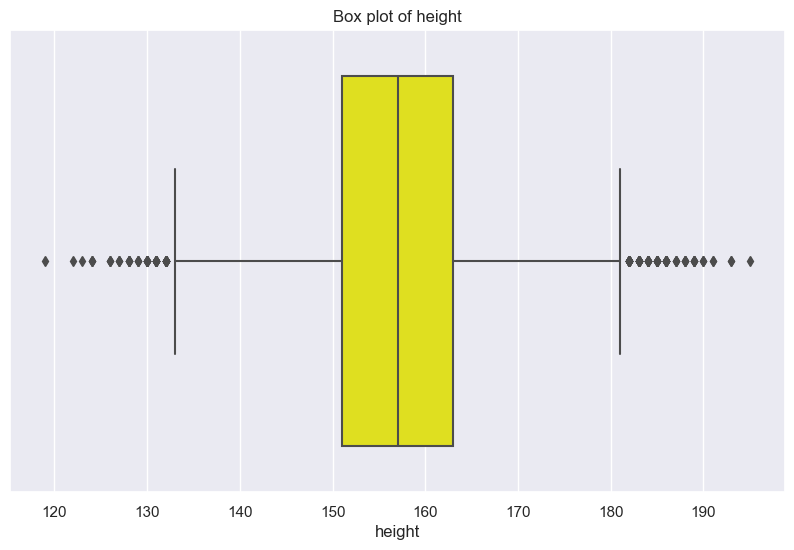

Feature: height
Number of outliers detected: 181
Outliers:
375      185
647      128
753      183
859      183
885      186
        ... 
19676    186
19823    185
19853    132
19854    132
19858    189
Name: height, Length: 181, dtype: int64



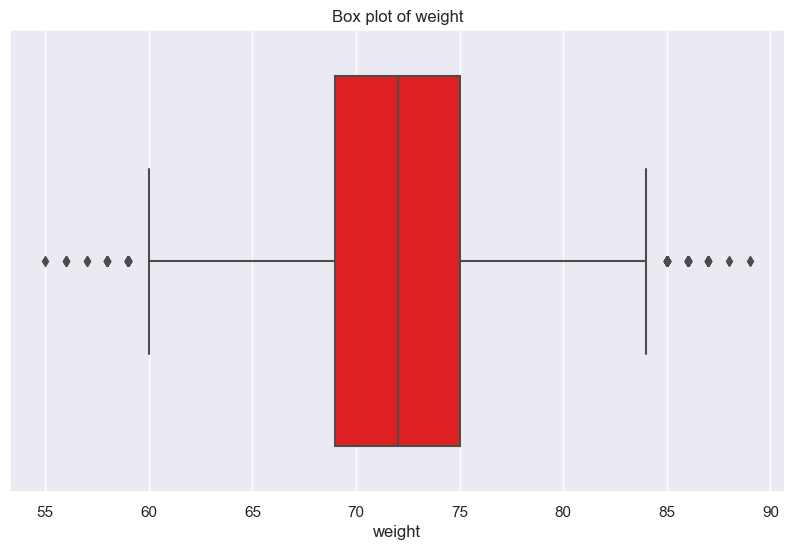

Feature: weight
Number of outliers detected: 83
Outliers:
647      59
885      86
1228     59
1464     56
1465     86
         ..
19259    85
19315    59
19611    58
19823    85
19858    88
Name: weight, Length: 83, dtype: int64



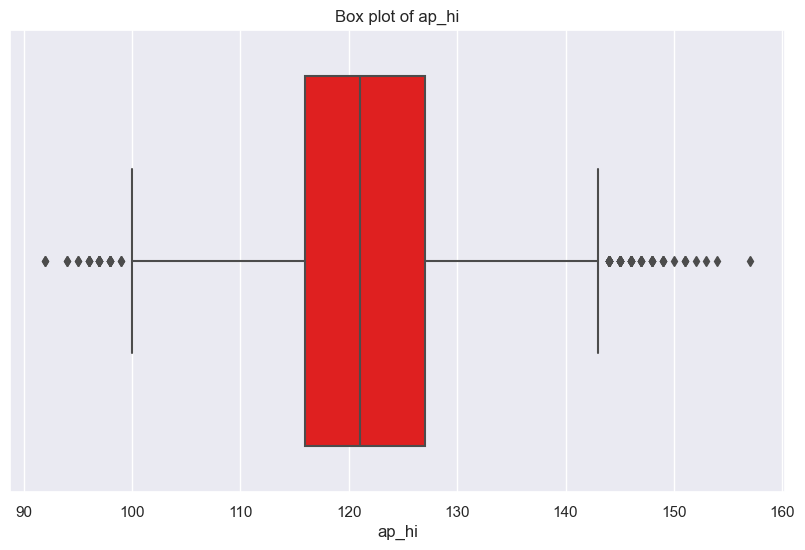

Feature: ap_hi
Number of outliers detected: 92
Outliers:
647       99
1464      92
1738      96
1977     149
2072     145
        ... 
19596    148
19611     98
19854     95
19858    149
19980    144
Name: ap_hi, Length: 92, dtype: int64



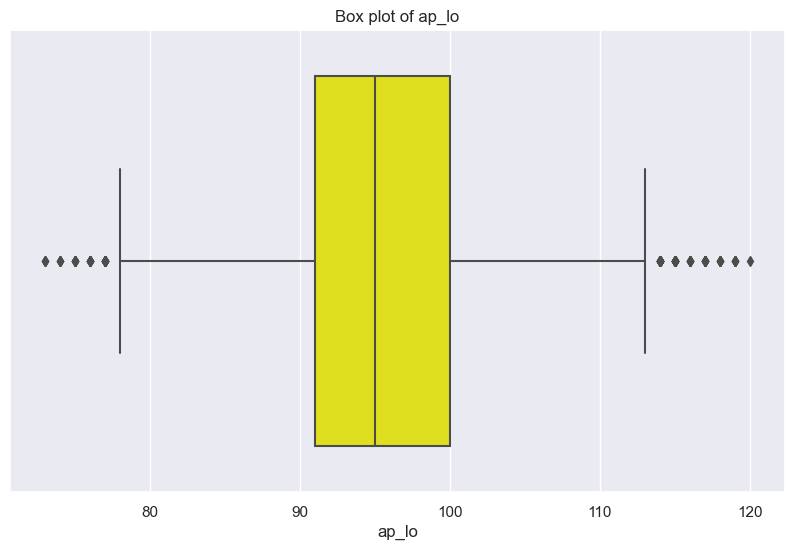

Feature: ap_lo
Number of outliers detected: 112
Outliers:
257      115
375      115
469      114
738       74
767      115
        ... 
18982    114
19309    115
19596    116
19660     77
19858    114
Name: ap_lo, Length: 112, dtype: int64



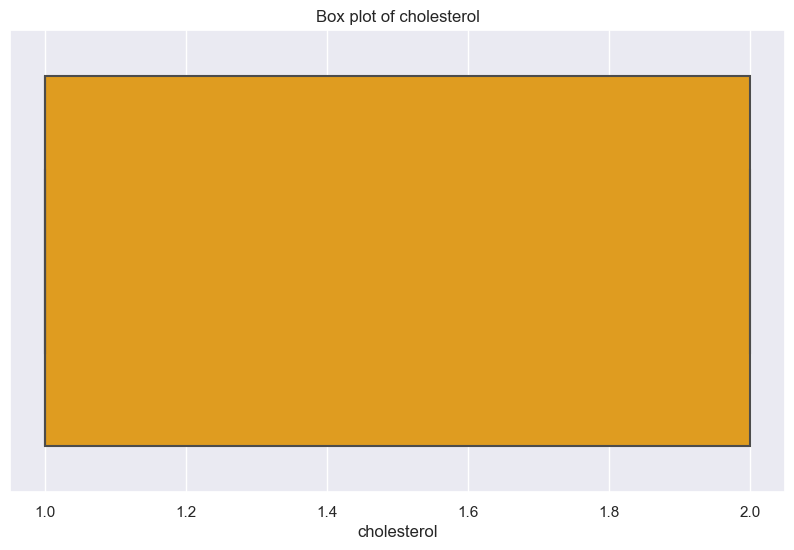

Feature: cholesterol
Number of outliers detected: 0
Outliers:
Series([], Name: cholesterol, dtype: int64)



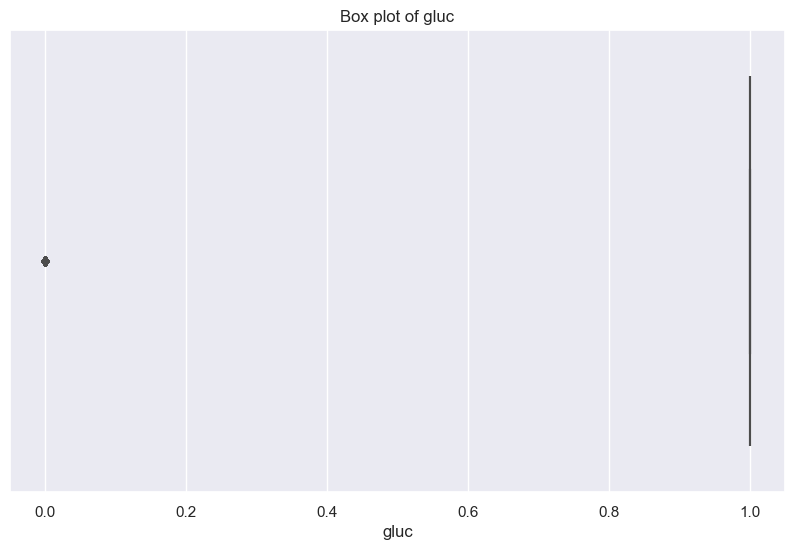

Feature: gluc
Number of outliers detected: 428
Outliers:
29       0
49       0
133      0
159      0
206      0
        ..
19745    0
19770    0
19819    0
19829    0
19883    0
Name: gluc, Length: 428, dtype: int64



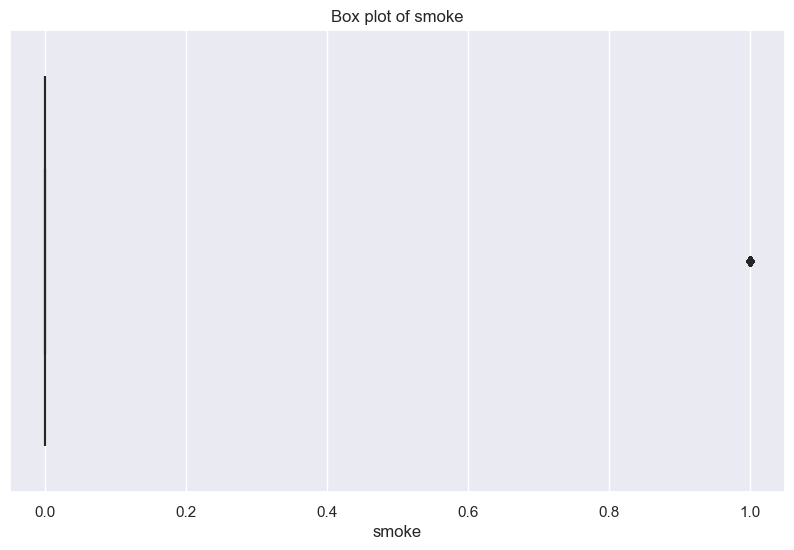

Feature: smoke
Number of outliers detected: 3743
Outliers:
2        1
4        1
13       1
15       1
25       1
        ..
19974    1
19976    1
19984    1
19985    1
19996    1
Name: smoke, Length: 3743, dtype: int64



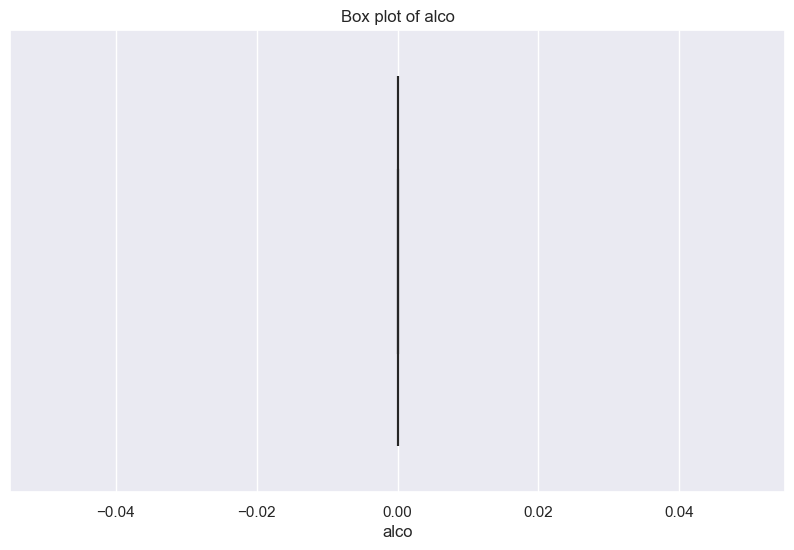

Feature: alco
Number of outliers detected: 0
Outliers:
Series([], Name: alco, dtype: int64)



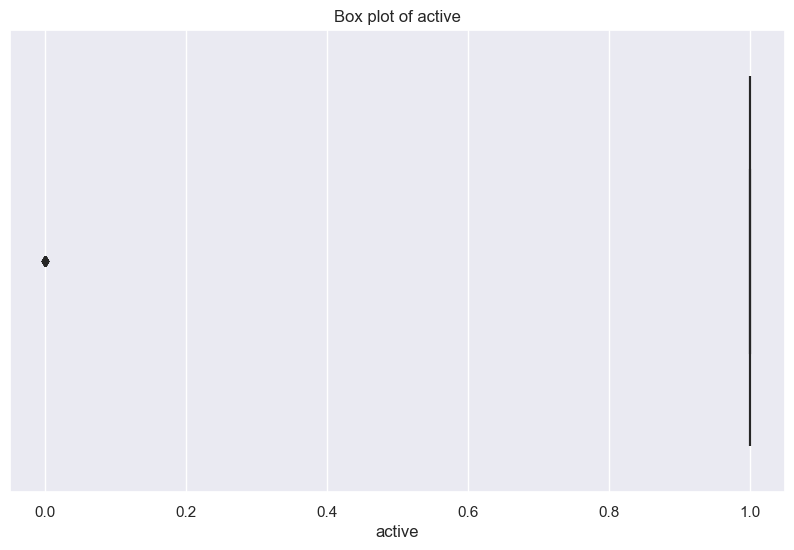

Feature: active
Number of outliers detected: 26
Outliers:
227      0
540      0
697      0
974      0
3339     0
3427     0
3776     0
4216     0
4578     0
5954     0
6991     0
8442     0
8742     0
8902     0
9139     0
9843     0
10038    0
11847    0
13465    0
14701    0
15131    0
15929    0
16220    0
16628    0
18601    0
19838    0
Name: active, dtype: int64



In [16]:
# Loop for box plots and outlier detection
import random

for feature in raw_data.columns:
    if feature != 'cardio' and feature != 'Age_Bins':  # Skip the target variable if needed
        plt.figure(figsize=(10, 6))
        colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
        sns.boxplot(x=raw_data[feature], color = random.choice(colorlist))
        plt.title(f'Box plot of {feature}')
        plt.xlabel(feature)
        plt.show()
        
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = raw_data[feature].quantile(0.25)
        Q3 = raw_data[feature].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = raw_data[(raw_data[feature] < lower_bound) | (raw_data[feature] > upper_bound)]
        
        # Print the number of outliers detected
        print(f'Feature: {feature}')
        print(f'Number of outliers detected: {outliers.shape[0]}')
        print(f'Outliers:\n{outliers[feature]}\n')


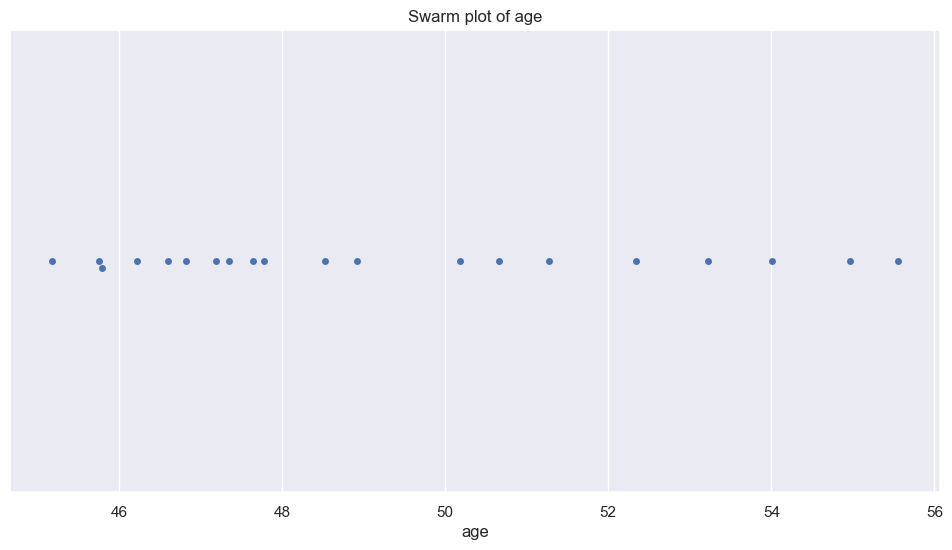

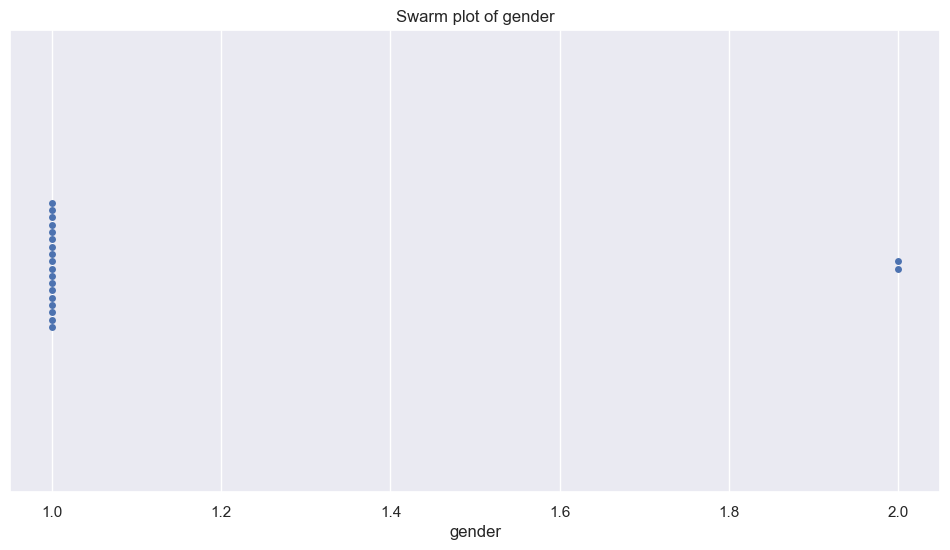

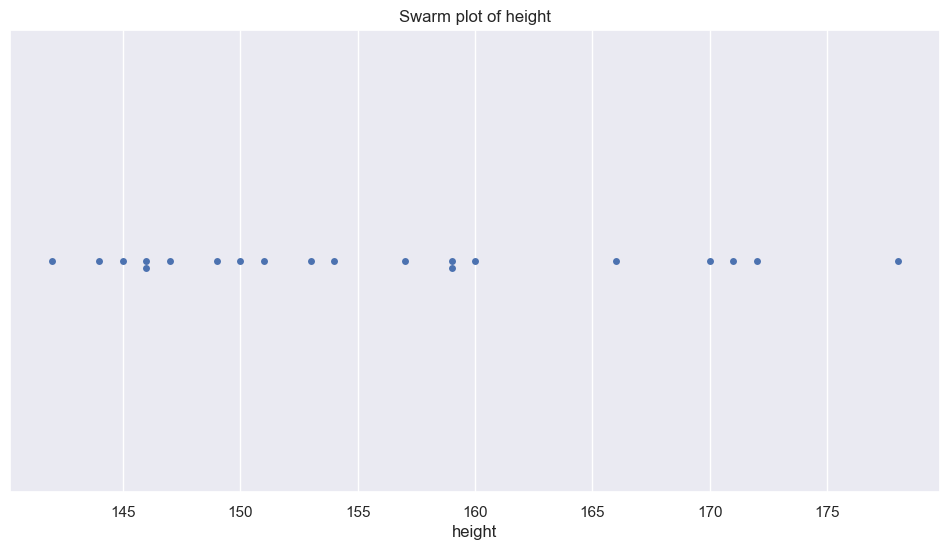

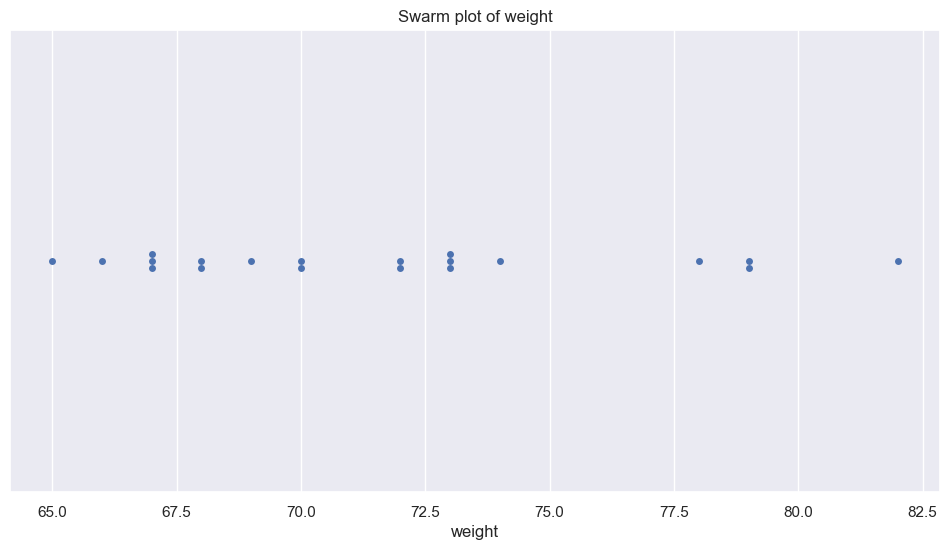

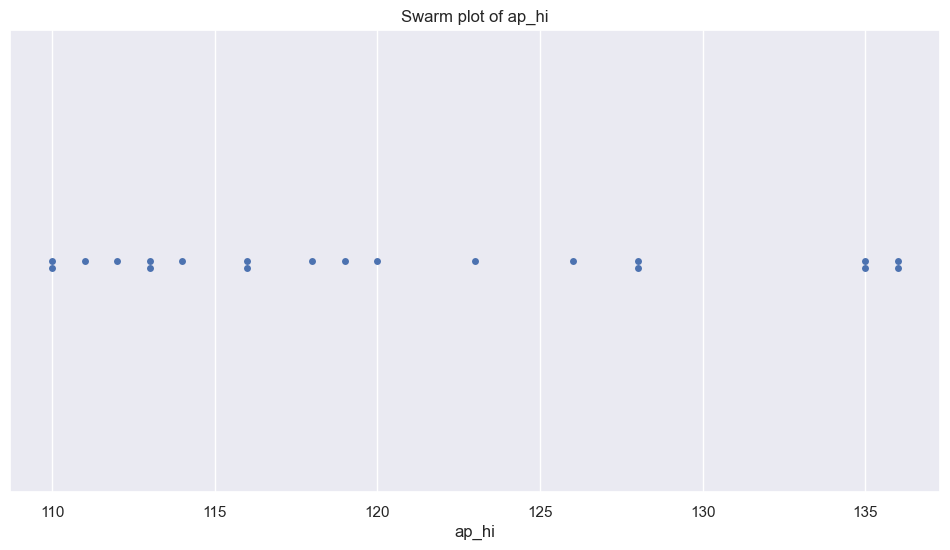

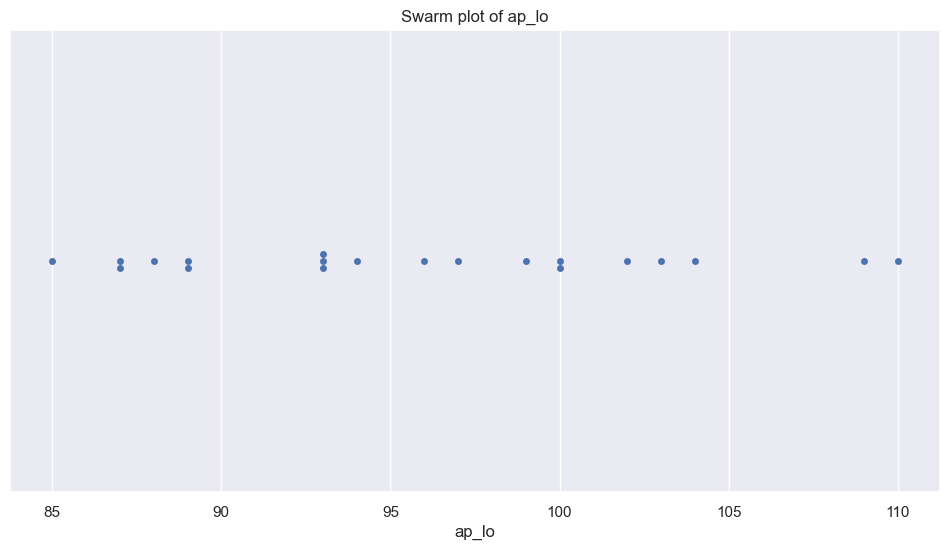

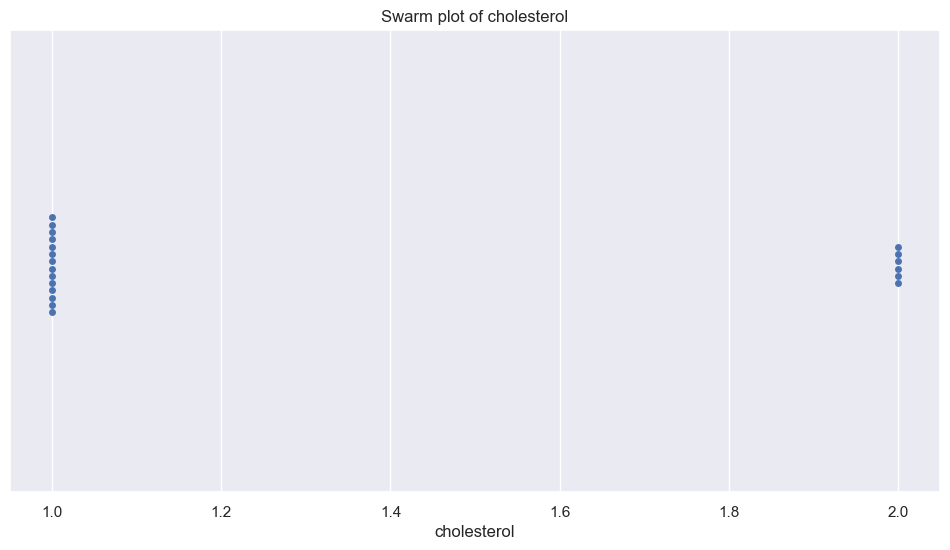

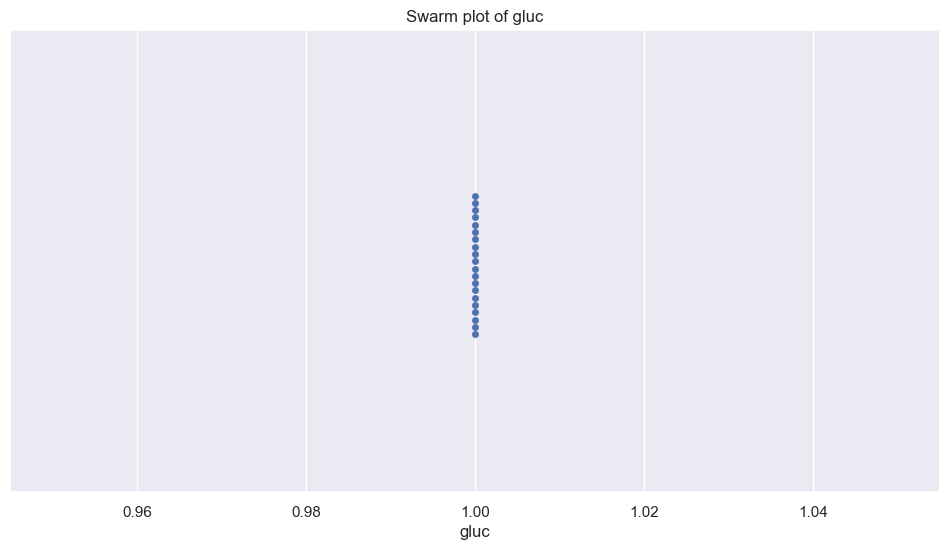

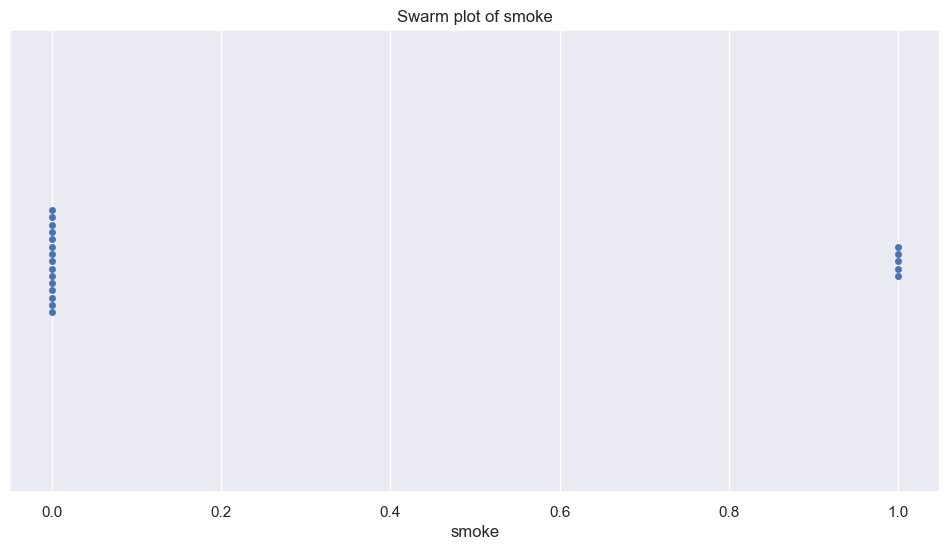

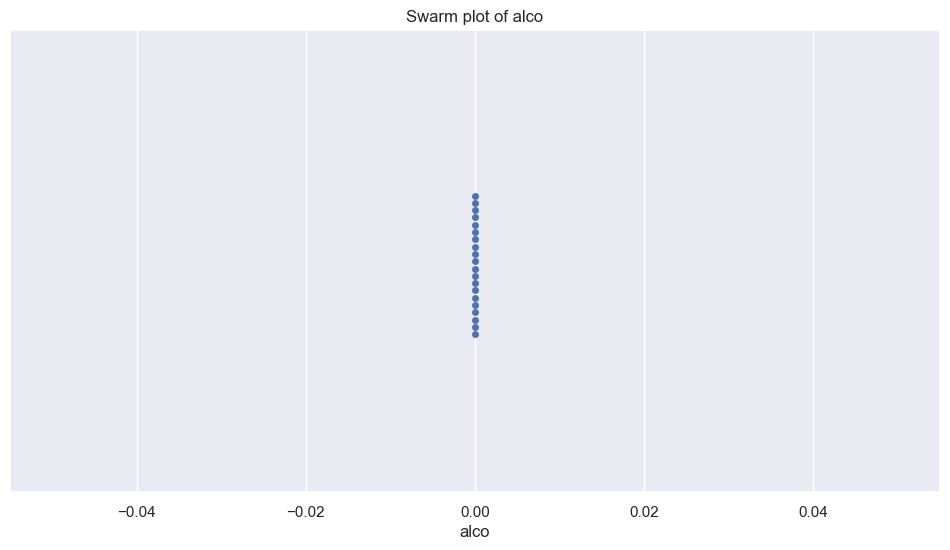

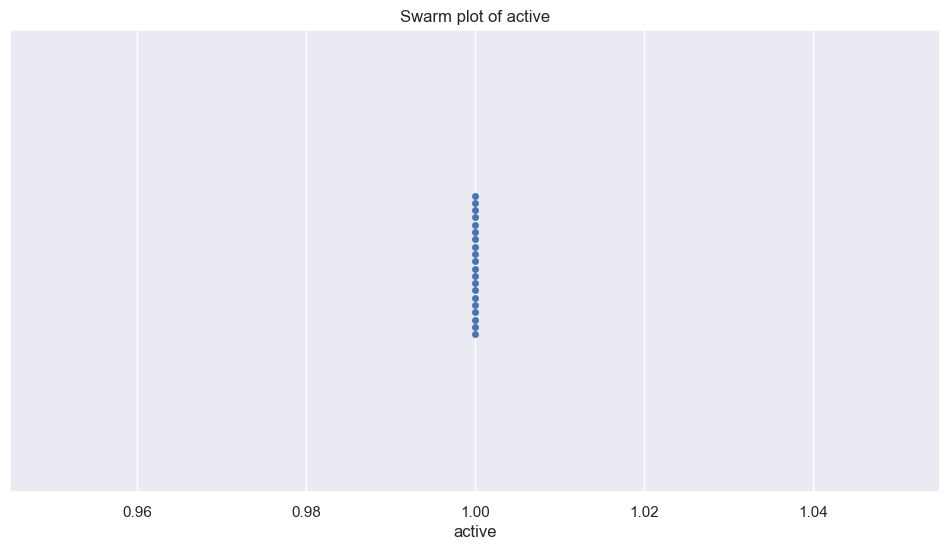

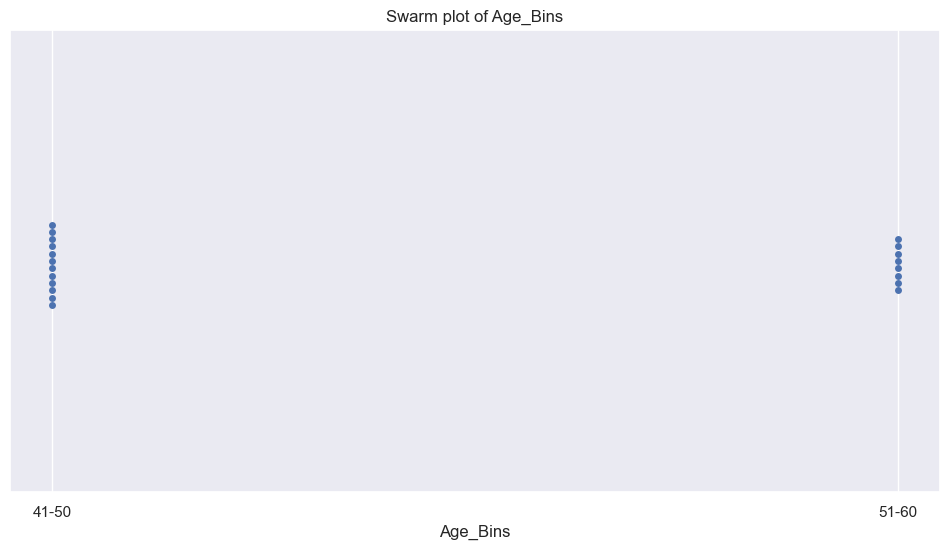

In [17]:
# Loop for swarm plots and outlier detection

sample_data = raw_data.sample(n=20, random_state=42)

for feature in raw_data.columns:
    if feature != 'cardio':  # Skip the target variable if needed
        plt.figure(figsize=(12, 6))
        sns.swarmplot(x=sample_data[feature])
        plt.title(f'Swarm plot of {feature}')
        plt.xlabel(feature)
        plt.show()
        


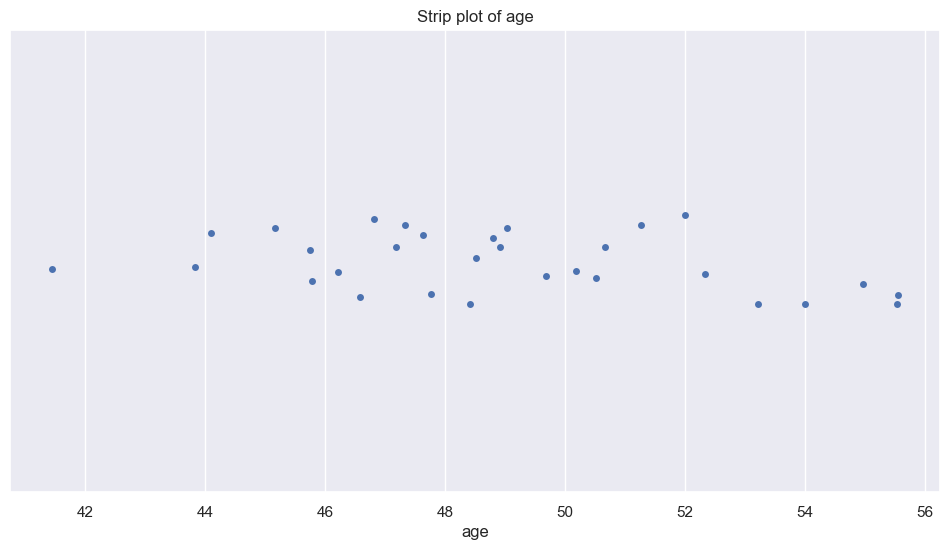

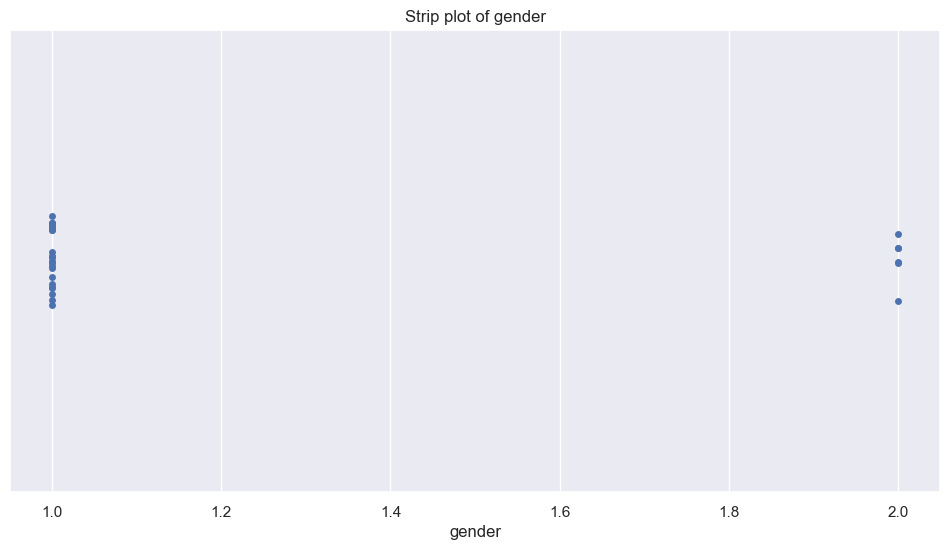

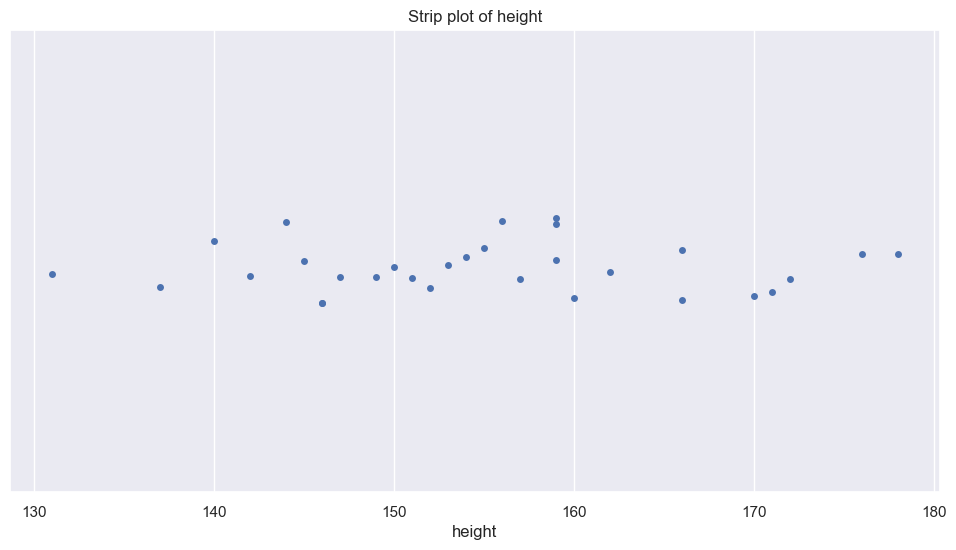

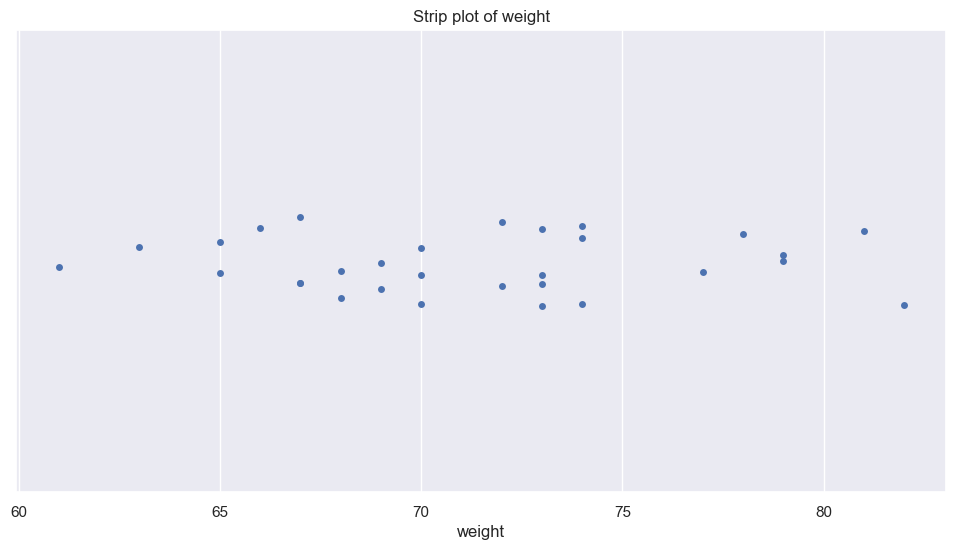

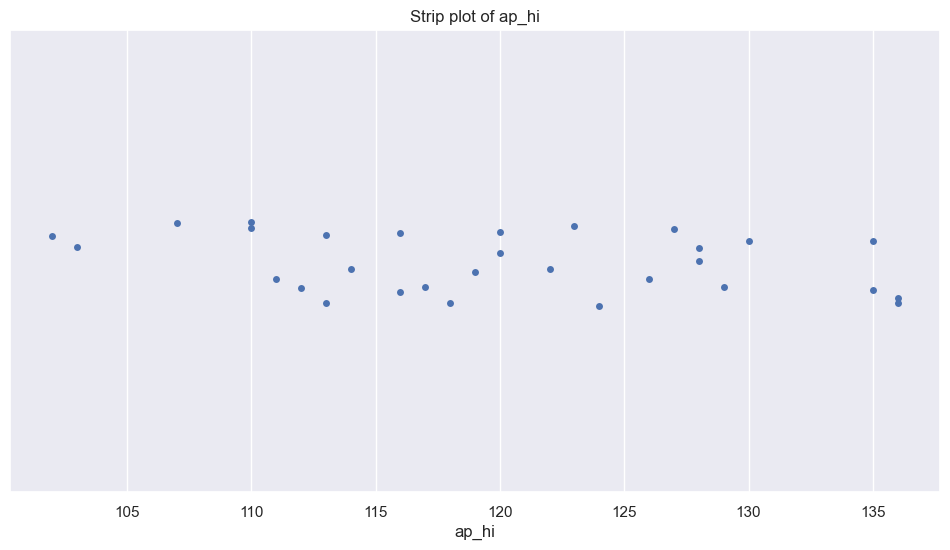

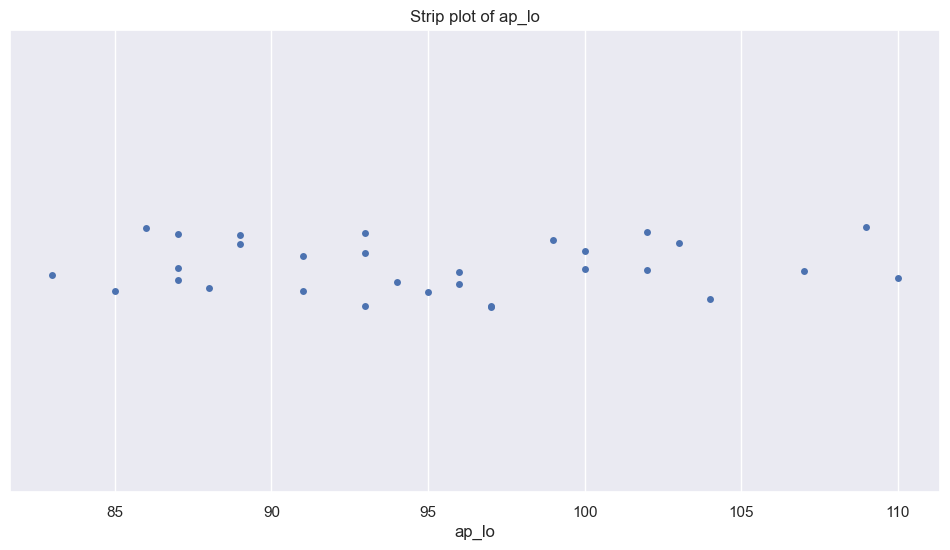

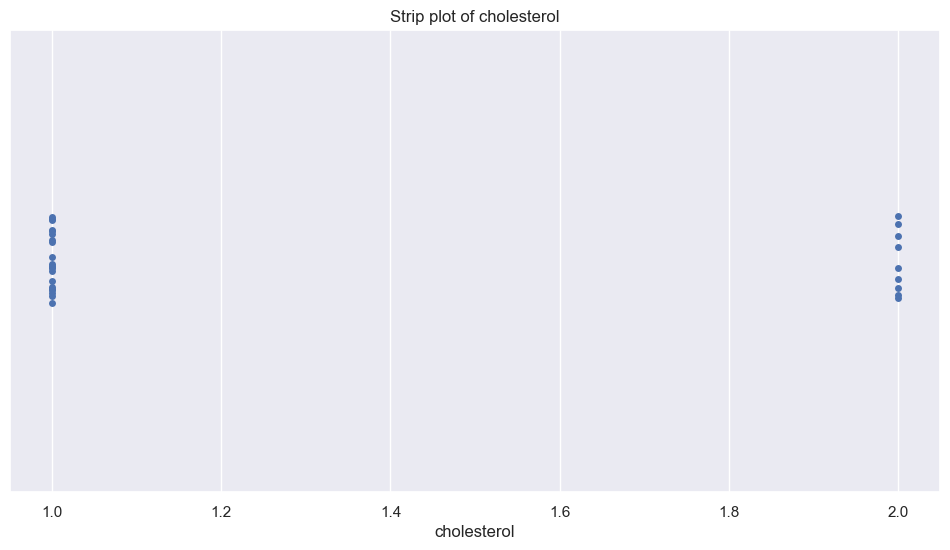

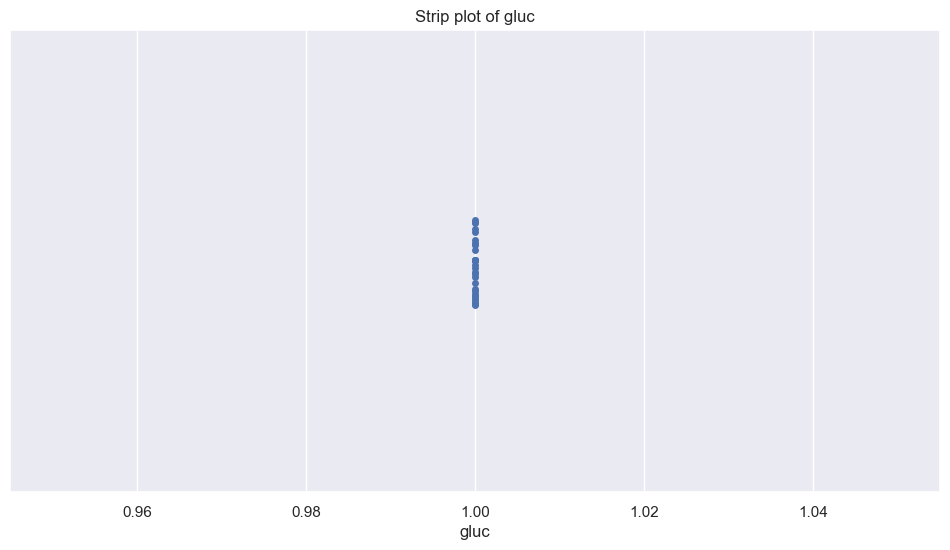

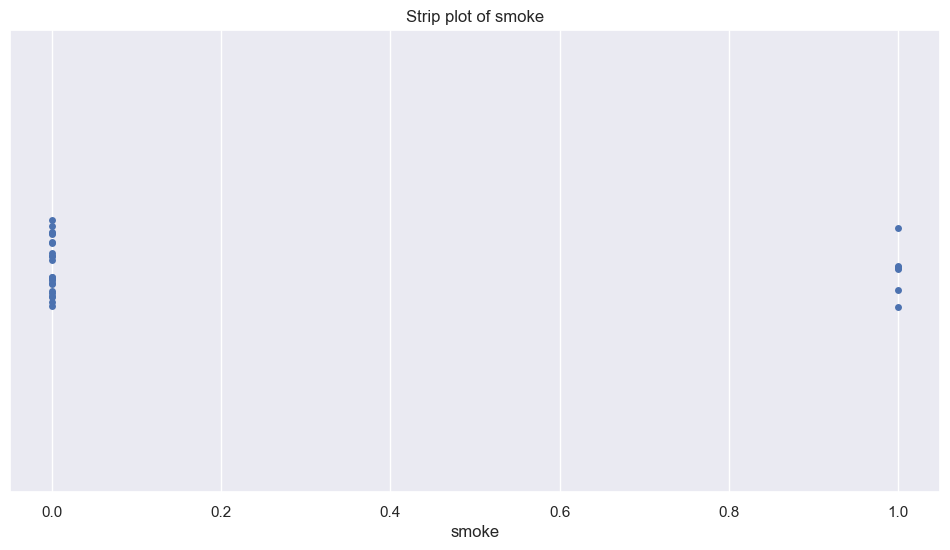

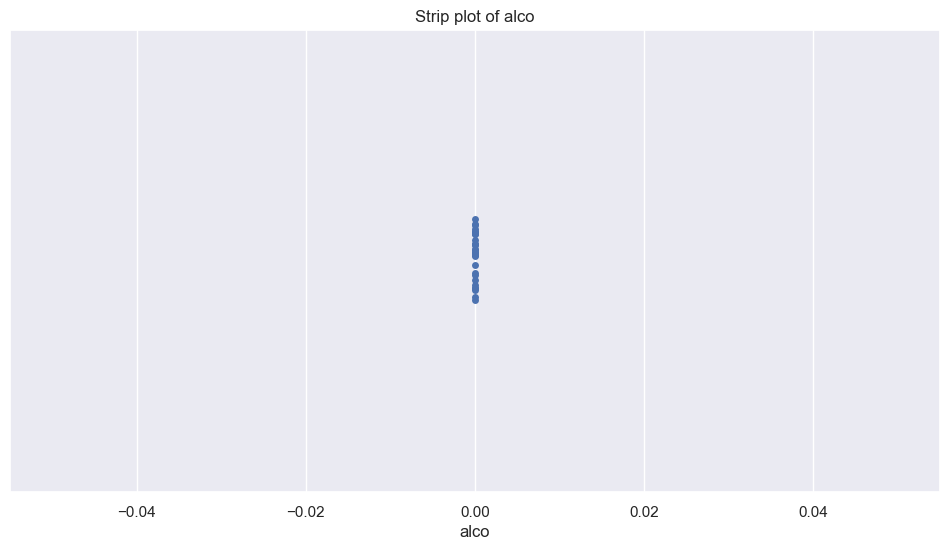

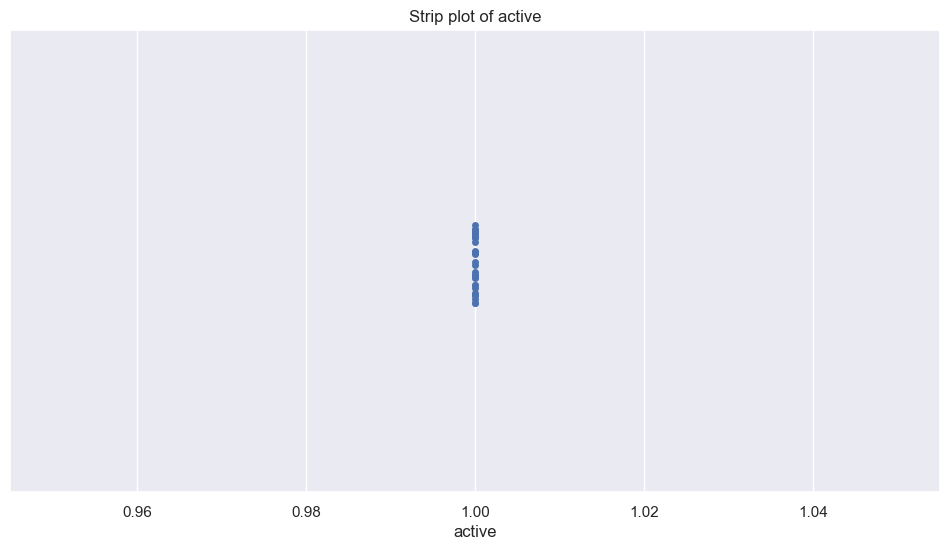

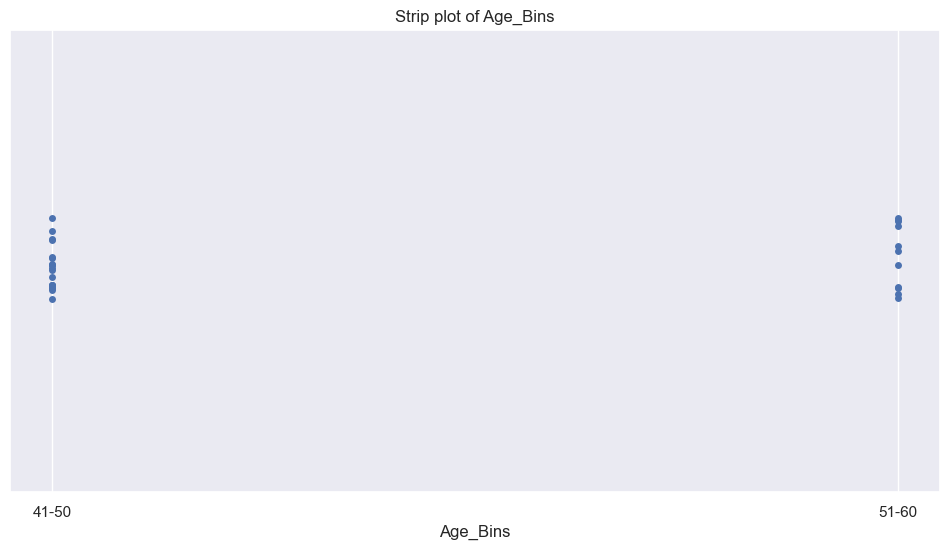

In [18]:
# Strip plot

sample_data = raw_data.sample(n=30, random_state=42)

for feature in raw_data.columns:
    if feature != 'cardio':  # Skip the target variable if needed
        plt.figure(figsize=(12, 6))
        sns.stripplot(x=sample_data[feature])
        plt.title(f'Strip plot of {feature}')
        plt.xlabel(feature)
        plt.show()


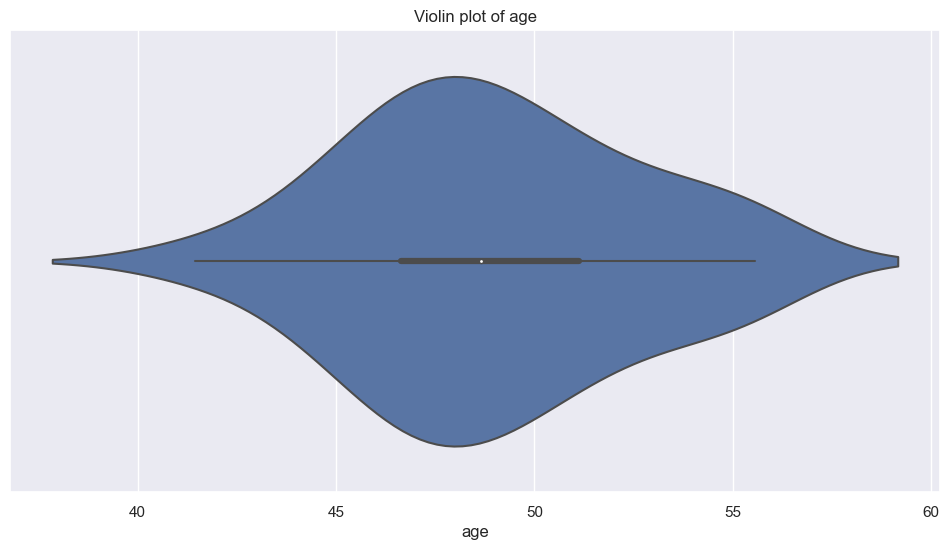

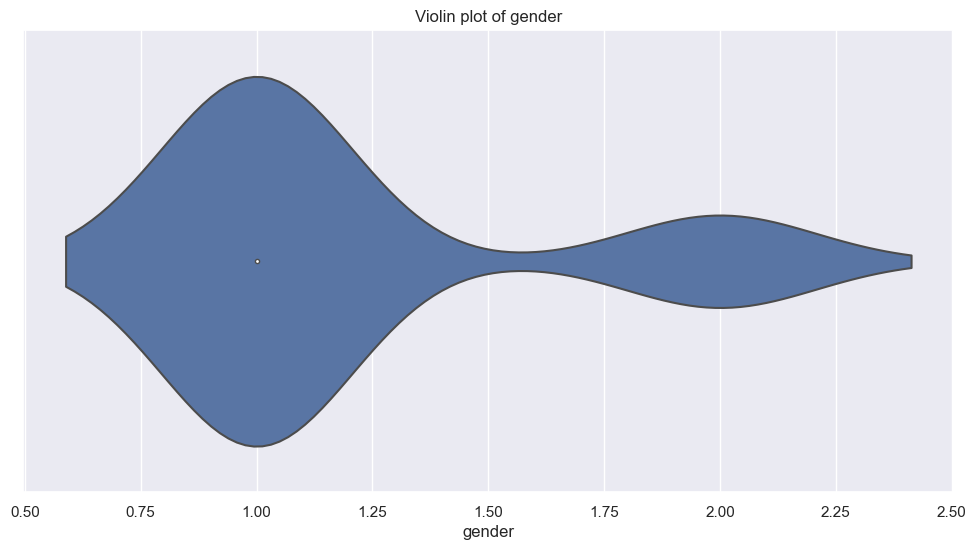

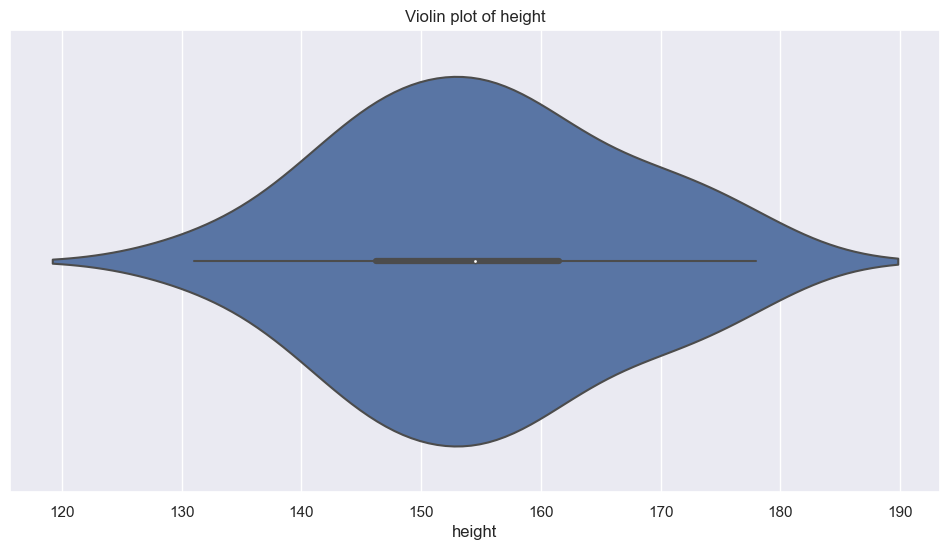

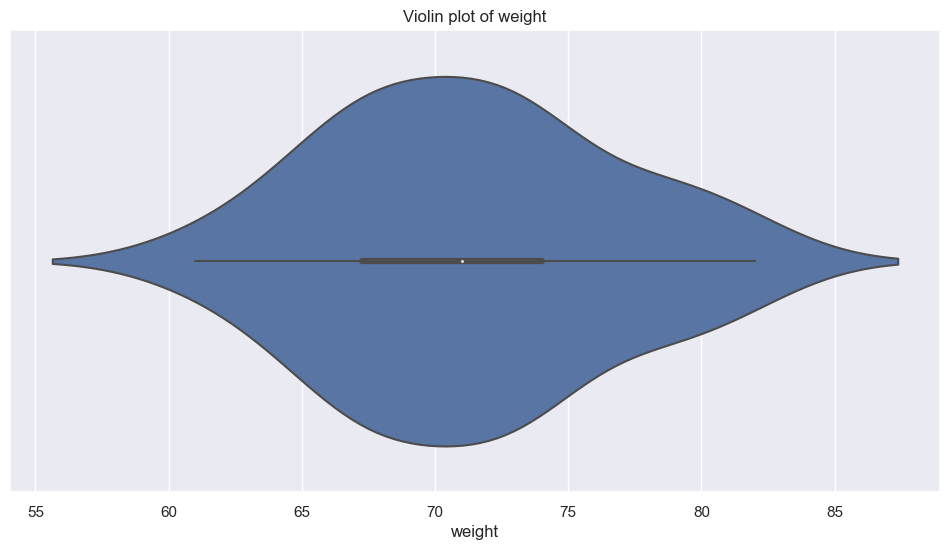

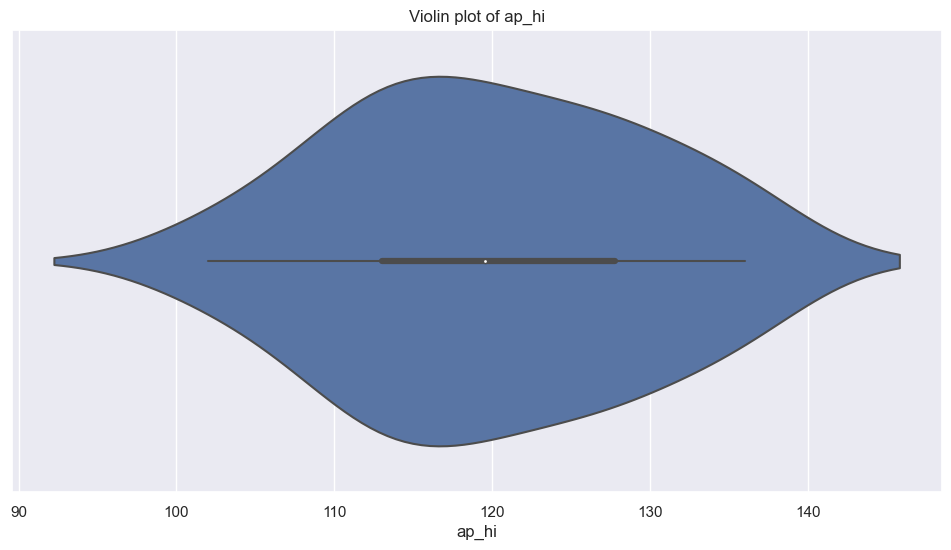

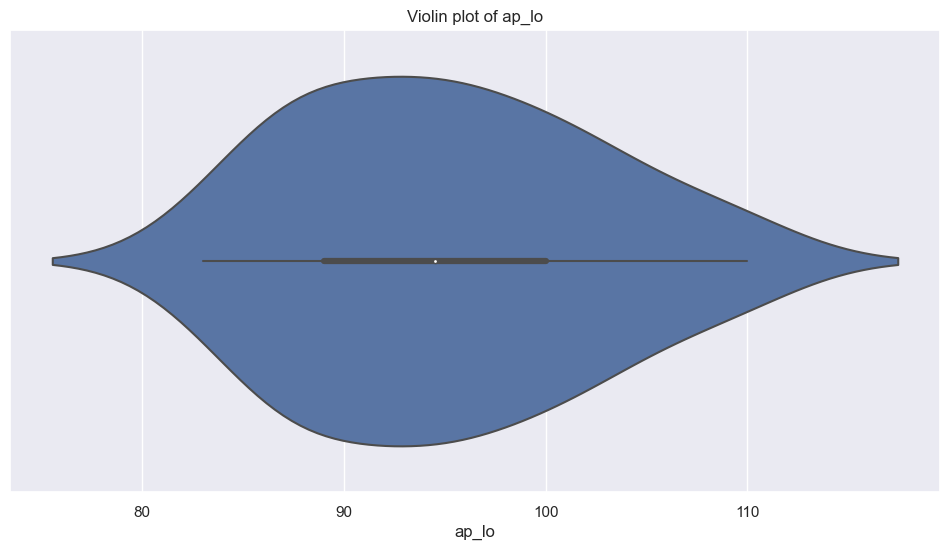

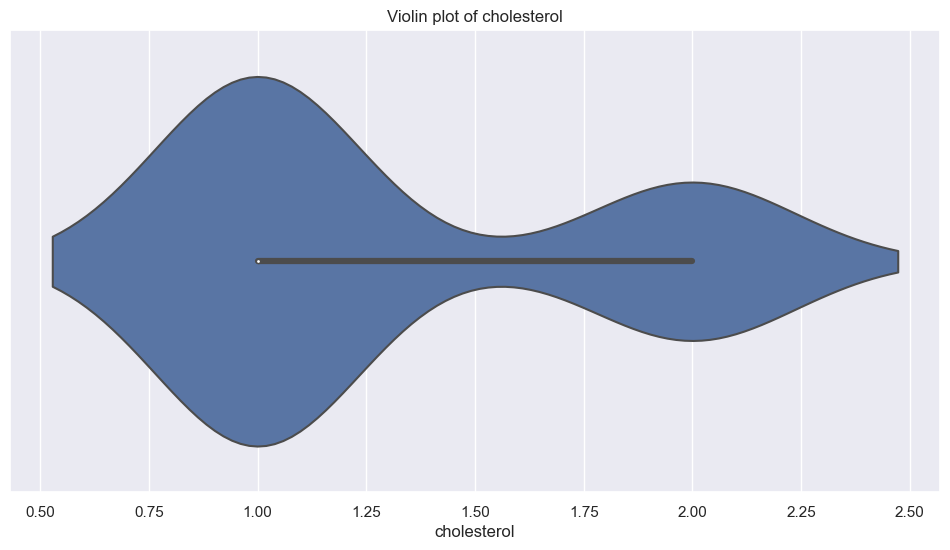

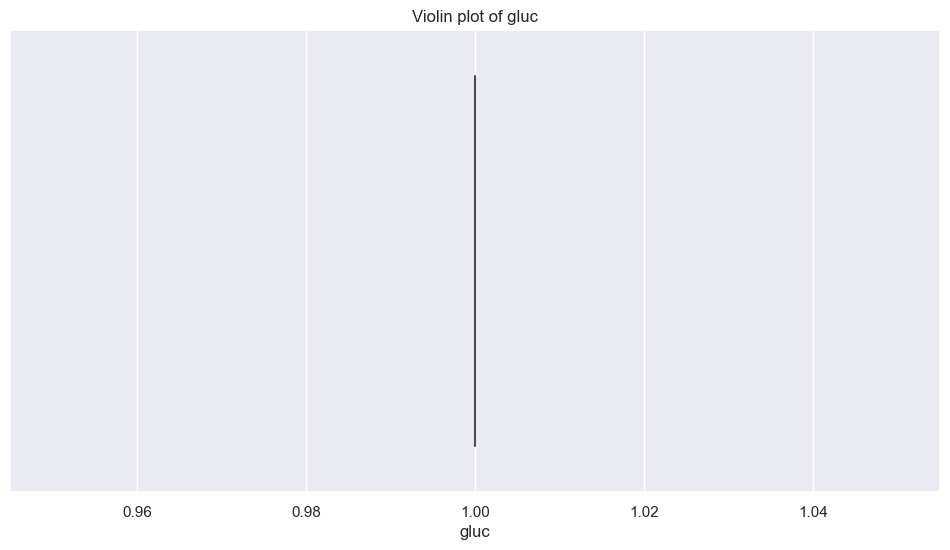

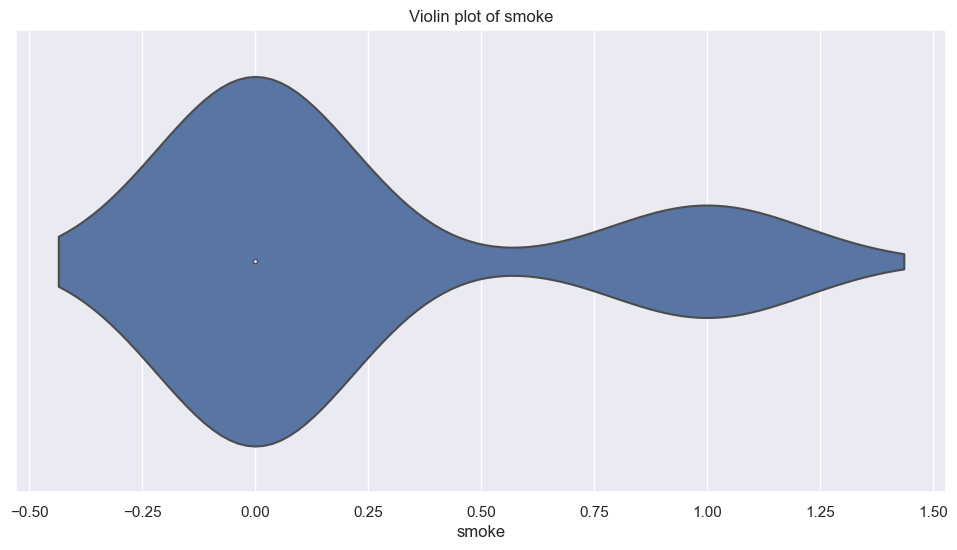

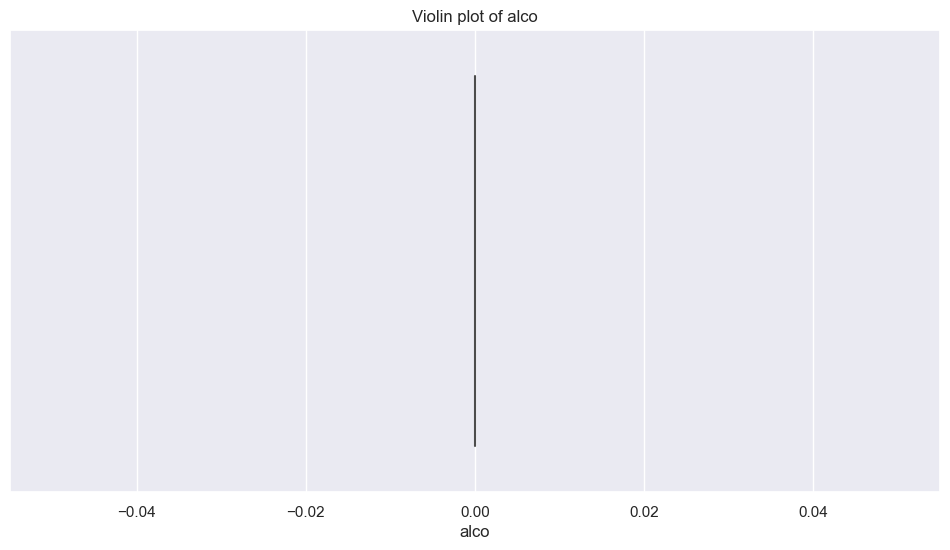

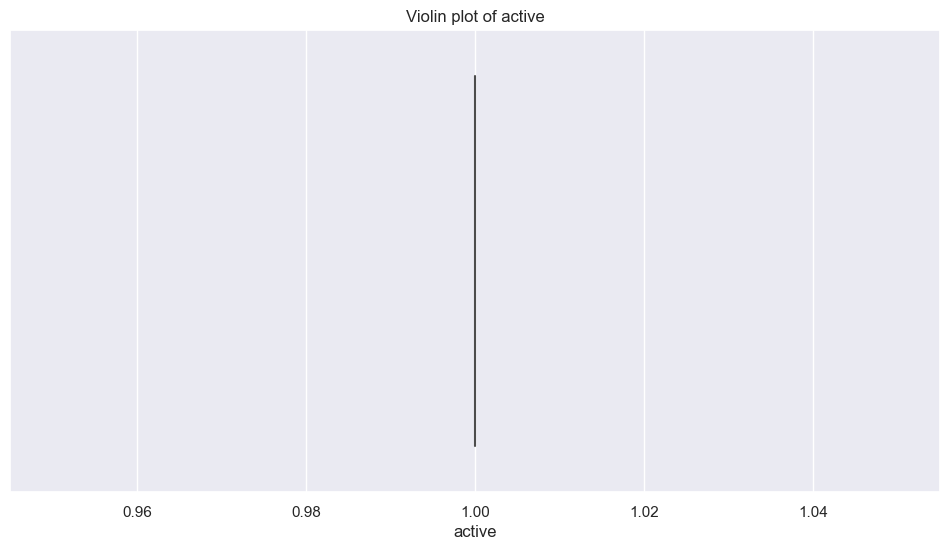

In [19]:
#Violin plot

sample_data = raw_data.sample(n=30, random_state=42)


for feature in raw_data.columns:
    if feature != 'cardio' and feature != 'Age_Bins': 
        plt.figure(figsize=(12, 6))
        sns.violinplot(x=sample_data[feature])
        plt.title(f'Violin plot of {feature}')
        plt.xlabel(feature)
        plt.show()


Feature Scaling 

In [20]:
# Algorithm 1: Dropping Constant Features using Variance Threshold Technique

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the data to avoid modifying the original dataset
features = raw_data.drop(columns=['cardio'])

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in features.columns:
    if features[column].dtype == 'object' or features[column].dtype == 'category':
        le = LabelEncoder()
        features[column] = le.fit_transform(features[column].astype(str))
        label_encoders[column] = le

# Initialize the VarianceThreshold object with a threshold of 0 (to drop constant features)
var_thresh = VarianceThreshold(threshold=0)

# Apply the variance threshold to the encoded data
transformed_features = var_thresh.fit_transform(features)

# Get the retained feature names
retained_feature_names = features.columns[var_thresh.get_support()]

# Create a new DataFrame with only the retained features
filtered_data = pd.DataFrame(transformed_features, columns=retained_feature_names)

# Print the retained feature names
print("Retained features after dropping constant features:")
print(retained_feature_names)

# Print the shape before and after feature reduction
print("\nOriginal shape:", raw_data.shape)
print("Shape after dropping constant features:", filtered_data.shape)



Retained features after dropping constant features:
Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'active', 'Age_Bins'],
      dtype='object')

Original shape: (20000, 13)
Shape after dropping constant features: (20000, 11)


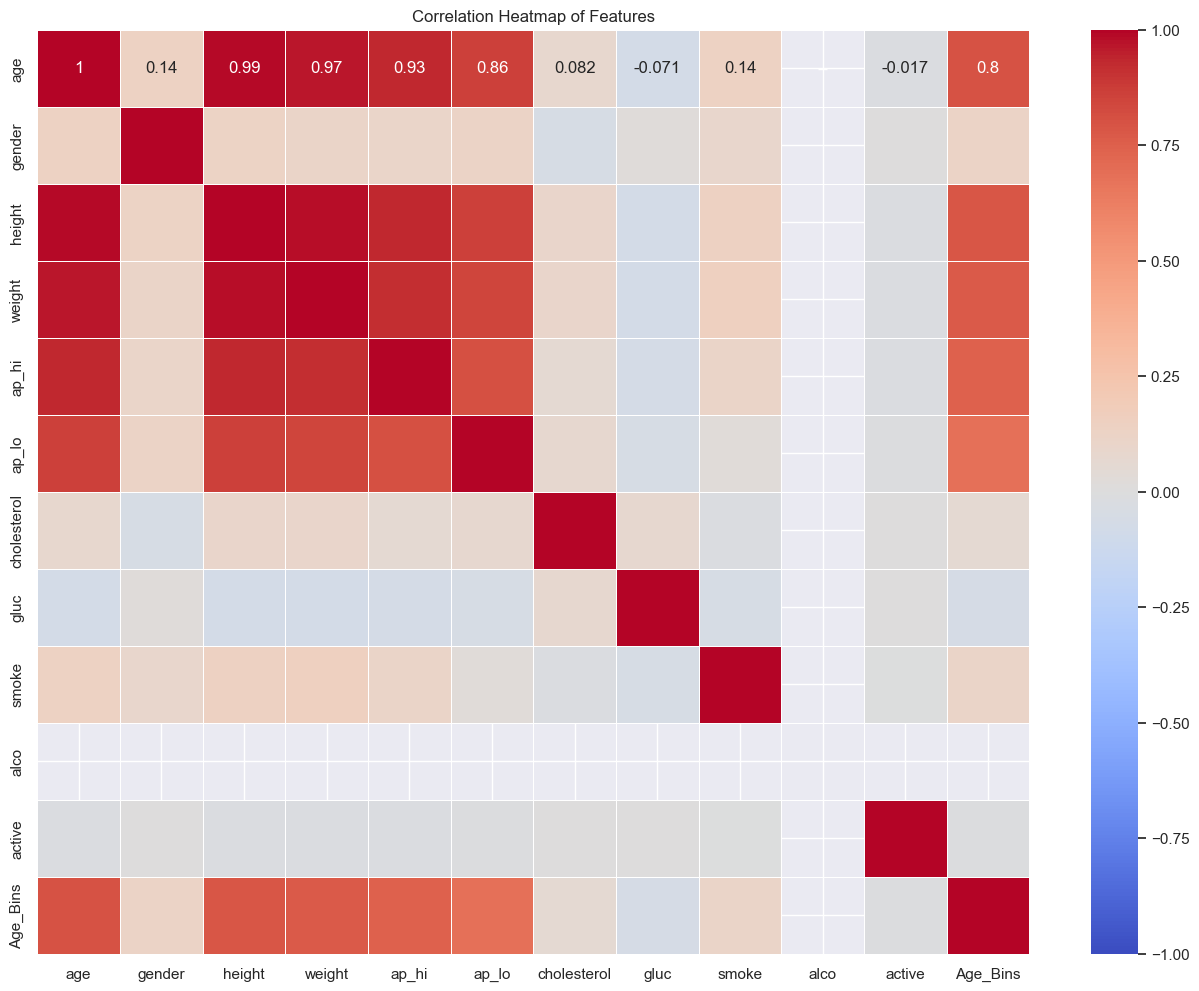

Columns dropped due to high correlation:
{'height', 'ap_hi', 'weight'}

Retained features after applying Pearson's correlation:
Index(['age', 'gender', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'Age_Bins'],
      dtype='object')

Original shape: (20000, 12)
Shape after applying Pearson's correlation feature selection: (20000, 9)


In [21]:
# Algorithm 2: Feature Selection using Pearson's correlation

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Copy the data to avoid modifying the original dataset
features = raw_data.drop(columns=['cardio'])

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in features.columns:
    if features[column].dtype == 'object' or features[column].dtype == 'category':
        le = LabelEncoder()
        features[column] = le.fit_transform(features[column].astype(str))
        label_encoders[column] = le

# Calculate the correlation matrix
corr_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Set a threshold for high correlation (e.g., 0.9)
threshold = 0.9

# Identify columns to drop based on the threshold
columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

# Create a new DataFrame with only the selected features
selected_features = features.drop(columns=columns_to_drop)

# Print the columns that were dropped and the ones retained
print("Columns dropped due to high correlation:")
print(columns_to_drop)

print("\nRetained features after applying Pearson's correlation:")
print(selected_features.columns)

# Print the shape before and after feature selection
print("\nOriginal shape:", features.shape)
print("Shape after applying Pearson's correlation feature selection:", selected_features.shape)



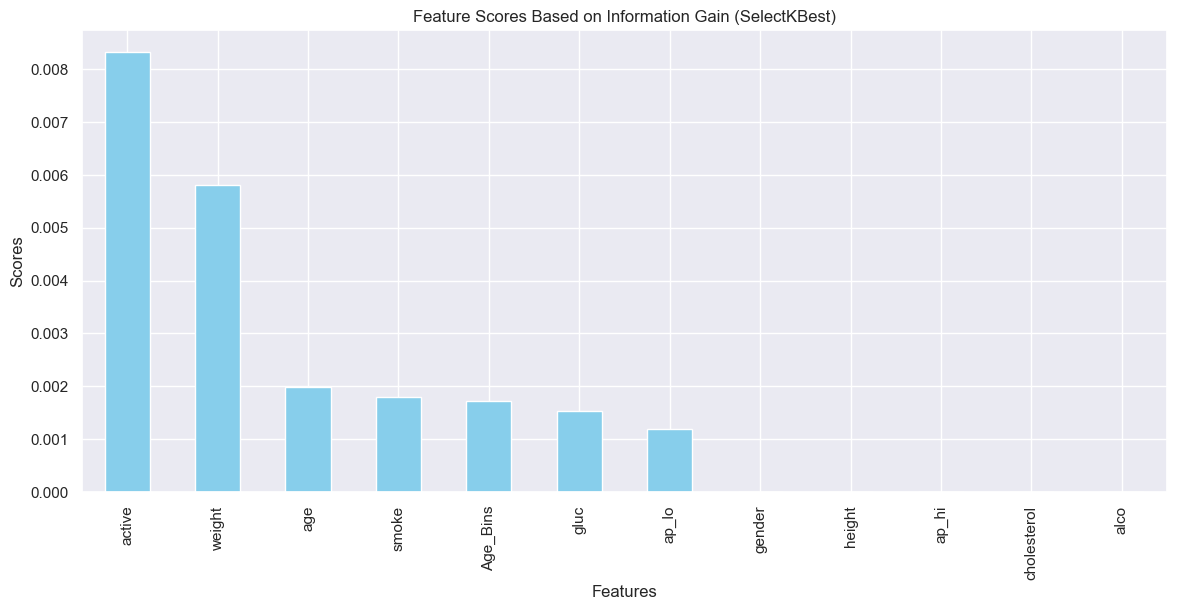

Top 10 selected features based on Information Gain:
Index(['active', 'weight', 'age', 'smoke', 'Age_Bins', 'gluc', 'ap_lo',
       'gender', 'height', 'ap_hi'],
      dtype='object')


In [22]:
# Algorithm 3: Feature Selection using Information Gain (SelectkBest and SelectPercentile)

from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectPercentile
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the features and target
X = raw_data.drop(columns=['cardio'])  # Features
y = raw_data['cardio']  # Target variable

# Encode categorical features using LabelEncoder (same as before)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object' or X[column].dtype == 'category':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column].astype(str))
        label_encoders[column] = le

# Apply SelectKBest with mutual information
k = 10  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the scores of all features
feature_scores = pd.Series(selector.scores_, index=X.columns)

# Plot the feature scores as a histogram
plt.figure(figsize=(14, 6))
feature_scores.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Scores Based on Information Gain (SelectKBest)')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

# Print the selected features
selected_features = feature_scores.nlargest(k).index
print(f"Top {k} selected features based on Information Gain:")
print(selected_features)


In [ ]:
# Algorithm 4: Feature Selection using RFECV (Recursive Feature Elimination with Cross Validation)

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the features and target
X = raw_data.drop(columns=['cardio'])  # Features
y = raw_data['cardio']  # Target variable

# Encode categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object' or X[column].dtype == 'category':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column].astype(str))
        label_encoders[column] = le

# Initialize the model and RFECV
model = RandomForestClassifier(random_state=42)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=StratifiedKFold(5),
    scoring='accuracy'
)

# Fit RFECV to the data
rfecv.fit(X, y)

# Plot the number of features vs. cross-validation scores
plt.figure(figsize=(14, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
    rfecv.cv_results_['mean_test_score'], 
    marker='o', 
    color='b'
)
plt.title('RFECV: Number of Features vs. Cross-Validation Score')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score (Accuracy)')
plt.show()

# Print the optimal number of features and the selected features
print(f"Optimal number of features: {rfecv.n_features_}")
selected_features_rfecv = X.columns[rfecv.support_]
print("Selected features:")
print(selected_features_rfecv)



Hold Out Validation

In [23]:
raw_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'Age_Bins'],
      dtype='object')

Hold Out Validation Technique

In [24]:
X = raw_data.drop(columns = ['cardio', 'Age_Bins'])

y = raw_data['cardio']
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0, stratify=y)


X shape: (20000, 11)
y shape: (20000,)


Applying Explainable AI

In [25]:
import lime
from lime import lime_tabular


# Initialize the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No', 'Yes'],  # Labels for the classes
    mode='classification'
)

# Explain a prediction on a single instance 
exp = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=model.predict_proba  # Use the predict_proba function for probability predictions
)

# Display the explanation in the notebook
exp.show_in_notebook(show_table=True)

NameError: name 'model' is not defined

Training the model without hyperparameter Optimization. 

Decision Tree

In [26]:
# create a decision tree model 
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train) # train with training set; fit function is used to train the model

DecisionTreeClassifier(max_depth=2)

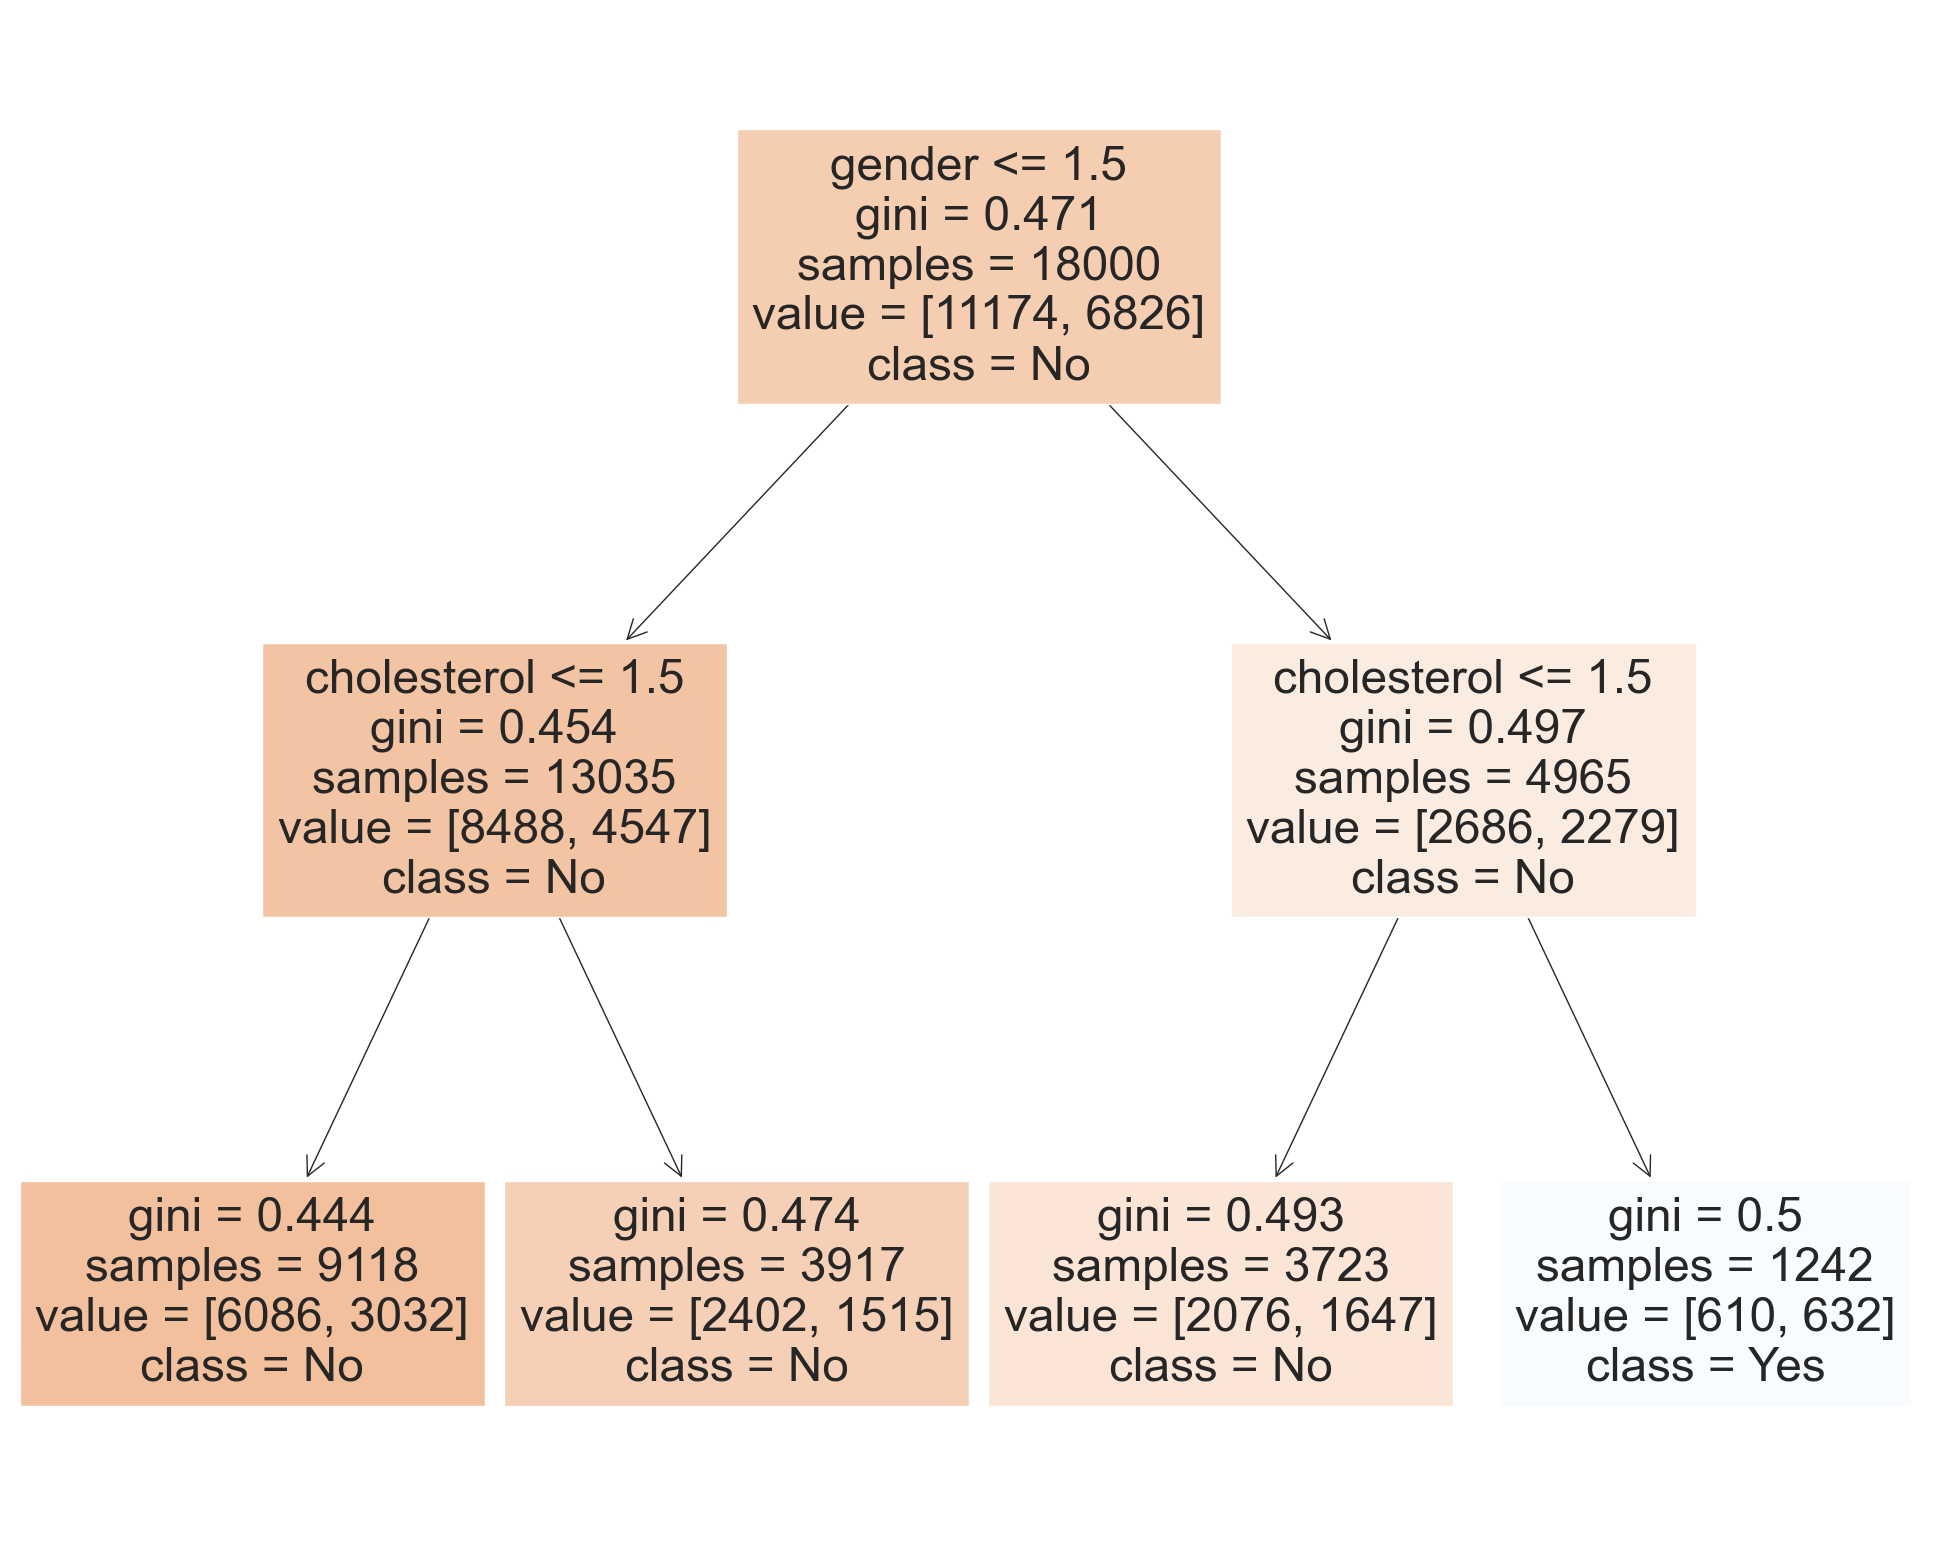

In [27]:
#plot directly from Jupyter notebook
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(dt, 
                   feature_names=raw_data.drop('cardio', axis=1).columns,    
    class_names=raw_data['cardio'].unique().astype(str),
                   filled=True)

Feature Importance

In [28]:
# Using the same features used for training the model
features = raw_data.drop('cardio', axis=1).columns[:len(dt.feature_importances_)]

# Loop over the features and their importances
for i, column in enumerate(features):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    # Create a DataFrame for the feature importance
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    # Append to final_fi DataFrame
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except NameError:
        final_fi = fi

# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending=False).reset_index(drop=True)
final_fi


Importance of feature age:, 0.000
Importance of feature gender:, 0.782
Importance of feature height:, 0.000
Importance of feature weight:, 0.000
Importance of feature ap_hi:, 0.000
Importance of feature ap_lo:, 0.000
Importance of feature cholesterol:, 0.218
Importance of feature gluc:, 0.000
Importance of feature smoke:, 0.000
Importance of feature alco:, 0.000
Importance of feature active:, 0.000


Variable  Feature Importance Score
0        gender                   0.78187
1   cholesterol                   0.21813
2           age                   0.00000
3        height                   0.00000
4        weight                   0.00000
5         ap_hi                   0.00000
6         ap_lo                   0.00000
7          gluc                   0.00000
8         smoke                   0.00000
9          alco                   0.00000
10       active                   0.00000

Result

In [29]:
#  Training Accuracy
print("Training Accuracy: ", dt.score(X_train, y_train)) # Return the mean accuracy on the given data and actual labels

# Test Accuracy
print("Testing Accuracy: ", dt.score(X_test, y_test))

Training Accuracy:  0.622
Testing Accuracy:  0.6265


Normalized Confusion Matrix:
 [[0.945409 0.054591]
 [0.907413 0.092587]]

Classification Report:
               precision    recall  f1-score   support

         Yes       0.63      0.95      0.76     11174
          No       0.51      0.09      0.16      6826

    accuracy                           0.62     18000
   macro avg       0.57      0.52      0.46     18000
weighted avg       0.58      0.62      0.53     18000



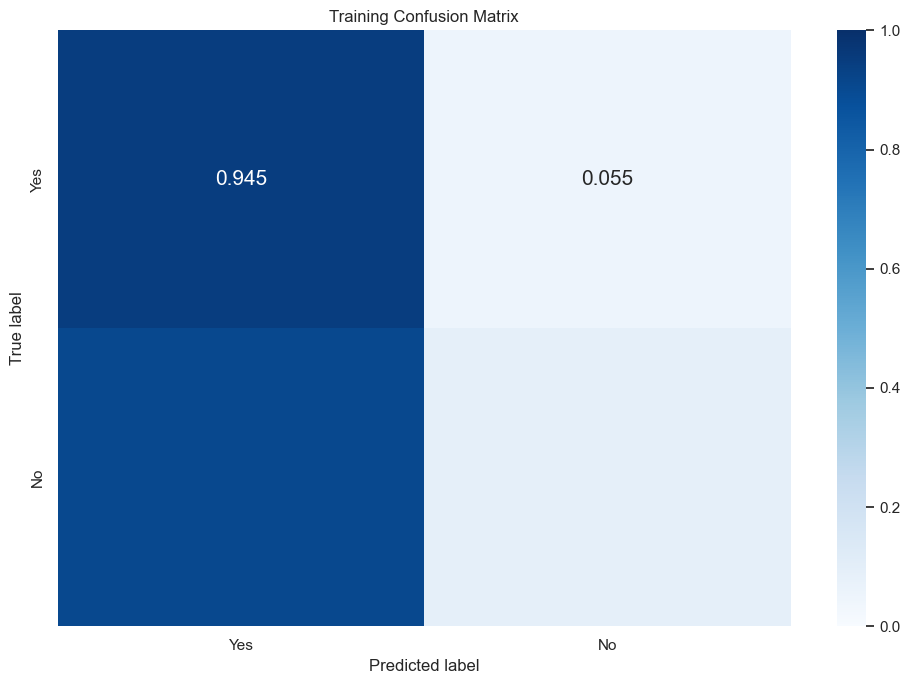

In [30]:
from sklearn.metrics import classification_report

# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix', annot_size=15, cmap='Blues'):
    """Plots a confusion matrix."""
    plt.figure(figsize=(10, 7))  # Adjust the figure size
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, 
                    annot_kws={'size': annot_size}, cmap=cmap, fmt='.3f')  # Increased precision to 3 decimal places
    else:
        sns.heatmap(cm, vmin=0., vmax=1., annot=True, annot_kws={'size': annot_size}, cmap=cmap, fmt='.3f')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  # Ensures everything fits within the figure

# Predicting and plotting Confusion Matrix
y_pred = dt.predict(X_train)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Normalize the confusion matrix
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]

# Check the normalized confusion matrix
print("Normalized Confusion Matrix:\n", cm_norm)

# Plot the normalized confusion matrix with better precision
plot_confusion_matrix(cm_norm, classes=['Yes', 'No'], title='Training Confusion Matrix', annot_size=15)

# Generate and display the classification report
class_report = classification_report(y_train, y_pred, target_names=['Yes', 'No'])
print("\nClassification Report:\n", class_report)


KNN Classifier

In [31]:
# Initialize KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()

# Use GridSearchCV to find the optimal number of neighbors
param_grid = {'n_neighbors': range(1, 21)}  # Searching for k from 1 to 20
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter (k) and best score from GridSearchCV
best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors (k): {best_k}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Train KNN with the best number of neighbors
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best number of neighbors (k): 20
Best cross-validation accuracy: 0.6077
Test Set Accuracy: 0.6135
Classification Report:
               precision    recall  f1-score   support

          No       0.63      0.90      0.74      1242
         Yes       0.47      0.14      0.21       758

    accuracy                           0.61      2000
   macro avg       0.55      0.52      0.48      2000
weighted avg       0.57      0.61      0.54      2000

Confusion Matrix:
 [[1123  119]
 [ 654  104]]


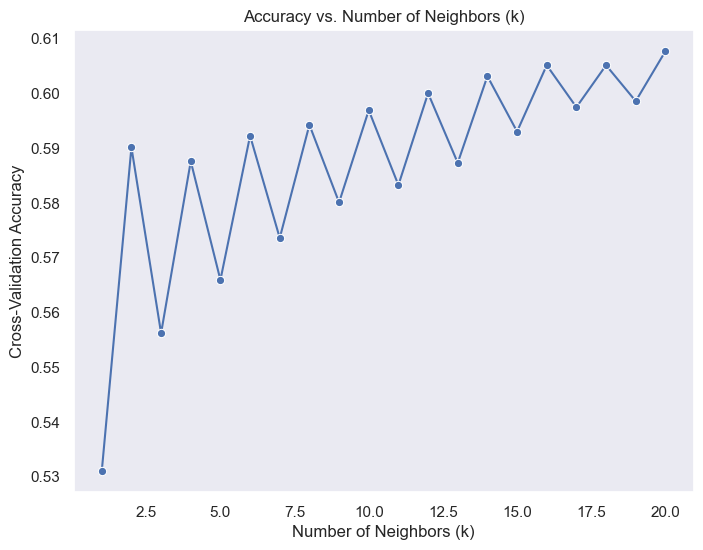

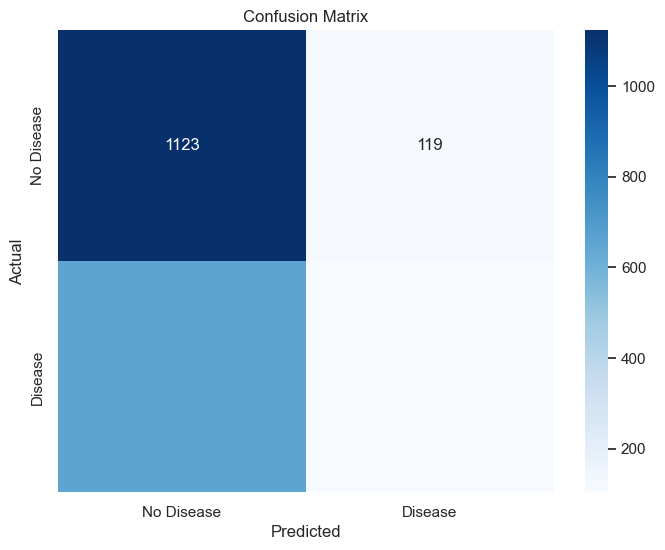

<Figure size 1000x600 with 0 Axes>

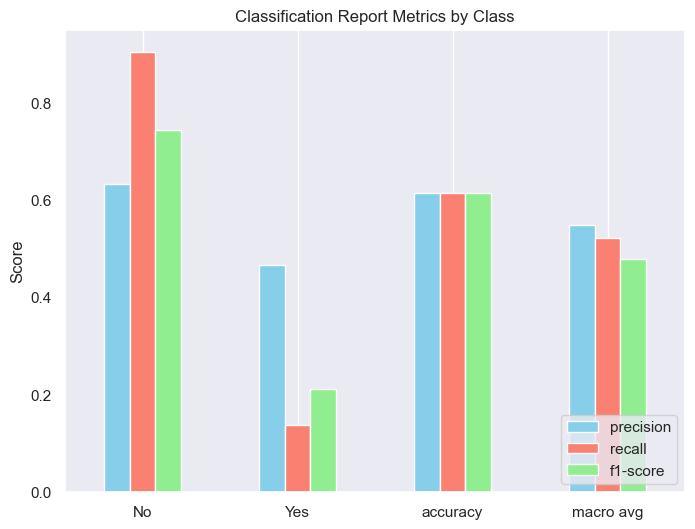

In [30]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix

# 1. Accuracy vs. Number of Neighbors (k)
# Extract cross-validation results from GridSearchCV
results_df = pd.DataFrame(grid_search.cv_results_)
sns.lineplot(data=results_df, x='param_n_neighbors', y='mean_test_score', marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.grid()
plt.show()

# 2. Confusion Matrix Heatmap
# Compute the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3. Classification Report Visualization
# Get classification report as a DataFrame
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# Plot precision, recall, and f1-score for each class
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Classification Report Metrics by Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y")
plt.show()


Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Set Accuracy: 0.6390
Classification Report:
               precision    recall  f1-score   support

          No       0.64      0.95      0.77      1242
         Yes       0.61      0.13      0.21       758

    accuracy                           0.64      2000
   macro avg       0.63      0.54      0.49      2000
weighted avg       0.63      0.64      0.56      2000

Confusion Matrix:
 [[1181   61]
 [ 661   97]]


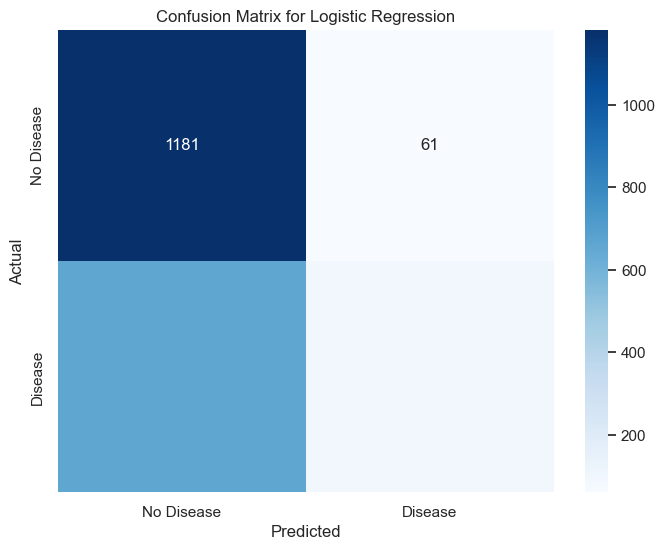

<Figure size 1000x600 with 0 Axes>

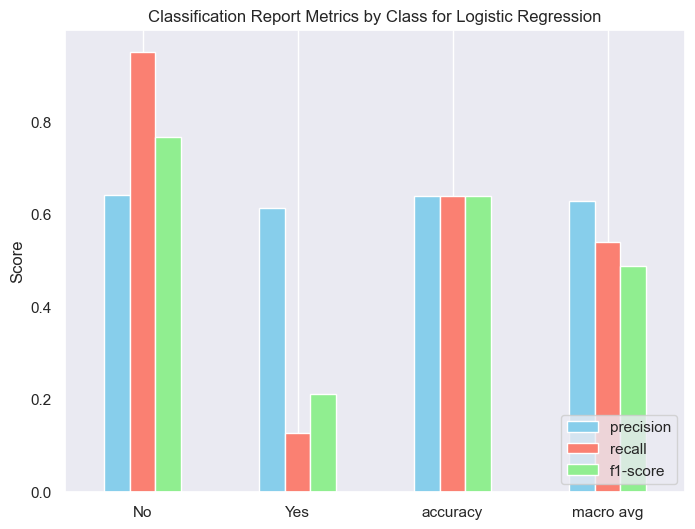

In [32]:
# 1. Confusion Matrix Heatmap
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# 2. Classification Report Visualization
# Get classification report as a DataFrame
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# Plot precision, recall, and f1-score for each class
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Classification Report Metrics by Class for Logistic Regression")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y")
plt.show()


Random Forest

In [33]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Set Accuracy: 0.5885
Classification Report:
               precision    recall  f1-score   support

          No       0.64      0.78      0.70      1242
         Yes       0.43      0.27      0.33       758

    accuracy                           0.59      2000
   macro avg       0.53      0.53      0.52      2000
weighted avg       0.56      0.59      0.56      2000

Confusion Matrix:
 [[974 268]
 [555 203]]


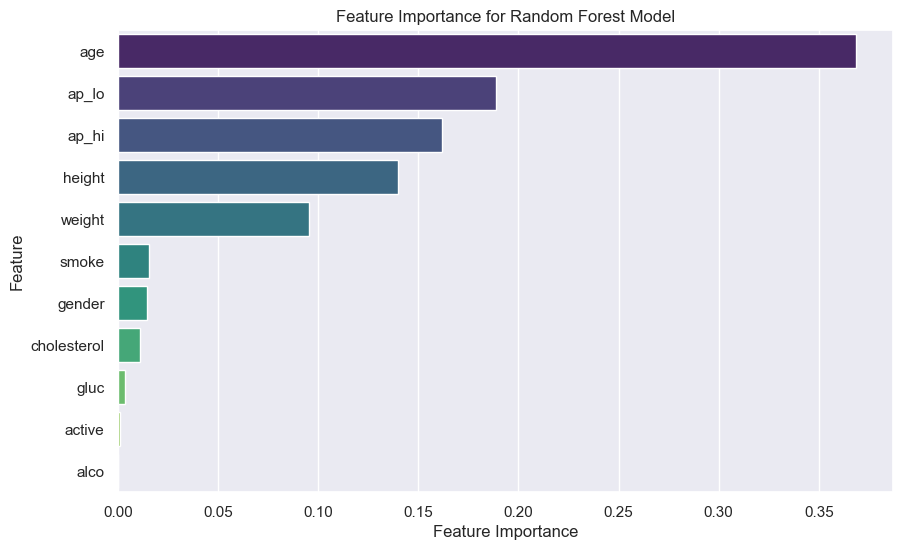

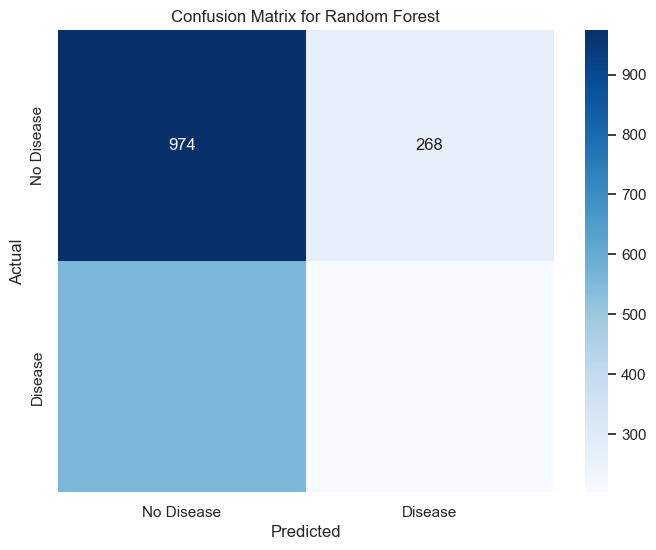

<Figure size 1000x600 with 0 Axes>

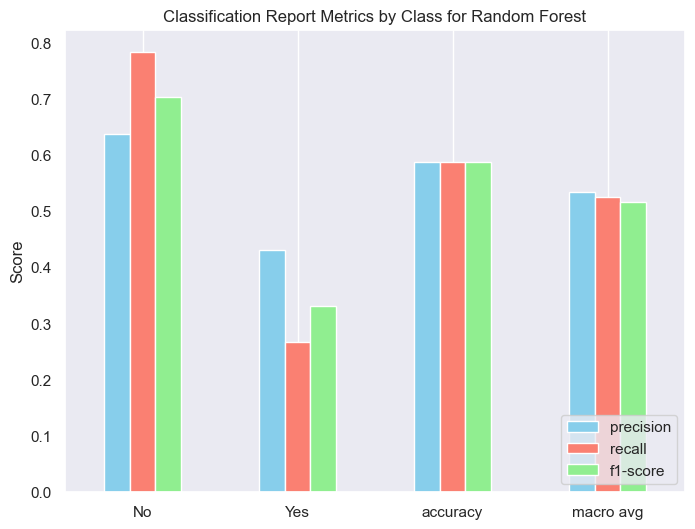

In [34]:
# Feature Importance
feature_importance = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest Model")
plt.show()


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()



# Get classification report as a DataFrame
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# Plot precision, recall, and f1-score for each class
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Classification Report Metrics by Class for Random Forest")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y")
plt.show()

Bagging

In [35]:
# Define the Bagging models with different base estimators
from sklearn.ensemble import BaggingClassifier

bagging_models = {
    "Bagging with Decision Tree": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    "Bagging with KNN": BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=100, random_state=42),
    "Bagging with Logistic Regression": BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=100, random_state=42)
}

# Train and evaluate each Bagging model
results = {}
for model_name, model in bagging_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "Model": model,
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }
    print(f"\n{model_name} - Test Set Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Bagging with Decision Tree - Test Set Accuracy: 0.5760
Classification Report:
               precision    recall  f1-score   support

          No       0.63      0.75      0.69      1242
         Yes       0.42      0.29      0.34       758

    accuracy                           0.58      2000
   macro avg       0.53      0.52      0.52      2000
weighted avg       0.55      0.58      0.56      2000

Confusion Matrix:
 [[930 312]
 [536 222]]

Bagging with KNN - Test Set Accuracy: 0.5745
Classification Report:
               precision    recall  f1-score   support

          No       0.63      0.75      0.69      1242
         Yes       0.41      0.29      0.34       758

    accuracy                           0.57      2000
   macro avg       0.52      0.52      0.51      2000
weighted avg       0.55      0.57      0.56      2000

Confusion Matrix:
 [[929 313]
 [538 220]]

Bagging with Logistic Regression - Test Set Accuracy: 0.6385
Classification Report:
               precision   

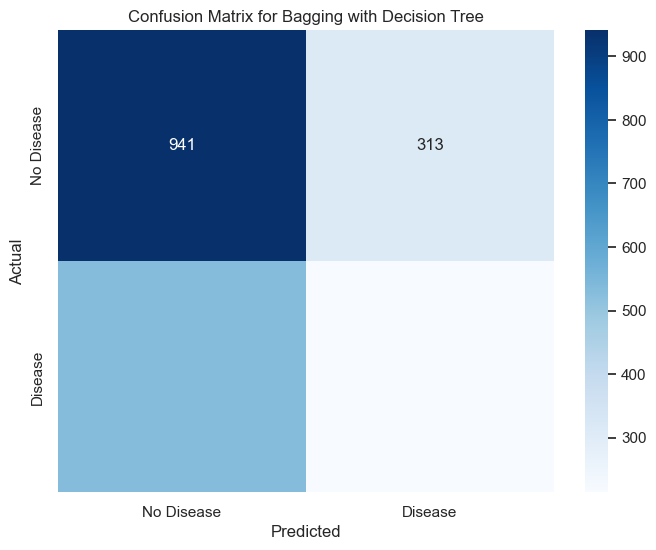

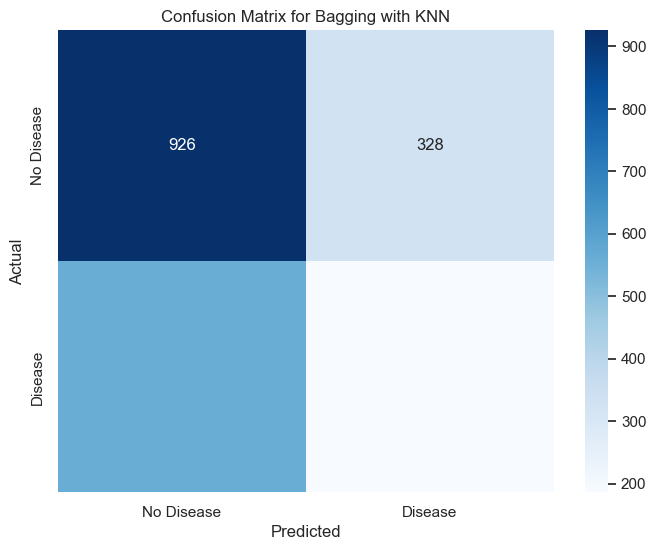

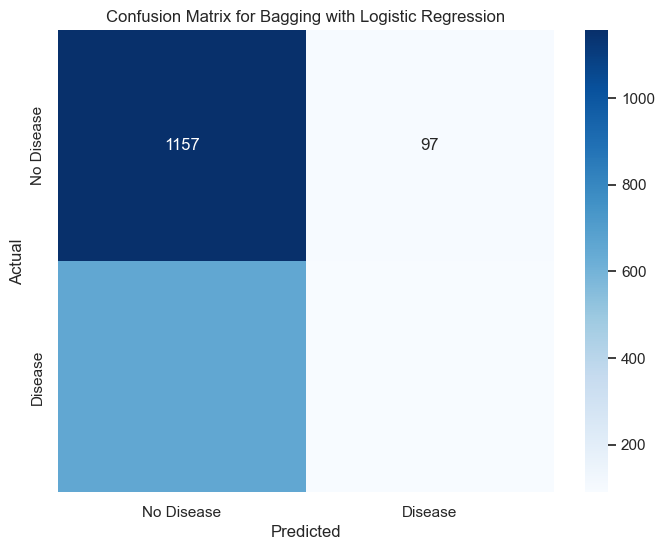

<Figure size 1000x600 with 0 Axes>

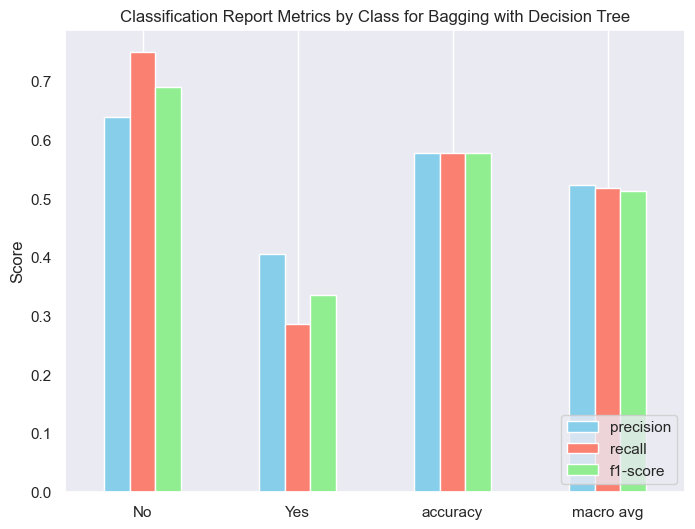

<Figure size 1000x600 with 0 Axes>

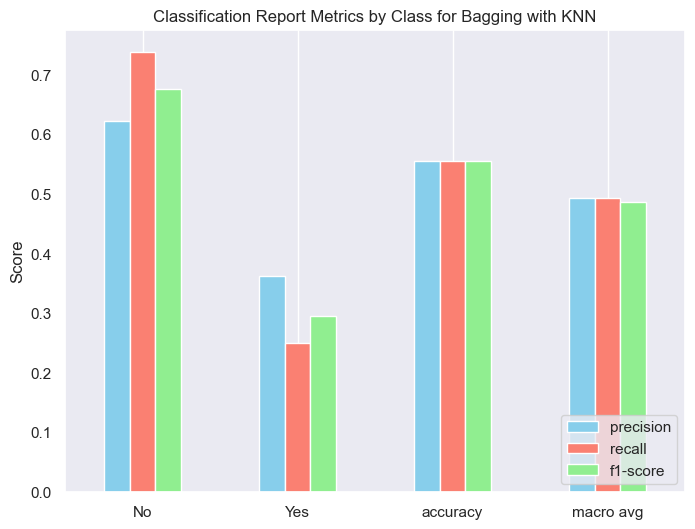

<Figure size 1000x600 with 0 Axes>

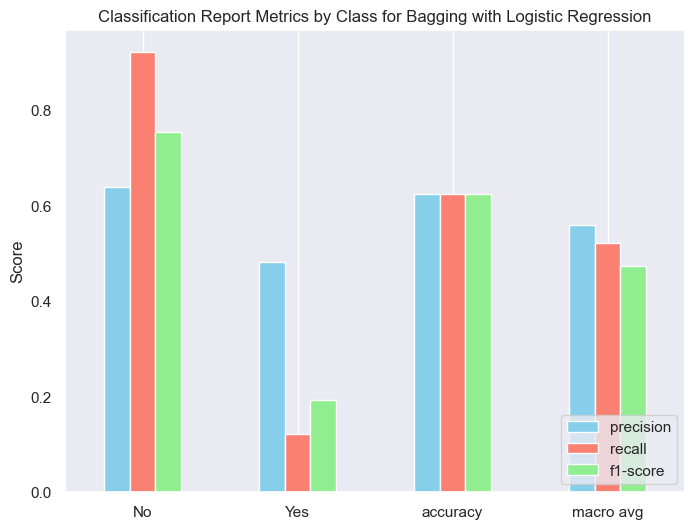

In [42]:
for model_name, result in results.items():
    # Plotting confusion matrix as a heatmap
    conf_matrix = result["Confusion Matrix"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

for model_name, result in results.items():
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(result["Classification Report"]).transpose()

    # Plot precision, recall, and f1-score for each class
    plt.figure(figsize=(10, 6))
    report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f"Classification Report Metrics by Class for {model_name}")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.legend(loc="lower right")
    plt.grid(axis="y")
    plt.show()



XGBoost

In [43]:
# !pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.6 MB/s eta 0:00:0000:0100:010m


In [45]:
from xgboost import XGBClassifier

# Convert target labels from 'No'/'Yes' to 0/1
y = y.map({'No': 0, 'Yes': 1})

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Set Accuracy: 0.6158
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.91      0.75      2475
           1       0.49      0.14      0.22      1525

    accuracy                           0.62      4000
   macro avg       0.56      0.52      0.48      4000
weighted avg       0.58      0.62      0.54      4000

Confusion Matrix:
 [[2247  228]
 [1309  216]]


Hyper parameter optimization

In [51]:
# Hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter grid for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV for each model
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit each GridSearchCV model
dt_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)

# Extract the best estimators and their scores
best_dt_model = dt_grid_search.best_estimator_
best_knn_model = knn_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

print("Best Decision Tree Model:", best_dt_model)
print("Best KNN Model:", best_knn_model)
print("Best Random Forest Model:", best_rf_model)
print("Best XGBoost Model:", best_xgb_model)




/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

Best Decision Tree Model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)
Best KNN Model: KNeighborsClassifier(metric='euclidean', n_neighbors=9)
Best Random Forest Model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=42)
Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_es

In [52]:
# Evaluate each best model
dt_best_accuracy = best_dt_model.score(X_test, y_test)
knn_best_accuracy = best_knn_model.score(X_test, y_test)
rf_best_accuracy = best_rf_model.score(X_test, y_test)
xgb_best_accuracy = best_xgb_model.score(X_test, y_test)

print(f"Best Decision Tree Test Accuracy: {dt_best_accuracy:.4f}")
print(f"Best KNN Test Accuracy: {knn_best_accuracy:.4f}")
print(f"Best Random Forest Test Accuracy: {rf_best_accuracy:.4f}")
print(f"Best XGBoost Test Accuracy: {xgb_best_accuracy:.4f}")


Best Decision Tree Test Accuracy: 0.5927
Best KNN Test Accuracy: 0.5823
Best Random Forest Test Accuracy: 0.6200
Best XGBoost Test Accuracy: 0.6168


In [53]:
import joblib

# Save the best random forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')


['best_rf_model.pkl']